### Instalar e importar Bibliotecas

In [1]:
# =========================
# Bibliotecas Necessárias
# =========================

# Manipulação e análise de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Outras utilidades
import os
from itertools import combinations

# ==============================
# Configurações Globais
# ==============================

# Mostrar todas as colunas ao exibir DataFrames
pd.set_option('display.max_columns', None)

# Limitar o número de linhas exibidas (ajustável conforme necessário)
pd.set_option('display.max_rows', 10)

# Estilo dos gráficos com Seaborn
sns.set(style="whitegrid")

# Tamanho padrão das figuras
plt.rcParams["figure.figsize"] = (12, 6)

# Mensagem de início
print("Bibliotecas carregadas e configurações aplicadas com sucesso.")


Bibliotecas carregadas e configurações aplicadas com sucesso.


In [2]:
# ==========================================
# Carregamento dos Arquivos CSV em DataFrames
# ==========================================

import os
import pandas as pd

# Caminho base dos arquivos CSV
caminho_base = "/home/diego/Documentos/Semestre 2024.2/Nova_Analise/dados/tabelas"

# Dicionário para armazenar os DataFrames
tabelas = {}

# Lista os arquivos no diretório e carrega os arquivos .csv
for nome_arquivo in os.listdir(caminho_base):
    if nome_arquivo.lower().endswith('.csv'):
        caminho_completo = os.path.join(caminho_base, nome_arquivo)
        
        try:
            # Leitura com tratamento de possíveis problemas de codificação ou separador
            df = pd.read_csv(caminho_completo, encoding='utf-8', sep=',')  # ajuste o encoding/sep se necessário
            nome_base = os.path.splitext(nome_arquivo)[0]  # remove extensão
            tabelas[nome_base] = df
            print(f"✔️ Arquivo carregado: {nome_base}")
        
        except pd.errors.ParserError:
            print(f"❌ Erro de parsing ao carregar {nome_arquivo} — verifique o separador ou a estrutura.")
        except UnicodeDecodeError:
            print(f"❌ Erro de codificação ao carregar {nome_arquivo} — tente outro encoding como 'latin1'.")
        except Exception as e:
            print(f"❌ Erro inesperado ao carregar {nome_arquivo}: {e}")

print(f"\nTotal de arquivos carregados: {len(tabelas)}")


✔️ Arquivo carregado: alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas
✔️ Arquivo carregado: alunos
✔️ Arquivo carregado: alunos-matriculados
✔️ Arquivo carregado: alunos-final
✔️ Arquivo carregado: alunos-filtrado-sem-metricas
✔️ Arquivo carregado: alunos-novos-filtrado-sem-metricas
✔️ Arquivo carregado: alunos-novos-sem-reingresso-filtrado-sem-metricas

Total de arquivos carregados: 7


### Visualizar Tabelas e colunas

In [3]:
# ================================
# Visualizar Colunas de Cada Tabela
# ================================

print("\n🔍 Estrutura de colunas por tabela:\n")

for nome, df in tabelas.items():
    print(f"📄 Tabela: {nome}")
    print(f"🧩 Colunas ({len(df.columns)}): {list(df.columns)}\n")



🔍 Estrutura de colunas por tabela:

📄 Tabela: alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas
🧩 Colunas (15): ['10057783454', '116210660', '2016.2', 'SISU', '2017', 'Casado', 'FEMININO', '1992-07-23 00:00:00.0', 'Branca', '2009', 'Somente escola pública', 'L1', 'ATIVO', 'REGULAR', '-']

📄 Tabela: alunos
🧩 Colunas (59): ['matricula_do_estudante', 'nome', 'codigo_do_curso', 'nome_do_curso', 'turno_do_curso', 'codigo_do_curriculo', 'campus', 'nome_do_campus', 'codigo_do_setor', 'nome_do_setor', 'estado_civil', 'endereco', 'sexo', 'data_de_nascimento', 'cpf', 'cep', 'telefone', 'situacao', 'motivo_de_evasao', 'periodo_de_evasao', 'forma_de_ingresso', 'periodo_de_ingresso', 'email', 'nacionalidade', 'local_de_nascimento', 'naturalidade', 'cor', 'deficiencias', 'ano_de_conclusao_ensino_medio', 'tipo_de_ensino_medio', 'politica_afirmativa', 'cra', 'mc', 'iech', 'iepl', 'iea', 'mcn', 'iean', 'creditos_do_cra', 'notas_acumuladas', 'periodos_completados', 'creditos_tentados', 'credit

### Padronizar alunos-final

In [4]:
# Padronização básica de colunas
tabelas['alunos-final'] = tabelas['alunos-final'].rename(columns={
    'CPF': 'cpf',
    'Matrícula': 'matricula_do_estudante',
    'Período de Ingresso': 'periodo_de_ingresso',
    'Forma de Ingresso': 'forma_de_ingresso',
    'Currículo': 'codigo_do_curriculo',
    'Estado Civil': 'estado_civil',
    'Sexo': 'sexo',
    'Idade Aproximada no Ingresso': 'idade_no_ingresso',
    'Cor': 'cor',
    'Cota': 'politica_afirmativa',
    'Status': 'situacao',
    'Tipo de Evasão': 'motivo_de_evasao',
    'Período de Evasão': 'periodo_de_evasao'
})


### Tratar tabelas com colunas genéricas ou numéricas

In [5]:
# Definindo colunas esperadas para uma dessas tabelas
colunas_corrigidas = [
    'cpf', 'matricula_do_estudante', 'periodo_de_ingresso', 'forma_de_ingresso',
    'codigo_do_curriculo', 'estado_civil', 'sexo', 'data_de_nascimento', 'cor',
    'ano_de_conclusao_ensino_medio', 'tipo_de_ensino_medio', 'politica_afirmativa',
    'situacao', 'motivo_de_evasao', 'periodo_de_evasao'
]

# Aplicar renomeação para as tabelas "problemáticas"
for nome in tabelas:
    if 'alunos-novos' in nome:
        df = tabelas[nome]
        if df.shape[1] == len(colunas_corrigidas):
            df.columns = colunas_corrigidas
            tabelas[nome] = df
        else:
            print(f"Tabela {nome} não tem o número esperado de colunas ({len(colunas_corrigidas)}).")


In [6]:

for nome, df in tabelas.items():
    print(f"📄 Tabela: {nome}")
    print(f"🧩 Colunas ({len(df.columns)}): {list(df.columns)}\n")


📄 Tabela: alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas
🧩 Colunas (15): ['cpf', 'matricula_do_estudante', 'periodo_de_ingresso', 'forma_de_ingresso', 'codigo_do_curriculo', 'estado_civil', 'sexo', 'data_de_nascimento', 'cor', 'ano_de_conclusao_ensino_medio', 'tipo_de_ensino_medio', 'politica_afirmativa', 'situacao', 'motivo_de_evasao', 'periodo_de_evasao']

📄 Tabela: alunos
🧩 Colunas (59): ['matricula_do_estudante', 'nome', 'codigo_do_curso', 'nome_do_curso', 'turno_do_curso', 'codigo_do_curriculo', 'campus', 'nome_do_campus', 'codigo_do_setor', 'nome_do_setor', 'estado_civil', 'endereco', 'sexo', 'data_de_nascimento', 'cpf', 'cep', 'telefone', 'situacao', 'motivo_de_evasao', 'periodo_de_evasao', 'forma_de_ingresso', 'periodo_de_ingresso', 'email', 'nacionalidade', 'local_de_nascimento', 'naturalidade', 'cor', 'deficiencias', 'ano_de_conclusao_ensino_medio', 'tipo_de_ensino_medio', 'politica_afirmativa', 'cra', 'mc', 'iech', 'iepl', 'iea', 'mcn', 'iean', 'creditos_do_cra',

### Alinhar as 3 primeiras colunas: cpf, matricula_do_estudante, nome

In [7]:
for nome, df in tabelas.items():
    colunas = df.columns.tolist()
    
    # Verifica se existem as colunas
    nova_ordem = []
    if 'cpf' in colunas:
        nova_ordem.append('cpf')
    if 'matricula_do_estudante' in colunas:
        nova_ordem.append('matricula_do_estudante')
    if 'nome' in colunas:
        nova_ordem.append('nome')
    
    # Adiciona o restante das colunas, excluindo as que já estão
    restantes = [col for col in colunas if col not in nova_ordem]
    
    # Reorganiza as colunas
    tabelas[nome] = df[nova_ordem + restantes]


In [8]:
for nome, df in tabelas.items():
    print(f"\n📄 Tabela: {nome}")
    display(df.head())



📄 Tabela: alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas


cpf  matricula_do_estudante  periodo_de_ingresso forma_de_ingresso  \
0  70417737440               117110237               2017.1              SISU   
1  12305579462               117210287               2017.2              SISU   
2   7296494409               118110050               2018.1              SISU   
3  10180403400               118110854               2018.1              SISU   
4   7541169480               118210232               2018.2              SISU   

   codigo_do_curriculo estado_civil       sexo     data_de_nascimento     cor  \
0                 2017     Solteiro   FEMININO  1998-07-19 00:00:00.0   Parda   
1                 2017     Solteiro  MASCULINO  1998-10-24 00:00:00.0   Parda   
2                 2017     Solteiro  MASCULINO  1999-09-15 00:00:00.0  Branca   
3                 2017     Solteiro  MASCULINO  1992-10-11 00:00:00.0   Parda   
4                 2023     Solteiro  MASCULINO  1987-12-04 00:00:00.0   Parda   

   ano_de_conclusao_ensino_medio    tipo_de_ensino_medio politica_afirmativa  \
0                         2015.0  Somente escola pública                  L2   
1                         2016.0  Somente escola pública                  L6   
2                         2017.0  Somente escola privada                   -   
3                         2009.0  Somente escola privada                   -   
4                         2007.0  Somente escola pública                  L2   

  situacao motivo_de_evasao periodo_de_evasao  
0    ATIVO          REGULAR                 -  
1    ATIVO          REGULAR                 -  
2    ATIVO          REGULAR                 -  
3    ATIVO          REGULAR                 -  
4    ATIVO          REGULAR                 -


📄 Tabela: alunos


cpf  matricula_do_estudante                             nome  \
0  8.410676e+09               116210554  AISLAN JEFFERSON DE SOUZA BRITO   
1  1.005778e+10               116210660  ANGELA CRISTINA DE ARAUJO SOUSA   
2  7.041774e+10               117110237        CLECIANA MARIA DE SANTANA   
3  1.230558e+10               117210287        ABEL ANTUNES DE LIMA NETO   
4  7.296494e+09               118110050        CAIO CESAR NOBREGA BORGES   

   codigo_do_curso              nome_do_curso turno_do_curso  \
0         14102100  CIÊNCIA DA COMPUTAÇÃO - D       Integral   
1         14102100  CIÊNCIA DA COMPUTAÇÃO - D       Integral   
2         14102100  CIÊNCIA DA COMPUTAÇÃO - D       Integral   
3         14102100  CIÊNCIA DA COMPUTAÇÃO - D       Integral   
4         14102100  CIÊNCIA DA COMPUTAÇÃO - D       Integral   

   codigo_do_curriculo  campus  nome_do_campus  codigo_do_setor  \
0                 2017       1  Campina Grande         14000000   
1                 2017       1  Campina Grande         14000000   
2                 2017       1  Campina Grande         14000000   
3                 2017       1  Campina Grande         14000000   
4                 2017       1  Campina Grande         14000000   

                                       nome_do_setor estado_civil  \
0  CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...     Solteiro   
1  CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...       Casado   
2  CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...     Solteiro   
3  CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...     Solteiro   
4  CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...     Solteiro   

                 endereco       sexo     data_de_nascimento         cep  \
0  RUA ARISTIDES LOBO 194  MASCULINO  1991-08-03 00:00:00.0  58400384.0   
1          SITIO DERBY 00   FEMININO  1992-07-23 00:00:00.0  55730000.0   
2  RUA SÃO JUDAS TADEU 86   FEMININO  1998-07-19 00:00:00.0  55190048.0   
3                     NaN  MASCULINO  1998-10-24 00:00:00.0  58155000.0   
4          UMBUZEIRO 1237  MASCULINO  1999-09-15 00:00:00.0  58038182.0   

      telefone situacao motivo_de_evasao periodo_de_evasao forma_de_ingresso  \
0  83996548001    ATIVO          REGULAR                 -              SISU   
1  81997187920    ATIVO          REGULAR                 -              SISU   
2  81995738036    ATIVO          REGULAR                 -              SISU   
3  83996943375    ATIVO          REGULAR                 -              SISU   
4   8332468693    ATIVO          REGULAR                 -              SISU   

   periodo_de_ingresso                             email nacionalidade  \
0               2016.2               aislanjsb@gmail.com    Brasileira   
1               2016.2      angela.sousa@ccc.ufcg.edu.br    Brasileira   
2               2017.1  cleciana.santana@ccc.ufcg.edu.br    Brasileira   
3               2017.2         abel.neto@ccc.ufcg.edu.br    Brasileira   
4               2018.1          caiocnborges@hotmail.com    Brasileira   

  local_de_nascimento naturalidade     cor deficiencias  \
0      CAMPINA GRANDE           PB   Parda          NaN   
1          BOM JARDIM           PE  Branca          NaN   
2              OLINDA           PE   Parda          NaN   
3            SOLEDADE           PB   Parda          NaN   
4           SÃO PAULO           SP  Branca          NaN   

   ano_de_conclusao_ensino_medio    tipo_de_ensino_medio politica_afirmativa  \
0                         2009.0  Somente escola privada                   -   
1                         2009.0  Somente escola pública                  L1   
2                         2015.0  Somente escola pública                  L2   
3                         2016.0  Somente escola pública                  L6   
4                         2017.0  Somente escola privada                   -   

     cra    mc  iech  iepl   iea     mcn    iean  creditos_do_cra  \
0  11.00  8.25  0.67  0.27  1.51  495.92   91.01              286   
1


📄 Tabela: alunos-matriculados


cpf  matricula_do_estudante                             nome  \
0  8.410676e+09               116210554  AISLAN JEFFERSON DE SOUZA BRITO   
1  1.005778e+10               116210660  ANGELA CRISTINA DE ARAUJO SOUSA   
2  7.041774e+10               117110237        CLECIANA MARIA DE SANTANA   
3  1.230558e+10               117210287        ABEL ANTUNES DE LIMA NETO   
4  7.296494e+09               118110050        CAIO CESAR NOBREGA BORGES   

   codigo_do_curso              nome_do_curso turno_do_curso  \
0         14102100  CIÊNCIA DA COMPUTAÇÃO - D       Integral   
1         14102100  CIÊNCIA DA COMPUTAÇÃO - D       Integral   
2         14102100  CIÊNCIA DA COMPUTAÇÃO - D       Integral   
3         14102100  CIÊNCIA DA COMPUTAÇÃO - D       Integral   
4         14102100  CIÊNCIA DA COMPUTAÇÃO - D       Integral   

   codigo_do_curriculo  campus  nome_do_campus  codigo_do_setor  \
0                 2017       1  Campina Grande         14000000   
1                 2017       1  Campina Grande         14000000   
2                 2017       1  Campina Grande         14000000   
3                 2017       1  Campina Grande         14000000   
4                 2017       1  Campina Grande         14000000   

                                       nome_do_setor estado_civil  \
0  CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...     Solteiro   
1  CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...       Casado   
2  CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...     Solteiro   
3  CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...     Solteiro   
4  CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...     Solteiro   

                 endereco       sexo     data_de_nascimento         cep  \
0  RUA ARISTIDES LOBO 194  MASCULINO  1991-08-03 00:00:00.0  58400384.0   
1          SITIO DERBY 00   FEMININO  1992-07-23 00:00:00.0  55730000.0   
2  RUA SÃO JUDAS TADEU 86   FEMININO  1998-07-19 00:00:00.0  55190048.0   
3                     NaN  MASCULINO  1998-10-24 00:00:00.0  58155000.0   
4          UMBUZEIRO 1237  MASCULINO  1999-09-15 00:00:00.0  58038182.0   

      telefone situacao motivo_de_evasao periodo_de_evasao forma_de_ingresso  \
0  83996548001    ATIVO          REGULAR                 -              SISU   
1  81997187920    ATIVO          REGULAR                 -              SISU   
2  81995738036    ATIVO          REGULAR                 -              SISU   
3  83996943375    ATIVO          REGULAR                 -              SISU   
4   8332468693    ATIVO          REGULAR                 -              SISU   

   periodo_de_ingresso                             email nacionalidade  \
0               2016.2               aislanjsb@gmail.com    Brasileira   
1               2016.2      angela.sousa@ccc.ufcg.edu.br    Brasileira   
2               2017.1  cleciana.santana@ccc.ufcg.edu.br    Brasileira   
3               2017.2         abel.neto@ccc.ufcg.edu.br    Brasileira   
4               2018.1          caiocnborges@hotmail.com    Brasileira   

  local_de_nascimento naturalidade     cor deficiencias  \
0      CAMPINA GRANDE           PB   Parda          NaN   
1          BOM JARDIM           PE  Branca          NaN   
2              OLINDA           PE   Parda          NaN   
3            SOLEDADE           PB   Parda          NaN   
4           SÃO PAULO           SP  Branca          NaN   

   ano_de_conclusao_ensino_medio    tipo_de_ensino_medio politica_afirmativa  \
0                         2009.0  Somente escola privada                   -   
1                         2009.0  Somente escola pública                  L1   
2                         2015.0  Somente escola pública                  L2   
3                         2016.0  Somente escola pública                  L6   
4                         2017.0  Somente escola privada                   -   

     cra    mc  iech  iepl   iea     mcn    iean  creditos_do_cra  \
0  11.00  8.25  0.67  0.27  1.51  495.92   91.01              286   
1


📄 Tabela: alunos-final


cpf  matricula_do_estudante  periodo_de_ingresso forma_de_ingresso  \
0  555406350               111210656               2011.2  VESTIBULAR  ENEM   
1  583978339               111110092               2011.1  VESTIBULAR  ENEM   
2  598360328               113210862               2013.2  VESTIBULAR  ENEM   
3  702842109               112110947               2012.1  VESTIBULAR  ENEM   
4  702859184               117210407               2017.2              SISU   

   codigo_do_curriculo estado_civil       sexo  idade_no_ingresso     cor  \
0                 1999     Solteiro  MASCULINO                 19  Branca   
1                 1999     Solteiro   FEMININO                 19  Branca   
2                 1999     Solteiro   FEMININO                 19   Parda   
3                 1999     Solteiro  MASCULINO                 18   Parda   
4                 2017     Solteiro  MASCULINO                 18  Branca   

  politica_afirmativa situacao                     motivo_de_evasao  \
0                   -  INATIVO            CANCELAMENTO POR ABANDONO   
1                   -  INATIVO                             GRADUADO   
2                   -  INATIVO     CANCELAMENTO P SOLICITACAO ALUNO   
3                   -  INATIVO                             GRADUADO   
4                   -  INATIVO  CANCELADO 3 REPROV MESMA DISCIPLINA   

  periodo_de_evasao  
0            2014.2  
1            2016.1  
2            2014.2  
3            2016.2  
4            2020.1


📄 Tabela: alunos-filtrado-sem-metricas


cpf  matricula_do_estudante  periodo_de_ingresso  \
0  8.410676e+09               116210554               2016.2   
1  1.005778e+10               116210660               2016.2   
2  7.041774e+10               117110237               2017.1   
3  1.230558e+10               117210287               2017.2   
4  7.296494e+09               118110050               2018.1   

  forma_de_ingresso  codigo_do_curriculo estado_civil       sexo  \
0              SISU                 2017     Solteiro  MASCULINO   
1              SISU                 2017       Casado   FEMININO   
2              SISU                 2017     Solteiro   FEMININO   
3              SISU                 2017     Solteiro  MASCULINO   
4              SISU                 2017     Solteiro  MASCULINO   

      data_de_nascimento     cor  ano_de_conclusao_ensino_medio  \
0  1991-08-03 00:00:00.0   Parda                         2009.0   
1  1992-07-23 00:00:00.0  Branca                         2009.0   
2  1998-07-19 00:00:00.0   Parda                         2015.0   
3  1998-10-24 00:00:00.0   Parda                         2016.0   
4  1999-09-15 00:00:00.0  Branca                         2017.0   

     tipo_de_ensino_medio politica_afirmativa situacao motivo_de_evasao  \
0  Somente escola privada                   -    ATIVO          REGULAR   
1  Somente escola pública                  L1    ATIVO          REGULAR   
2  Somente escola pública                  L2    ATIVO          REGULAR   
3  Somente escola pública                  L6    ATIVO          REGULAR   
4  Somente escola privada                   -    ATIVO          REGULAR   

  periodo_de_evasao  
0                 -  
1                 -  
2                 -  
3                 -  
4                 -


📄 Tabela: alunos-novos-filtrado-sem-metricas


cpf  matricula_do_estudante  periodo_de_ingresso forma_de_ingresso  \
0  10057783454               116210660               2016.2              SISU   
1  70417737440               117110237               2017.1              SISU   
2  12305579462               117210287               2017.2              SISU   
3   7296494409               118110050               2018.1              SISU   
4  10180403400               118110854               2018.1              SISU   

   codigo_do_curriculo estado_civil       sexo     data_de_nascimento     cor  \
0                 2017       Casado   FEMININO  1992-07-23 00:00:00.0  Branca   
1                 2017     Solteiro   FEMININO  1998-07-19 00:00:00.0   Parda   
2                 2017     Solteiro  MASCULINO  1998-10-24 00:00:00.0   Parda   
3                 2017     Solteiro  MASCULINO  1999-09-15 00:00:00.0  Branca   
4                 2017     Solteiro  MASCULINO  1992-10-11 00:00:00.0   Parda   

   ano_de_conclusao_ensino_medio    tipo_de_ensino_medio politica_afirmativa  \
0                         2009.0  Somente escola pública                  L1   
1                         2015.0  Somente escola pública                  L2   
2                         2016.0  Somente escola pública                  L6   
3                         2017.0  Somente escola privada                   -   
4                         2009.0  Somente escola privada                   -   

  situacao motivo_de_evasao periodo_de_evasao  
0    ATIVO          REGULAR                 -  
1    ATIVO          REGULAR                 -  
2    ATIVO          REGULAR                 -  
3    ATIVO          REGULAR                 -  
4    ATIVO          REGULAR                 -


📄 Tabela: alunos-novos-sem-reingresso-filtrado-sem-metricas


cpf  matricula_do_estudante  periodo_de_ingresso forma_de_ingresso  \
0  70417737440               117110237               2017.1              SISU   
1  12305579462               117210287               2017.2              SISU   
2   7296494409               118110050               2018.1              SISU   
3  10180403400               118110854               2018.1              SISU   
4   7541169480               118210232               2018.2              SISU   

   codigo_do_curriculo estado_civil       sexo     data_de_nascimento     cor  \
0                 2017     Solteiro   FEMININO  1998-07-19 00:00:00.0   Parda   
1                 2017     Solteiro  MASCULINO  1998-10-24 00:00:00.0   Parda   
2                 2017     Solteiro  MASCULINO  1999-09-15 00:00:00.0  Branca   
3                 2017     Solteiro  MASCULINO  1992-10-11 00:00:00.0   Parda   
4                 2023     Solteiro  MASCULINO  1987-12-04 00:00:00.0   Parda   

   ano_de_conclusao_ensino_medio    tipo_de_ensino_medio politica_afirmativa  \
0                         2015.0  Somente escola pública                  L2   
1                         2016.0  Somente escola pública                  L6   
2                         2017.0  Somente escola privada                   -   
3                         2009.0  Somente escola privada                   -   
4                         2007.0  Somente escola pública                  L2   

  situacao motivo_de_evasao periodo_de_evasao  
0    ATIVO          REGULAR                 -  
1    ATIVO          REGULAR                 -  
2    ATIVO          REGULAR                 -  
3    ATIVO          REGULAR                 -  
4    ATIVO          REGULAR                 -

### Visualizar tabelas com variaveis relevantes

In [9]:
import pandas as pd
from datetime import datetime

# Função para calcular idade aproximada
def calcular_idade(data_nascimento):
    if pd.isna(data_nascimento):
        return None
    try:
        nascimento = pd.to_datetime(data_nascimento, errors='coerce')
        hoje = pd.Timestamp.today()
        idade = hoje.year - nascimento.year - ((hoje.month, hoje.day) < (nascimento.month, nascimento.day))
        return idade
    except Exception:
        return None

# Variáveis de interesse
variaveis_socioeconomicas = ['prac_renda_per_capita_ate', 'prac_deficiente', 'prac_quilombola']
variaveis_demograficas = ['sexo', 'cota','estado_civil', 'cor', 'data_de_nascimento']  # idade será derivada 
variaveis_interesse = variaveis_socioeconomicas + variaveis_demograficas

# Analisar tabelas
for nome, df in tabelas.items():
    print(f"\n📊 Tabela: {nome}")
    colunas_disponiveis = df.columns.tolist()
    
    # Verifica e exibe as variáveis disponíveis na tabela
    for var in variaveis_interesse:
        if var in colunas_disponiveis:
            print(f"\n🔹 {var} (value_counts):")
            print(df[var].value_counts(dropna=False))
    
    # Calcula idade se possível
    if 'data_de_nascimento' in colunas_disponiveis:
        df['idade'] = df['data_de_nascimento'].apply(calcular_idade)
        print("\n🔹 idade (derivada de data_de_nascimento):")
        print(df['idade'].dropna().astype(int).value_counts().sort_index())



📊 Tabela: alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas

🔹 sexo (value_counts):
sexo
MASCULINO    1881
FEMININO      399
Name: count, dtype: int64

🔹 estado_civil (value_counts):
estado_civil
Solteiro      2212
Casado          58
-                7
Divorciado       3
Name: count, dtype: int64

🔹 cor (value_counts):
cor
Branca           1157
Parda             932
Preta             108
Amarela            51
Não declarada      28
Indígena            4
Name: count, dtype: int64

🔹 data_de_nascimento (value_counts):
data_de_nascimento
2001-04-13 00:00:00.0    4
1996-08-14 00:00:00.0    4
1996-11-01 00:00:00.0    4
1997-11-13 00:00:00.0    4
1995-03-15 00:00:00.0    4
                        ..
1999-04-11 00:00:00.0    1
1999-01-08 00:00:00.0    1
1997-09-11 00:00:00.0    1
1998-11-07 00:00:00.0    1
2002-03-18 00:00:00.0    1
Name: count, Length: 1893, dtype: int64

🔹 idade (derivada de data_de_nascimento):
idade
18      1
19     37
20    117
21    136
22    148
     ... 
54  

### Filtragem e Limpeza

In [10]:
import pandas as pd
import numpy as np

# Função para validar e filtrar pelo período de ingresso
def filtrar_periodo(df):
    if 'periodo_de_ingresso' in df.columns:
        df['periodo_de_ingresso'] = pd.to_numeric(df['periodo_de_ingresso'], errors='coerce')
        df = df[df['periodo_de_ingresso'].between(2011.1, 2023.2)]
    return df

# Função de limpeza
def limpar_dados(df):
    df.replace({'-': np.nan, 'Não declarada': np.nan}, inplace=True)
    if 'data_de_nascimento' in df.columns:
        df['data_de_nascimento'] = pd.to_datetime(df['data_de_nascimento'], errors='coerce')
        df.loc[df['data_de_nascimento'] == '1900-01-01', 'data_de_nascimento'] = pd.NaT
        hoje = pd.Timestamp.today()
        df['idade'] = df['data_de_nascimento'].apply(lambda x: hoje.year - x.year if pd.notnull(x) else np.nan)
    for col in ['sexo', 'estado_civil', 'cor']:
        if col in df.columns:
            df[col] = df[col].astype(str).str.strip().str.capitalize()
    return df

# Aplicação do tratamento para as tabelas relevantes
tabelas_relevantes = ['alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas', 
                      'alunos', 'alunos-matriculados', 
                      'alunos-final', 'alunos-filtrado-sem-metricas']

tabelas_tratadas = {}

for nome, df in tabelas.items():
    if nome in tabelas_relevantes:
        df_filtrado = filtrar_periodo(df)
        df_limpo = limpar_dados(df_filtrado)
        tabelas_tratadas[nome] = df_limpo


/tmp/ipykernel_400871/3393793095.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'-': np.nan, 'Não declarada': np.nan}, inplace=True)
/tmp/ipykernel_400871/3393793095.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data_de_nascimento'] = pd.to_datetime(df['data_de_nascimento'], errors='coerce')
/tmp/ipykernel_400871/3393793095.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [11]:
for nome, df in tabelas_tratadas.items():
    print(f"\n📄 Tabela: {nome}")
    display(df.head())


📄 Tabela: alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas


cpf  matricula_do_estudante  periodo_de_ingresso forma_de_ingresso  \
0  70417737440               117110237               2017.1              SISU   
1  12305579462               117210287               2017.2              SISU   
2   7296494409               118110050               2018.1              SISU   
3  10180403400               118110854               2018.1              SISU   
4   7541169480               118210232               2018.2              SISU   

   codigo_do_curriculo estado_civil       sexo data_de_nascimento     cor  \
0                 2017     Solteiro   Feminino         1998-07-19   Parda   
1                 2017     Solteiro  Masculino         1998-10-24   Parda   
2                 2017     Solteiro  Masculino         1999-09-15  Branca   
3                 2017     Solteiro  Masculino         1992-10-11   Parda   
4                 2023     Solteiro  Masculino         1987-12-04   Parda   

   ano_de_conclusao_ensino_medio    tipo_de_ensino_medio politica_afirmativa  \
0                         2015.0  Somente escola pública                  L2   
1                         2016.0  Somente escola pública                  L6   
2                         2017.0  Somente escola privada                 NaN   
3                         2009.0  Somente escola privada                 NaN   
4                         2007.0  Somente escola pública                  L2   

  situacao motivo_de_evasao periodo_de_evasao  idade  
0    ATIVO          REGULAR               NaN     27  
1    ATIVO          REGULAR               NaN     27  
2    ATIVO          REGULAR               NaN     26  
3    ATIVO          REGULAR               NaN     33  
4    ATIVO          REGULAR               NaN     38


📄 Tabela: alunos


cpf  matricula_do_estudante                             nome  \
0  8.410676e+09               116210554  AISLAN JEFFERSON DE SOUZA BRITO   
1  1.005778e+10               116210660  ANGELA CRISTINA DE ARAUJO SOUSA   
2  7.041774e+10               117110237        CLECIANA MARIA DE SANTANA   
3  1.230558e+10               117210287        ABEL ANTUNES DE LIMA NETO   
4  7.296494e+09               118110050        CAIO CESAR NOBREGA BORGES   

   codigo_do_curso              nome_do_curso turno_do_curso  \
0         14102100  CIÊNCIA DA COMPUTAÇÃO - D       Integral   
1         14102100  CIÊNCIA DA COMPUTAÇÃO - D       Integral   
2         14102100  CIÊNCIA DA COMPUTAÇÃO - D       Integral   
3         14102100  CIÊNCIA DA COMPUTAÇÃO - D       Integral   
4         14102100  CIÊNCIA DA COMPUTAÇÃO - D       Integral   

   codigo_do_curriculo  campus  nome_do_campus  codigo_do_setor  \
0                 2017       1  Campina Grande         14000000   
1                 2017       1  Campina Grande         14000000   
2                 2017       1  Campina Grande         14000000   
3                 2017       1  Campina Grande         14000000   
4                 2017       1  Campina Grande         14000000   

                                       nome_do_setor estado_civil  \
0  CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...     Solteiro   
1  CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...       Casado   
2  CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...     Solteiro   
3  CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...     Solteiro   
4  CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...     Solteiro   

                 endereco       sexo data_de_nascimento         cep  \
0  RUA ARISTIDES LOBO 194  Masculino         1991-08-03  58400384.0   
1          SITIO DERBY 00   Feminino         1992-07-23  55730000.0   
2  RUA SÃO JUDAS TADEU 86   Feminino         1998-07-19  55190048.0   
3                     NaN  Masculino         1998-10-24  58155000.0   
4          UMBUZEIRO 1237  Masculino         1999-09-15  58038182.0   

      telefone situacao motivo_de_evasao periodo_de_evasao forma_de_ingresso  \
0  83996548001    ATIVO          REGULAR               NaN              SISU   
1  81997187920    ATIVO          REGULAR               NaN              SISU   
2  81995738036    ATIVO          REGULAR               NaN              SISU   
3  83996943375    ATIVO          REGULAR               NaN              SISU   
4   8332468693    ATIVO          REGULAR               NaN              SISU   

   periodo_de_ingresso                             email nacionalidade  \
0               2016.2               aislanjsb@gmail.com    Brasileira   
1               2016.2      angela.sousa@ccc.ufcg.edu.br    Brasileira   
2               2017.1  cleciana.santana@ccc.ufcg.edu.br    Brasileira   
3               2017.2         abel.neto@ccc.ufcg.edu.br    Brasileira   
4               2018.1          caiocnborges@hotmail.com    Brasileira   

  local_de_nascimento naturalidade     cor deficiencias  \
0      CAMPINA GRANDE           PB   Parda          NaN   
1          BOM JARDIM           PE  Branca          NaN   
2              OLINDA           PE   Parda          NaN   
3            SOLEDADE           PB   Parda          NaN   
4           SÃO PAULO           SP  Branca          NaN   

   ano_de_conclusao_ensino_medio    tipo_de_ensino_medio politica_afirmativa  \
0                         2009.0  Somente escola privada                 NaN   
1                         2009.0  Somente escola pública                  L1   
2                         2015.0  Somente escola pública                  L2   
3                         2016.0  Somente escola pública                  L6   
4                         2017.0  Somente escola privada                 NaN   

     cra    mc  iech  iepl   iea     mcn    iean  creditos_do_cra  \
0  11.00  8.25  0.67  0.27  1.51  495.92   91.01              286   
1   5.31  7.90  0.63  0.4


📄 Tabela: alunos-matriculados


cpf  matricula_do_estudante                             nome  \
0  8.410676e+09               116210554  AISLAN JEFFERSON DE SOUZA BRITO   
1  1.005778e+10               116210660  ANGELA CRISTINA DE ARAUJO SOUSA   
2  7.041774e+10               117110237        CLECIANA MARIA DE SANTANA   
3  1.230558e+10               117210287        ABEL ANTUNES DE LIMA NETO   
4  7.296494e+09               118110050        CAIO CESAR NOBREGA BORGES   

   codigo_do_curso              nome_do_curso turno_do_curso  \
0         14102100  CIÊNCIA DA COMPUTAÇÃO - D       Integral   
1         14102100  CIÊNCIA DA COMPUTAÇÃO - D       Integral   
2         14102100  CIÊNCIA DA COMPUTAÇÃO - D       Integral   
3         14102100  CIÊNCIA DA COMPUTAÇÃO - D       Integral   
4         14102100  CIÊNCIA DA COMPUTAÇÃO - D       Integral   

   codigo_do_curriculo  campus  nome_do_campus  codigo_do_setor  \
0                 2017       1  Campina Grande         14000000   
1                 2017       1  Campina Grande         14000000   
2                 2017       1  Campina Grande         14000000   
3                 2017       1  Campina Grande         14000000   
4                 2017       1  Campina Grande         14000000   

                                       nome_do_setor estado_civil  \
0  CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...     Solteiro   
1  CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...       Casado   
2  CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...     Solteiro   
3  CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...     Solteiro   
4  CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...     Solteiro   

                 endereco       sexo data_de_nascimento         cep  \
0  RUA ARISTIDES LOBO 194  Masculino         1991-08-03  58400384.0   
1          SITIO DERBY 00   Feminino         1992-07-23  55730000.0   
2  RUA SÃO JUDAS TADEU 86   Feminino         1998-07-19  55190048.0   
3                     NaN  Masculino         1998-10-24  58155000.0   
4          UMBUZEIRO 1237  Masculino         1999-09-15  58038182.0   

      telefone situacao motivo_de_evasao periodo_de_evasao forma_de_ingresso  \
0  83996548001    ATIVO          REGULAR               NaN              SISU   
1  81997187920    ATIVO          REGULAR               NaN              SISU   
2  81995738036    ATIVO          REGULAR               NaN              SISU   
3  83996943375    ATIVO          REGULAR               NaN              SISU   
4   8332468693    ATIVO          REGULAR               NaN              SISU   

   periodo_de_ingresso                             email nacionalidade  \
0               2016.2               aislanjsb@gmail.com    Brasileira   
1               2016.2      angela.sousa@ccc.ufcg.edu.br    Brasileira   
2               2017.1  cleciana.santana@ccc.ufcg.edu.br    Brasileira   
3               2017.2         abel.neto@ccc.ufcg.edu.br    Brasileira   
4               2018.1          caiocnborges@hotmail.com    Brasileira   

  local_de_nascimento naturalidade     cor deficiencias  \
0      CAMPINA GRANDE           PB   Parda          NaN   
1          BOM JARDIM           PE  Branca          NaN   
2              OLINDA           PE   Parda          NaN   
3            SOLEDADE           PB   Parda          NaN   
4           SÃO PAULO           SP  Branca          NaN   

   ano_de_conclusao_ensino_medio    tipo_de_ensino_medio politica_afirmativa  \
0                         2009.0  Somente escola privada                 NaN   
1                         2009.0  Somente escola pública                  L1   
2                         2015.0  Somente escola pública                  L2   
3                         2016.0  Somente escola pública                  L6   
4                         2017.0  Somente escola privada                 NaN   

     cra    mc  iech  iepl   iea     mcn    iean  creditos_do_cra  \
0  11.00  8.25  0.67  0.27  1.51  495.92   91.01              286   
1   5.31  7.90  0.63  0.4


📄 Tabela: alunos-final


cpf  matricula_do_estudante  periodo_de_ingresso forma_de_ingresso  \
0  555406350               111210656               2011.2  VESTIBULAR  ENEM   
1  583978339               111110092               2011.1  VESTIBULAR  ENEM   
2  598360328               113210862               2013.2  VESTIBULAR  ENEM   
3  702842109               112110947               2012.1  VESTIBULAR  ENEM   
4  702859184               117210407               2017.2              SISU   

   codigo_do_curriculo estado_civil       sexo  idade_no_ingresso     cor  \
0                 1999     Solteiro  Masculino                 19  Branca   
1                 1999     Solteiro   Feminino                 19  Branca   
2                 1999     Solteiro   Feminino                 19   Parda   
3                 1999     Solteiro  Masculino                 18   Parda   
4                 2017     Solteiro  Masculino                 18  Branca   

  politica_afirmativa situacao                     motivo_de_evasao  \
0                 NaN  INATIVO            CANCELAMENTO POR ABANDONO   
1                 NaN  INATIVO                             GRADUADO   
2                 NaN  INATIVO     CANCELAMENTO P SOLICITACAO ALUNO   
3                 NaN  INATIVO                             GRADUADO   
4                 NaN  INATIVO  CANCELADO 3 REPROV MESMA DISCIPLINA   

  periodo_de_evasao  
0            2014.2  
1            2016.1  
2            2014.2  
3            2016.2  
4            2020.1


📄 Tabela: alunos-filtrado-sem-metricas


cpf  matricula_do_estudante  periodo_de_ingresso  \
0  8.410676e+09               116210554               2016.2   
1  1.005778e+10               116210660               2016.2   
2  7.041774e+10               117110237               2017.1   
3  1.230558e+10               117210287               2017.2   
4  7.296494e+09               118110050               2018.1   

  forma_de_ingresso  codigo_do_curriculo estado_civil       sexo  \
0              SISU                 2017     Solteiro  Masculino   
1              SISU                 2017       Casado   Feminino   
2              SISU                 2017     Solteiro   Feminino   
3              SISU                 2017     Solteiro  Masculino   
4              SISU                 2017     Solteiro  Masculino   

  data_de_nascimento     cor  ano_de_conclusao_ensino_medio  \
0         1991-08-03   Parda                         2009.0   
1         1992-07-23  Branca                         2009.0   
2         1998-07-19   Parda                         2015.0   
3         1998-10-24   Parda                         2016.0   
4         1999-09-15  Branca                         2017.0   

     tipo_de_ensino_medio politica_afirmativa situacao motivo_de_evasao  \
0  Somente escola privada                 NaN    ATIVO          REGULAR   
1  Somente escola pública                  L1    ATIVO          REGULAR   
2  Somente escola pública                  L2    ATIVO          REGULAR   
3  Somente escola pública                  L6    ATIVO          REGULAR   
4  Somente escola privada                 NaN    ATIVO          REGULAR   

  periodo_de_evasao  idade  
0               NaN     34  
1               NaN     33  
2               NaN     27  
3               NaN     27  
4               NaN     26

In [12]:
for nome, df in tabelas_tratadas.items():
    print(f"\n📄 Tabela: {nome}")
    print(f"➡️ Linhas: {df.shape[0]} | Colunas: {df.shape[1]}")



📄 Tabela: alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas
➡️ Linhas: 2280 | Colunas: 16

📄 Tabela: alunos
➡️ Linhas: 2888 | Colunas: 60

📄 Tabela: alunos-matriculados
➡️ Linhas: 2686 | Colunas: 60

📄 Tabela: alunos-final
➡️ Linhas: 2281 | Colunas: 13

📄 Tabela: alunos-filtrado-sem-metricas
➡️ Linhas: 2686 | Colunas: 16


In [13]:
for nome, df in tabelas_tratadas.items():
    print(f"\n📄 Tabela: {nome}")
    print("Valores nulos por coluna:")
    print(df.isnull().sum())
    print("-" * 50)



📄 Tabela: alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas
Valores nulos por coluna:
cpf                          0
matricula_do_estudante       0
periodo_de_ingresso          0
forma_de_ingresso            0
codigo_do_curriculo          0
                          ... 
politica_afirmativa       1377
situacao                     0
motivo_de_evasao             4
periodo_de_evasao          598
idade                        0
Length: 16, dtype: int64
--------------------------------------------------

📄 Tabela: alunos
Valores nulos por coluna:
cpf                          0
matricula_do_estudante       0
nome                         0
codigo_do_curso              0
nome_do_curso                0
                          ... 
prac_deficiente           1926
prac_deficiencias         2861
prac_deslocou_mudou       1926
ufpb                      2888
idade                        0
Length: 60, dtype: int64
--------------------------------------------------

📄 Tabela: alunos-matricul

In [14]:
for nome, df in tabelas_tratadas.items():
    tem_cpf = 'cpf' in df.columns
    print(f"📄 Tabela: {nome} | Possui coluna 'cpf'? {'Sim' if tem_cpf else 'Não'}")


📄 Tabela: alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas | Possui coluna 'cpf'? Sim
📄 Tabela: alunos | Possui coluna 'cpf'? Sim
📄 Tabela: alunos-matriculados | Possui coluna 'cpf'? Sim
📄 Tabela: alunos-final | Possui coluna 'cpf'? Sim
📄 Tabela: alunos-filtrado-sem-metricas | Possui coluna 'cpf'? Sim


### Tratar cpf

In [15]:
import re

def limpar_cpf(cpf):
    if pd.isnull(cpf):
        return None
    # Remove tudo que não for número
    cpf_limpo = re.sub(r'\D', '', str(cpf))
    # Preenche com zeros à esquerda se tiver menos que 11 dígitos
    cpf_limpo = cpf_limpo.zfill(11)
    # Se ainda não tiver 11 dígitos, considera inválido (retorna None)
    if len(cpf_limpo) != 11:
        return None
    return cpf_limpo

# Aplica para todas as tabelas
for nome, df in tabelas_tratadas.items():
    df['cpf'] = df['cpf'].apply(limpar_cpf)
    print(f"Tratado CPF na tabela: {nome}")


Tratado CPF na tabela: alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas
Tratado CPF na tabela: alunos
Tratado CPF na tabela: alunos-matriculados
Tratado CPF na tabela: alunos-final
Tratado CPF na tabela: alunos-filtrado-sem-metricas


/tmp/ipykernel_400871/218693426.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cpf'] = df['cpf'].apply(limpar_cpf)


### Tratar duplicatas com base no CPF

In [16]:
for nome, df in tabelas_tratadas.items():
    before = df.shape[0]
    # Remove duplicatas considerando CPF, mantendo a primeira ocorrência
    df.drop_duplicates(subset=['cpf'], keep='first', inplace=True)
    after = df.shape[0]
    print(f"Tabela '{nome}': {before} linhas antes, {after} linhas depois da remoção de duplicatas por CPF.")


/tmp/ipykernel_400871/1920588311.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['cpf'], keep='first', inplace=True)


Tabela 'alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas': 2280 linhas antes, 2280 linhas depois da remoção de duplicatas por CPF.
Tabela 'alunos': 2888 linhas antes, 1307 linhas depois da remoção de duplicatas por CPF.
Tabela 'alunos-matriculados': 2686 linhas antes, 1256 linhas depois da remoção de duplicatas por CPF.
Tabela 'alunos-final': 2281 linhas antes, 2281 linhas depois da remoção de duplicatas por CPF.
Tabela 'alunos-filtrado-sem-metricas': 2686 linhas antes, 1256 linhas depois da remoção de duplicatas por CPF.


In [17]:
# Bibliotecas necessárias
import pandas as pd
import numpy as np

# Tratamento das tabelas
tabelas_tratadas_limpo = {}

for nome, df in tabelas_tratadas.items():
    print(f"\n🔧 Tratando tabela: {nome}")
    
    df = df.copy()
    
    # 1. Remover duplicatas com base no CPF
    linhas_antes = df.shape[0]
    df = df.drop_duplicates(subset='cpf')
    linhas_depois = df.shape[0]
    print(f"✅ Removidas {linhas_antes - linhas_depois} duplicatas baseadas em CPF.")
    
    # 2. Padronizar nomes das colunas para facilitar
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
    
    # 3. Normalização de colunas relevantes (se existirem)
    if 'sexo' in df.columns:
        df['sexo'] = df['sexo'].str.upper().str.strip()
        df['sexo'] = df['sexo'].replace({'FEMININO': 'F', 'MASCULINO': 'M'})

    if 'idade' in df.columns:
        df['idade'] = pd.to_numeric(df['idade'], errors='coerce')
        df.loc[(df['idade'] < 10) | (df['idade'] > 100), 'idade'] = np.nan

    if 'politica_afirmativa' in df.columns:
        df['politica_afirmativa'] = df['politica_afirmativa'].fillna('Nao Informado').str.strip()

    if 'estado_civil' in df.columns:
        df['estado_civil'] = df['estado_civil'].fillna('Nao Informado').str.strip().str.title()

    if 'cor' in df.columns:
        df['cor'] = df['cor'].fillna('Nao Informado').str.strip().str.title()

    if 'codigo_do_curriculo' in df.columns:
        df['codigo_do_curriculo'] = df['codigo_do_curriculo'].astype(str).str.strip()

    # 4. Armazenar a versão tratada
    tabelas_tratadas_limpo[nome] = df

print("\n✅ Todas as tabelas foram tratadas com sucesso!")



🔧 Tratando tabela: alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas
✅ Removidas 0 duplicatas baseadas em CPF.

🔧 Tratando tabela: alunos
✅ Removidas 0 duplicatas baseadas em CPF.

🔧 Tratando tabela: alunos-matriculados
✅ Removidas 0 duplicatas baseadas em CPF.

🔧 Tratando tabela: alunos-final
✅ Removidas 0 duplicatas baseadas em CPF.

🔧 Tratando tabela: alunos-filtrado-sem-metricas
✅ Removidas 0 duplicatas baseadas em CPF.

✅ Todas as tabelas foram tratadas com sucesso!


In [18]:
for nome, df in tabelas_tratadas_limpo.items():
    print(f"\n📄 Tabela: {nome}")
    display(df.head(2))


📄 Tabela: alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas


cpf  matricula_do_estudante  periodo_de_ingresso forma_de_ingresso  \
0  70417737440               117110237               2017.1              SISU   
1  12305579462               117210287               2017.2              SISU   

  codigo_do_curriculo estado_civil sexo data_de_nascimento    cor  \
0                2017     Solteiro    F         1998-07-19  Parda   
1                2017     Solteiro    M         1998-10-24  Parda   

   ano_de_conclusao_ensino_medio    tipo_de_ensino_medio politica_afirmativa  \
0                         2015.0  Somente escola pública                  L2   
1                         2016.0  Somente escola pública                  L6   

  situacao motivo_de_evasao periodo_de_evasao  idade  
0    ATIVO          REGULAR               NaN   27.0  
1    ATIVO          REGULAR               NaN   27.0


📄 Tabela: alunos


cpf  matricula_do_estudante                             nome  \
0  84106764350               116210554  AISLAN JEFFERSON DE SOUZA BRITO   
1         None               116210660  ANGELA CRISTINA DE ARAUJO SOUSA   

   codigo_do_curso              nome_do_curso turno_do_curso  \
0         14102100  CIÊNCIA DA COMPUTAÇÃO - D       Integral   
1         14102100  CIÊNCIA DA COMPUTAÇÃO - D       Integral   

  codigo_do_curriculo  campus  nome_do_campus  codigo_do_setor  \
0                2017       1  Campina Grande         14000000   
1                2017       1  Campina Grande         14000000   

                                       nome_do_setor estado_civil  \
0  CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...     Solteiro   
1  CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...       Casado   

                 endereco sexo data_de_nascimento         cep     telefone  \
0  RUA ARISTIDES LOBO 194    M         1991-08-03  58400384.0  83996548001   
1          SITIO DERBY 00    F         1992-07-23  55730000.0  81997187920   

  situacao motivo_de_evasao periodo_de_evasao forma_de_ingresso  \
0    ATIVO          REGULAR               NaN              SISU   
1    ATIVO          REGULAR               NaN              SISU   

   periodo_de_ingresso                         email nacionalidade  \
0               2016.2           aislanjsb@gmail.com    Brasileira   
1               2016.2  angela.sousa@ccc.ufcg.edu.br    Brasileira   

  local_de_nascimento naturalidade     cor deficiencias  \
0      CAMPINA GRANDE           PB   Parda          NaN   
1          BOM JARDIM           PE  Branca          NaN   

   ano_de_conclusao_ensino_medio    tipo_de_ensino_medio politica_afirmativa  \
0                         2009.0  Somente escola privada       Nao Informado   
1                         2009.0  Somente escola pública                  L1   

     cra    mc  iech  iepl   iea     mcn    iean  creditos_do_cra  \
0  11.00  8.25  0.67  0.27  1.51  495.92   91.01              286   
1   5.31  7.90  0.63  0.42  2.10  436.46  116.07              264   

   notas_acumuladas  periodos_completados  creditos_tentados  \
0            1825.6                    17                166   
1            1549.6                    18                292   

   creditos_completados  creditos_isentos  creditos_falhados  \
0                   262               150                 46   
1                   188                 4                 76   

   creditos_suspensos  creditos_em_andamento  velocidade_media  \
0                   8                      4             15.41   
1                  32                      0             10.44   

   taxa_de_sucesso prac_atualizado     prac_atualizado_em prac_cor  \
0             0.71             Sim  2023-04-12 15:48:00.0    PARDA   
1             0.71             Sim  2023-09-11 13:01:50.0   BRANCA   

  prac_quilombola prac_indigena_aldeado  prac_renda_per_capita_ate  \
0             Não                   Não                        1.0   
1             Não                   Não                        1.5   

  prac_deficiente prac_deficiencias prac_deslocou_mudou  ufpb  idade  
0             Não               NaN                 Não   NaN   34.0  
1             Não               NaN                 Sim   NaN   33.0


📄 Tabela: alunos-matriculados


cpf  matricula_do_estudante                             nome  \
0  84106764350               116210554  AISLAN JEFFERSON DE SOUZA BRITO   
1         None               116210660  ANGELA CRISTINA DE ARAUJO SOUSA   

   codigo_do_curso              nome_do_curso turno_do_curso  \
0         14102100  CIÊNCIA DA COMPUTAÇÃO - D       Integral   
1         14102100  CIÊNCIA DA COMPUTAÇÃO - D       Integral   

  codigo_do_curriculo  campus  nome_do_campus  codigo_do_setor  \
0                2017       1  Campina Grande         14000000   
1                2017       1  Campina Grande         14000000   

                                       nome_do_setor estado_civil  \
0  CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...     Solteiro   
1  CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...       Casado   

                 endereco sexo data_de_nascimento         cep     telefone  \
0  RUA ARISTIDES LOBO 194    M         1991-08-03  58400384.0  83996548001   
1          SITIO DERBY 00    F         1992-07-23  55730000.0  81997187920   

  situacao motivo_de_evasao periodo_de_evasao forma_de_ingresso  \
0    ATIVO          REGULAR               NaN              SISU   
1    ATIVO          REGULAR               NaN              SISU   

   periodo_de_ingresso                         email nacionalidade  \
0               2016.2           aislanjsb@gmail.com    Brasileira   
1               2016.2  angela.sousa@ccc.ufcg.edu.br    Brasileira   

  local_de_nascimento naturalidade     cor deficiencias  \
0      CAMPINA GRANDE           PB   Parda          NaN   
1          BOM JARDIM           PE  Branca          NaN   

   ano_de_conclusao_ensino_medio    tipo_de_ensino_medio politica_afirmativa  \
0                         2009.0  Somente escola privada       Nao Informado   
1                         2009.0  Somente escola pública                  L1   

     cra    mc  iech  iepl   iea     mcn    iean  creditos_do_cra  \
0  11.00  8.25  0.67  0.27  1.51  495.92   91.01              286   
1   5.31  7.90  0.63  0.42  2.10  436.46  116.07              264   

   notas_acumuladas  periodos_completados  creditos_tentados  \
0            1825.6                    17                166   
1            1549.6                    18                292   

   creditos_completados  creditos_isentos  creditos_falhados  \
0                   262               150                 46   
1                   188                 4                 76   

   creditos_suspensos  creditos_em_andamento  velocidade_media  \
0                   8                      4             15.41   
1                  32                      0             10.44   

   taxa_de_sucesso prac_atualizado     prac_atualizado_em prac_cor  \
0             0.71             Sim  2023-04-12 15:48:00.0    PARDA   
1             0.71             Sim  2023-09-11 13:01:50.0   BRANCA   

  prac_quilombola prac_indigena_aldeado  prac_renda_per_capita_ate  \
0             Não                   Não                        1.0   
1             Não                   Não                        1.5   

  prac_deficiente prac_deficiencias prac_deslocou_mudou  ufpb  idade  
0             Não               NaN                 Não   NaN   34.0  
1             Não               NaN                 Sim   NaN   33.0


📄 Tabela: alunos-final


cpf  matricula_do_estudante  periodo_de_ingresso forma_de_ingresso  \
0  00555406350               111210656               2011.2  VESTIBULAR  ENEM   
1  00583978339               111110092               2011.1  VESTIBULAR  ENEM   

  codigo_do_curriculo estado_civil sexo  idade_no_ingresso     cor  \
0                1999     Solteiro    M                 19  Branca   
1                1999     Solteiro    F                 19  Branca   

  politica_afirmativa situacao           motivo_de_evasao periodo_de_evasao  
0       Nao Informado  INATIVO  CANCELAMENTO POR ABANDONO            2014.2  
1       Nao Informado  INATIVO                   GRADUADO            2016.1


📄 Tabela: alunos-filtrado-sem-metricas


cpf  matricula_do_estudante  periodo_de_ingresso forma_de_ingresso  \
0  84106764350               116210554               2016.2              SISU   
1         None               116210660               2016.2              SISU   

  codigo_do_curriculo estado_civil sexo data_de_nascimento     cor  \
0                2017     Solteiro    M         1991-08-03   Parda   
1                2017       Casado    F         1992-07-23  Branca   

   ano_de_conclusao_ensino_medio    tipo_de_ensino_medio politica_afirmativa  \
0                         2009.0  Somente escola privada       Nao Informado   
1                         2009.0  Somente escola pública                  L1   

  situacao motivo_de_evasao periodo_de_evasao  idade  
0    ATIVO          REGULAR               NaN   34.0  
1    ATIVO          REGULAR               NaN   33.0

In [19]:
print(list(tabelas_tratadas_limpo.keys()))


['alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas', 'alunos', 'alunos-matriculados', 'alunos-final', 'alunos-filtrado-sem-metricas']


### Função principal Estatisticas

1) As estatísticas de evasão ao final do primeiro período dos ingressantes entre 2011.1 e 2017.2, ou seja, para os ingressantes em 2011.1, verificar quem evadiu no 2011.2, para os que ingressaram em 2011.2, quem evadiu no 2012.1 e assim por diante.
   As 5 tabelas

In [21]:
# Função para calcular o próximo período semestral
def proximo_periodo(periodo):
    ano, semestre = periodo.split('.')
    ano = int(ano)
    semestre = int(semestre)
    if semestre == 1:
        semestre = 2
    else:
        semestre = 1
        ano += 1
    return f"{ano}.{semestre}"

# Função para calcular evasão ao final do primeiro período após ingresso
def evasao_primeiro_periodo(df, inicio='2011.1', fim='2017.2'):
    # Converter colunas para string e tratar NaN
    df['periodo_de_ingresso'] = df['periodo_de_ingresso'].astype(str).fillna('')
    df['periodo_de_evasao'] = df['periodo_de_evasao'].astype(str).fillna('')

    # Filtra alunos que ingressaram no intervalo
    df_filtrado = df[(df['periodo_de_ingresso'] >= inicio) & (df['periodo_de_ingresso'] <= fim)].copy()

    # Cria coluna com o período seguinte ao de ingresso
    df_filtrado['periodo_esperado_evasao'] = df_filtrado['periodo_de_ingresso'].apply(proximo_periodo)

    # Marca evasão ao final do primeiro período após ingresso
    df_filtrado['evadiu_no_primeiro_periodo'] = df_filtrado.apply(
        lambda row: (row['periodo_de_evasao'] == row['periodo_esperado_evasao']),
        axis=1
    )

    # Agrupa por período de ingresso e calcula total e evasão
    resumo = df_filtrado.groupby('periodo_de_ingresso').agg(
        total_ingressantes=('cpf', 'count'),
        total_evasao=('evadiu_no_primeiro_periodo', 'sum')
    )

    # Calcula taxa de evasão
    resumo['taxa_evasao'] = resumo['total_evasao'] / resumo['total_ingressantes']

    return resumo.reset_index()

# tabelas estão em um dicionário chamado tabelas_tratadas_limpo
tabelas_nomes = [
    'alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas',
    'alunos-matriculados',
    'alunos-final',
    'alunos-filtrado-sem-metricas'
]

resultados = {}

for nome in tabelas_nomes:
    df = tabelas_tratadas_limpo[nome]
    resultado = evasao_primeiro_periodo(df)
    resultados[nome] = resultado
    print(f"Evasão para a tabela '{nome}':")
    print(resultado)
    print("\n" + "-"*50 + "\n")


Evasão para a tabela 'alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas':
   periodo_de_ingresso  total_ingressantes  total_evasao  taxa_evasao
0               2011.1                  79             7     0.088608
1               2011.2                  87             8     0.091954
2               2012.1                  88            13     0.147727
3               2012.2                  86             9     0.104651
4               2013.1                  81             7     0.086420
..                 ...                 ...           ...          ...
9               2015.2                  88             8     0.090909
10              2016.1                  81            10     0.123457
11              2016.2                  81             8     0.098765
12              2017.1                  91             7     0.076923
13              2017.2                  83             5     0.060241

[14 rows x 4 columns]

--------------------------------------------------

E

2) As estatísticas de evasão ao final do segundo período dos ingressantes entre 2011.1 e 2017.1, ou seja, para os ingressantes em 2011.1, verificar quem evadiu no 2012.1, para os que ingressaram em 2011.2, quem evadiu no 2012.2 e assim por diante. As 5 tabelas


In [22]:
# Função para calcular o próximo período semestral
def proximo_periodo(periodo):
    ano, semestre = periodo.split('.')
    ano = int(ano)
    semestre = int(semestre)
    if semestre == 1:
        semestre = 2
    else:
        semestre = 1
        ano += 1
    return f"{ano}.{semestre}"

# Função para calcular o segundo período semestral após o período dado
def segundo_periodo(periodo):
    # Aplica duas vezes a função para pegar o segundo semestre após ingresso
    primeiro = proximo_periodo(periodo)
    segundo = proximo_periodo(primeiro)
    return segundo

# Função para calcular evasão ao final do segundo período após ingresso
def evasao_segundo_periodo(df, inicio='2011.1', fim='2017.1'):
    # Converte as colunas para string e trata valores nulos, para evitar erros na comparação
    df['periodo_de_ingresso'] = df['periodo_de_ingresso'].astype(str).fillna('')
    df['periodo_de_evasao'] = df['periodo_de_evasao'].astype(str).fillna('')

    # Filtra os alunos que ingressaram no intervalo definido
    df_filtrado = df[(df['periodo_de_ingresso'] >= inicio) & (df['periodo_de_ingresso'] <= fim)].copy()

    # Cria uma nova coluna com o segundo período após o ingresso esperado para evasão
    df_filtrado['periodo_esperado_evasao'] = df_filtrado['periodo_de_ingresso'].apply(segundo_periodo)

    # Marca se o aluno evadiu exatamente no segundo período esperado após o ingresso
    df_filtrado['evadiu_no_segundo_periodo'] = df_filtrado.apply(
        lambda row: (row['periodo_de_evasao'] == row['periodo_esperado_evasao']),
        axis=1
    )

    # Agrupa os dados pelo período de ingresso, calculando o total de ingressantes e evasões
    resumo = df_filtrado.groupby('periodo_de_ingresso').agg(
        total_ingressantes=('cpf', 'count'),          # Conta total de alunos ingressantes
        total_evasao=('evadiu_no_segundo_periodo', 'sum')  # Soma quantos evadiram no segundo período
    )

    # Calcula a taxa de evasão como proporção de evasões pelo total de ingressantes
    resumo['taxa_evasao'] = resumo['total_evasao'] / resumo['total_ingressantes']

    # Retorna o resultado como DataFrame resetando o índice para facilitar visualização
    return resumo.reset_index()

# Dicionário para armazenar os resultados de evasão para cada tabela
resultados_segundo_periodo = {}

# Loop para aplicar a função de evasão em cada tabela e imprimir o resultado
for nome in tabelas_nomes:
    df = tabelas_tratadas_limpo[nome]     # Recupera a tabela do dicionário
    resultado = evasao_segundo_periodo(df) # Calcula evasão ao final do segundo período
    resultados_segundo_periodo[nome] = resultado  # Armazena resultado no dicionário
    print(f"Evasão ao final do segundo período para a tabela '{nome}':")
    print(resultado)
    print("\n" + "-"*50 + "\n")


Evasão ao final do segundo período para a tabela 'alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas':
   periodo_de_ingresso  total_ingressantes  total_evasao  taxa_evasao
0               2011.1                  79             5     0.063291
1               2011.2                  87            16     0.183908
2               2012.1                  88             8     0.090909
3               2012.2                  86             6     0.069767
4               2013.1                  81             6     0.074074
..                 ...                 ...           ...          ...
8               2015.1                  94             4     0.042553
9               2015.2                  88             9     0.102273
10              2016.1                  81             3     0.037037
11              2016.2                  81             3     0.037037
12              2017.1                  91             7     0.076923

[13 rows x 4 columns]

-------------------------

3) As estatísticas de evasão ao final do terceiro período dos ingressantes entre 2011.1 e 2016.2, ou seja, para os ingressantes em 2011.1, verificar quem evadiu no 2012.2, para os que ingressaram em 2011.2, quem evadiu no 2013.1 e assim por diante.As 5 Tabelas

In [23]:
# Função para calcular o próximo período semestral
def proximo_periodo(periodo):
    ano, semestre = periodo.split('.')
    ano = int(ano)
    semestre = int(semestre)
    if semestre == 1:
        semestre = 2
    else:
        semestre = 1
        ano += 1
    return f"{ano}.{semestre}"

# Função para calcular o terceiro período semestral após o período dado
def terceiro_periodo(periodo):
    # Aplica a função proximo_periodo três vezes para obter o terceiro período após ingresso
    primeiro = proximo_periodo(periodo)
    segundo = proximo_periodo(primeiro)
    terceiro = proximo_periodo(segundo)
    return terceiro

# Função para calcular evasão ao final do terceiro período após ingresso
def evasao_terceiro_periodo(df, inicio='2011.1', fim='2016.2'):
    # Converte as colunas para string e trata valores nulos para evitar erros de comparação
    df['periodo_de_ingresso'] = df['periodo_de_ingresso'].astype(str).fillna('')
    df['periodo_de_evasao'] = df['periodo_de_evasao'].astype(str).fillna('')

    # Filtra alunos que ingressaram no intervalo definido
    df_filtrado = df[(df['periodo_de_ingresso'] >= inicio) & (df['periodo_de_ingresso'] <= fim)].copy()

    # Cria uma coluna com o terceiro período esperado para evasão após ingresso
    df_filtrado['periodo_esperado_evasao'] = df_filtrado['periodo_de_ingresso'].apply(terceiro_periodo)

    # Marca se o aluno evadiu exatamente no terceiro período após ingresso
    df_filtrado['evadiu_no_terceiro_periodo'] = df_filtrado.apply(
        lambda row: (row['periodo_de_evasao'] == row['periodo_esperado_evasao']),
        axis=1
    )

    # Agrupa por período de ingresso e calcula total de ingressantes e evasões
    resumo = df_filtrado.groupby('periodo_de_ingresso').agg(
        total_ingressantes=('cpf', 'count'),
        total_evasao=('evadiu_no_terceiro_periodo', 'sum')
    )

    # Calcula taxa de evasão como proporção de evasões pelo total de ingressantes
    resumo['taxa_evasao'] = resumo['total_evasao'] / resumo['total_ingressantes']

    # Retorna o resumo resetando índice
    return resumo.reset_index()

# Dicionário para armazenar os resultados da evasão ao terceiro período
resultados_terceiro_periodo = {}

# Loop para aplicar a função em cada tabela e mostrar resultados
for nome in tabelas_nomes:
    df = tabelas_tratadas_limpo[nome]
    resultado = evasao_terceiro_periodo(df)
    resultados_terceiro_periodo[nome] = resultado
    print(f"Evasão ao final do terceiro período para a tabela '{nome}':")
    print(resultado)
    print("\n" + "-"*50 + "\n")


Evasão ao final do terceiro período para a tabela 'alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas':
   periodo_de_ingresso  total_ingressantes  total_evasao  taxa_evasao
0               2011.1                  79             7     0.088608
1               2011.2                  87            10     0.114943
2               2012.1                  88             7     0.079545
3               2012.2                  86             6     0.069767
4               2013.1                  81            10     0.123457
..                 ...                 ...           ...          ...
7               2014.2                  75             6     0.080000
8               2015.1                  94             5     0.053191
9               2015.2                  88            10     0.113636
10              2016.1                  81             8     0.098765
11              2016.2                  81             5     0.061728

[12 rows x 4 columns]

------------------------

4) As estatísticas de evasão ao final do quarto período dos ingressantes entre 2011.1 e 2016.1, ou seja, para os ingressantes em 2011.1, verificar quem evadiu no 2013.1, para os que ingressaram em 2011.2, quem evadiu no 2013.2 e assim por diante.

In [24]:
# Função para calcular o próximo período semestral
def proximo_periodo(periodo):
    ano, semestre = periodo.split('.')
    ano = int(ano)
    semestre = int(semestre)
    if semestre == 1:
        semestre = 2
    else:
        semestre = 1
        ano += 1
    return f"{ano}.{semestre}"

# Função para calcular o quarto período semestral após o período dado
def quarto_periodo(periodo):
    # Aplica a função proximo_periodo quatro vezes para obter o quarto período após ingresso
    primeiro = proximo_periodo(periodo)
    segundo = proximo_periodo(primeiro)
    terceiro = proximo_periodo(segundo)
    quarto = proximo_periodo(terceiro)
    return quarto

# Função para calcular evasão ao final do quarto período após ingresso
def evasao_quarto_periodo(df, inicio='2011.1', fim='2016.1'):
    # Converte as colunas para string e trata valores nulos para evitar erros de comparação
    df['periodo_de_ingresso'] = df['periodo_de_ingresso'].astype(str).fillna('')
    df['periodo_de_evasao'] = df['periodo_de_evasao'].astype(str).fillna('')

    # Filtra alunos que ingressaram no intervalo definido
    df_filtrado = df[(df['periodo_de_ingresso'] >= inicio) & (df['periodo_de_ingresso'] <= fim)].copy()

    # Cria uma coluna com o quarto período esperado para evasão após ingresso
    df_filtrado['periodo_esperado_evasao'] = df_filtrado['periodo_de_ingresso'].apply(quarto_periodo)

    # Marca se o aluno evadiu exatamente no quarto período após ingresso
    df_filtrado['evadiu_no_quarto_periodo'] = df_filtrado.apply(
        lambda row: (row['periodo_de_evasao'] == row['periodo_esperado_evasao']),
        axis=1
    )

    # Agrupa por período de ingresso e calcula total de ingressantes e evasões
    resumo = df_filtrado.groupby('periodo_de_ingresso').agg(
        total_ingressantes=('cpf', 'count'),
        total_evasao=('evadiu_no_quarto_periodo', 'sum')
    )

    # Calcula taxa de evasão como proporção de evasões pelo total de ingressantes
    resumo['taxa_evasao'] = resumo['total_evasao'] / resumo['total_ingressantes']

    # Retorna o resumo resetando índice
    return resumo.reset_index()

# Dicionário para armazenar os resultados da evasão ao quarto período
resultados_quarto_periodo = {}

# Loop para aplicar a função em cada tabela e mostrar resultados
for nome in tabelas_nomes:
    df = tabelas_tratadas_limpo[nome]
    resultado = evasao_quarto_periodo(df)
    resultados_quarto_periodo[nome] = resultado
    print(f"Evasão ao final do quarto período para a tabela '{nome}':")
    print(resultado)
    print("\n" + "-"*50 + "\n")


Evasão ao final do quarto período para a tabela 'alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas':
   periodo_de_ingresso  total_ingressantes  total_evasao  taxa_evasao
0               2011.1                  79            13     0.164557
1               2011.2                  87            14     0.160920
2               2012.1                  88            14     0.159091
3               2012.2                  86            13     0.151163
4               2013.1                  81            18     0.222222
..                 ...                 ...           ...          ...
6               2014.1                  83            12     0.144578
7               2014.2                  75             5     0.066667
8               2015.1                  94             4     0.042553
9               2015.2                  88             6     0.068182
10              2016.1                  81             6     0.074074

[11 rows x 4 columns]

--------------------------

### Curriculo  2017

In [25]:
# Função para calcular o próximo período semestral (sem alteração)
def proximo_periodo(periodo):
    ano, semestre = periodo.split('.')
    ano = int(ano)
    semestre = int(semestre)
    if semestre == 1:
        semestre = 2
    else:
        semestre = 1
        ano += 1
    return f"{ano}.{semestre}"

# Função para calcular evasão ao final do primeiro período após ingresso
# Agora para alunos ingressantes entre 2018.1 e 2022.2
def evasao_primeiro_periodo_curriculo_2017(df, inicio='2018.1', fim='2022.2'):
    # Converte as colunas para string e trata valores nulos para evitar erros
    df['periodo_de_ingresso'] = df['periodo_de_ingresso'].astype(str).fillna('')
    df['periodo_de_evasao'] = df['periodo_de_evasao'].astype(str).fillna('')

    # Filtra alunos que ingressaram no intervalo informado
    df_filtrado = df[(df['periodo_de_ingresso'] >= inicio) & (df['periodo_de_ingresso'] <= fim)].copy()

    # Cria coluna com o próximo período após o ingresso
    df_filtrado['periodo_esperado_evasao'] = df_filtrado['periodo_de_ingresso'].apply(proximo_periodo)

    # Marca se o aluno evadiu exatamente no próximo período após ingresso
    df_filtrado['evadiu_no_primeiro_periodo'] = df_filtrado.apply(
        lambda row: (row['periodo_de_evasao'] == row['periodo_esperado_evasao']),
        axis=1
    )

    # Agrupa por período de ingresso e calcula total de ingressantes e evasões
    resumo = df_filtrado.groupby('periodo_de_ingresso').agg(
        total_ingressantes=('cpf', 'count'),
        total_evasao=('evadiu_no_primeiro_periodo', 'sum')
    )

    # Calcula a taxa de evasão
    resumo['taxa_evasao'] = resumo['total_evasao'] / resumo['total_ingressantes']

    return resumo.reset_index()

# Dicionário para armazenar resultados
resultados_primeiro_periodo_2017 = {}

# Loop para aplicar a análise em cada tabela
for nome in tabelas_nomes:
    df = tabelas_tratadas_limpo[nome]
    resultado = evasao_primeiro_periodo_curriculo_2017(df)
    resultados_primeiro_periodo_2017[nome] = resultado
    print(f"Evasão ao final do primeiro período para a tabela '{nome}' (ingressantes 2018.1 a 2022.2):")
    print(resultado)
    print("\n" + "-"*50 + "\n")


Evasão ao final do primeiro período para a tabela 'alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas' (ingressantes 2018.1 a 2022.2):
  periodo_de_ingresso  total_ingressantes  total_evasao  taxa_evasao
0              2018.1                  93             4     0.043011
1              2018.2                  88             3     0.034091
2              2019.1                  95             3     0.031579
3              2019.2                 102             4     0.039216
4              2020.1                  99             7     0.070707
5              2020.2                  87             4     0.045977
6              2021.1                  90             4     0.044444
7              2021.2                  90             7     0.077778
8              2022.1                  87             5     0.057471
9              2022.2                  87             7     0.080460

--------------------------------------------------

Evasão ao final do primeiro período para a ta

2) As estatísticas de evasão ao final do segundo período dos ingressantes entre 2018.1 e 2022.1, ou seja, para os ingressantes em 2018.1, verificar quem evadiu no 2019.1, para os que ingressaram em 2018.2, quem evadiu no 2019.2 e assim por diante.

In [26]:
# Função para calcular o próximo período semestral (sem alteração)
def proximo_periodo(periodo):
    ano, semestre = periodo.split('.')
    ano = int(ano)
    semestre = int(semestre)
    if semestre == 1:
        semestre = 2
    else:
        semestre = 1
        ano += 1
    return f"{ano}.{semestre}"

# Função para calcular o período subsequente ao próximo (segundo período após ingresso)
def segundo_periodo_apos_ingresso(periodo):
    # Aplica proximo_periodo duas vezes para chegar ao segundo período após ingresso
    primeiro = proximo_periodo(periodo)
    segundo = proximo_periodo(primeiro)
    return segundo

# Função para calcular evasão ao final do segundo período após ingresso
# Considerando ingressantes entre 2018.1 e 2022.1
def evasao_segundo_periodo_curriculo_2017(df, inicio='2018.1', fim='2022.1'):
    # Converte as colunas para string e trata valores nulos
    df['periodo_de_ingresso'] = df['periodo_de_ingresso'].astype(str).fillna('')
    df['periodo_de_evasao'] = df['periodo_de_evasao'].astype(str).fillna('')

    # Filtra alunos que ingressaram no intervalo informado
    df_filtrado = df[(df['periodo_de_ingresso'] >= inicio) & (df['periodo_de_ingresso'] <= fim)].copy()

    # Cria coluna com o segundo período esperado após o ingresso
    df_filtrado['periodo_esperado_evasao'] = df_filtrado['periodo_de_ingresso'].apply(segundo_periodo_apos_ingresso)

    # Marca se o aluno evadiu exatamente no segundo período após ingresso
    df_filtrado['evadiu_no_segundo_periodo'] = df_filtrado.apply(
        lambda row: (row['periodo_de_evasao'] == row['periodo_esperado_evasao']),
        axis=1
    )

    # Agrupa por período de ingresso e calcula total de ingressantes e evasões
    resumo = df_filtrado.groupby('periodo_de_ingresso').agg(
        total_ingressantes=('cpf', 'count'),
        total_evasao=('evadiu_no_segundo_periodo', 'sum')
    )

    # Calcula a taxa de evasão
    resumo['taxa_evasao'] = resumo['total_evasao'] / resumo['total_ingressantes']

    return resumo.reset_index()

# Dicionário para armazenar resultados
resultados_segundo_periodo_2017 = {}

# Loop para aplicar a análise em cada tabela
for nome in tabelas_nomes:
    df = tabelas_tratadas_limpo[nome]
    resultado = evasao_segundo_periodo_curriculo_2017(df)
    resultados_segundo_periodo_2017[nome] = resultado
    print(f"Evasão ao final do segundo período para a tabela '{nome}' (ingressantes 2018.1 a 2022.1):")
    print(resultado)
    print("\n" + "-"*50 + "\n")


Evasão ao final do segundo período para a tabela 'alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas' (ingressantes 2018.1 a 2022.1):
  periodo_de_ingresso  total_ingressantes  total_evasao  taxa_evasao
0              2018.1                  93             5     0.053763
1              2018.2                  88             5     0.056818
2              2019.1                  95             3     0.031579
3              2019.2                 102             3     0.029412
4              2020.1                  99             4     0.040404
5              2020.2                  87             0     0.000000
6              2021.1                  90             2     0.022222
7              2021.2                  90             9     0.100000
8              2022.1                  87             5     0.057471

--------------------------------------------------

Evasão ao final do segundo período para a tabela 'alunos-matriculados' (ingressantes 2018.1 a 2022.1):
  periodo_de

3) As estatísticas de evasão ao final do terceiro período dos ingressantes entre 2018.1 e 2023.2, ou seja, para os ingressantes em 2018.1, verificar quem evadiu no 2020.2, para os que ingressaram em 2018.2, quem evadiu no 2023.1 e assim por diante.

In [27]:
# Função para calcular o próximo período semestral (sem alteração)
def proximo_periodo(periodo):
    ano, semestre = periodo.split('.')
    ano = int(ano)
    semestre = int(semestre)
    if semestre == 1:
        semestre = 2
    else:
        semestre = 1
        ano += 1
    return f"{ano}.{semestre}"

# Função para calcular o terceiro período após ingresso
def terceiro_periodo_apos_ingresso(periodo):
    # Aplica proximo_periodo três vezes para chegar ao terceiro período após ingresso
    primeiro = proximo_periodo(periodo)
    segundo = proximo_periodo(primeiro)
    terceiro = proximo_periodo(segundo)
    return terceiro

# Função para calcular evasão ao final do terceiro período após ingresso
# Considerando ingressantes entre 2018.1 e 2023.2
def evasao_terceiro_periodo_curriculo_2017(df, inicio='2018.1', fim='2023.2'):
    # Converte as colunas para string e trata valores nulos
    df['periodo_de_ingresso'] = df['periodo_de_ingresso'].astype(str).fillna('')
    df['periodo_de_evasao'] = df['periodo_de_evasao'].astype(str).fillna('')

    # Filtra alunos que ingressaram no intervalo informado
    df_filtrado = df[(df['periodo_de_ingresso'] >= inicio) & (df['periodo_de_ingresso'] <= fim)].copy()

    # Cria coluna com o terceiro período esperado após o ingresso
    df_filtrado['periodo_esperado_evasao'] = df_filtrado['periodo_de_ingresso'].apply(terceiro_periodo_apos_ingresso)

    # Marca se o aluno evadiu exatamente no terceiro período após ingresso
    df_filtrado['evadiu_no_terceiro_periodo'] = df_filtrado.apply(
        lambda row: (row['periodo_de_evasao'] == row['periodo_esperado_evasao']),
        axis=1
    )

    # Agrupa por período de ingresso e calcula total de ingressantes e evasões
    resumo = df_filtrado.groupby('periodo_de_ingresso').agg(
        total_ingressantes=('cpf', 'count'),
        total_evasao=('evadiu_no_terceiro_periodo', 'sum')
    )

    # Calcula a taxa de evasão
    resumo['taxa_evasao'] = resumo['total_evasao'] / resumo['total_ingressantes']

    return resumo.reset_index()

# Lista com nomes das tabelas para análise
tabelas_nomes = [
    'alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas',
    'alunos',
    'alunos-matriculados',
    'alunos-final',
    'alunos-filtrado-sem-metricas'
]

# Dicionário para armazenar resultados
resultados_terceiro_periodo_2017 = {}

# Loop para aplicar a análise em cada tabela
for nome in tabelas_nomes:
    df = tabelas_tratadas_limpo[nome]
    resultado = evasao_terceiro_periodo_curriculo_2017(df)
    resultados_terceiro_periodo_2017[nome] = resultado
    print(f"Evasão ao final do terceiro período para a tabela '{nome}' (ingressantes 2018.1 a 2023.2):")
    print(resultado)
    print("\n" + "-"*50 + "\n")


Evasão ao final do terceiro período para a tabela 'alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas' (ingressantes 2018.1 a 2023.2):
   periodo_de_ingresso  total_ingressantes  total_evasao  taxa_evasao
0               2018.1                  93             3     0.032258
1               2018.2                  88             7     0.079545
2               2019.1                  95             2     0.021053
3               2019.2                 102             1     0.009804
4               2020.1                  99             0     0.000000
..                 ...                 ...           ...          ...
7               2021.2                  90             2     0.022222
8               2022.1                  87             3     0.034483
9               2022.2                  87             3     0.034483
10              2023.1                  83             3     0.036145
11              2023.2                  89             0     0.000000

[12 rows x 4 col

4) Calcular a evasão ao final do quarto período dos ingressantes entre 2018.1 e 2023.1

In [28]:
# Função para calcular o próximo período semestral (sem alteração)
def proximo_periodo(periodo):
    ano, semestre = periodo.split('.')
    ano = int(ano)
    semestre = int(semestre)
    if semestre == 1:
        semestre = 2
    else:
        semestre = 1
        ano += 1
    return f"{ano}.{semestre}"

# Função para calcular o quarto período após ingresso
def quarto_periodo_apos_ingresso(periodo):
    # Aplica proximo_periodo quatro vezes para chegar ao quarto período após ingresso
    primeiro = proximo_periodo(periodo)
    segundo = proximo_periodo(primeiro)
    terceiro = proximo_periodo(segundo)
    quarto = proximo_periodo(terceiro)
    return quarto

# Função para calcular evasão ao final do quarto período após ingresso
# Considerando ingressantes entre 2018.1 e 2023.1
def evasao_quarto_periodo_curriculo_2017(df, inicio='2018.1', fim='2023.1'):
    # Converte as colunas para string e trata valores nulos
    df['periodo_de_ingresso'] = df['periodo_de_ingresso'].astype(str).fillna('')
    df['periodo_de_evasao'] = df['periodo_de_evasao'].astype(str).fillna('')

    # Filtra alunos que ingressaram no intervalo informado
    df_filtrado = df[(df['periodo_de_ingresso'] >= inicio) & (df['periodo_de_ingresso'] <= fim)].copy()

    # Cria coluna com o quarto período esperado após o ingresso
    df_filtrado['periodo_esperado_evasao'] = df_filtrado['periodo_de_ingresso'].apply(quarto_periodo_apos_ingresso)

    # Marca se o aluno evadiu exatamente no quarto período após ingresso
    df_filtrado['evadiu_no_quarto_periodo'] = df_filtrado.apply(
        lambda row: (row['periodo_de_evasao'] == row['periodo_esperado_evasao']),
        axis=1
    )

    # Agrupa por período de ingresso e calcula total de ingressantes e evasões
    resumo = df_filtrado.groupby('periodo_de_ingresso').agg(
        total_ingressantes=('cpf', 'count'),
        total_evasao=('evadiu_no_quarto_periodo', 'sum')
    )

    # Calcula a taxa de evasão
    resumo['taxa_evasao'] = resumo['total_evasao'] / resumo['total_ingressantes']

    return resumo.reset_index()

# Dicionário para armazenar resultados
resultados_quarto_periodo_2017 = {}

# Loop para aplicar a análise em cada tabela
for nome in tabelas_nomes:
    df = tabelas_tratadas_limpo[nome]
    resultado = evasao_quarto_periodo_curriculo_2017(df)
    resultados_quarto_periodo_2017[nome] = resultado
    print(f"Evasão ao final do quarto período para a tabela '{nome}' (ingressantes 2018.1 a 2023.1):")
    print(resultado)
    print("\n" + "-"*50 + "\n")


Evasão ao final do quarto período para a tabela 'alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas' (ingressantes 2018.1 a 2023.1):
   periodo_de_ingresso  total_ingressantes  total_evasao  taxa_evasao
0               2018.1                  93             6     0.064516
1               2018.2                  88             8     0.090909
2               2019.1                  95             2     0.021053
3               2019.2                 102             2     0.019608
4               2020.1                  99             3     0.030303
..                 ...                 ...           ...          ...
6               2021.1                  90             2     0.022222
7               2021.2                  90             2     0.022222
8               2022.1                  87             1     0.011494
9               2022.2                  87             3     0.034483
10              2023.1                  83             0     0.000000

[11 rows x 4 colum

### Comparação entre currículos (1999 e 2017)

In [29]:
# Função para calcular o N-ésimo período após o ingresso
def proximo_n_periodo(periodo, n=1):
    ano, semestre = map(int, periodo.split('.'))
    for _ in range(n):
        if semestre == 1:
            semestre = 2
        else:
            semestre = 1
            ano += 1
    return f"{ano}.{semestre}"

# Função genérica para calcular evasão ao final de N períodos
def evasao_apos_n_periodos(df, n_periodo, inicio, fim):
    df['periodo_de_ingresso'] = df['periodo_de_ingresso'].astype(str).fillna('')
    df['periodo_de_evasao'] = df['periodo_de_evasao'].astype(str).fillna('')
    
    # Filtrar pelo intervalo do currículo
    df_filtrado = df[(df['periodo_de_ingresso'] >= inicio) & (df['periodo_de_ingresso'] <= fim)].copy()

    # Calcular o período esperado de evasão
    df_filtrado['periodo_esperado_evasao'] = df_filtrado['periodo_de_ingresso'].apply(
        lambda x: proximo_n_periodo(x, n_periodo)
    )

    # Verificar evasão exatamente no período esperado
    df_filtrado[f'evadiu_no_{n_periodo}o_periodo'] = df_filtrado.apply(
        lambda row: row['periodo_de_evasao'] == row['periodo_esperado_evasao'],
        axis=1
    )

    # Agrupar e calcular estatísticas
    resumo = df_filtrado.groupby('periodo_de_ingresso').agg(
        total_ingressantes=('cpf', 'count'),
        total_evasao=(f'evadiu_no_{n_periodo}o_periodo', 'sum')
    )
    resumo['taxa_evasao'] = resumo['total_evasao'] / resumo['total_ingressantes']

    return resumo.reset_index()

# Parâmetros por currículo
curriculos = {
    '1999': {'inicio': '2011.1', 'fim': '2016.2'},
    '2017': {'inicio': '2018.1', 'fim': '2022.3'}
}

# Lista de tabelas a serem processadas
tabelas_nomes = list(tabelas_tratadas_limpo.keys())

# Loop principal para todos os currículos, períodos e tabelas
for curriculo, intervalo in curriculos.items():
    for n in range(1, 5):  # 1º ao 4º período
        for nome in tabelas_nomes:
            df = tabelas_tratadas_limpo[nome]
            resultado = evasao_apos_n_periodos(df, n, intervalo['inicio'], intervalo['fim'])
            print(f"Currículo: {curriculo} | Período: {n}º")
            print(f"Tabela: {nome}")
            print(resultado)
            print("\n" + "-"*60 + "\n")


Currículo: 1999 | Período: 1º
Tabela: alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas
   periodo_de_ingresso  total_ingressantes  total_evasao  taxa_evasao
0               2011.1                  79             7     0.088608
1               2011.2                  87             8     0.091954
2               2012.1                  88            13     0.147727
3               2012.2                  86             9     0.104651
4               2013.1                  81             7     0.086420
..                 ...                 ...           ...          ...
7               2014.2                  75            12     0.160000
8               2015.1                  94            13     0.138298
9               2015.2                  88             8     0.090909
10              2016.1                  81            10     0.123457
11              2016.2                  81             8     0.098765

[12 rows x 4 columns]

---------------------------------------

### Plotando com boxplot 

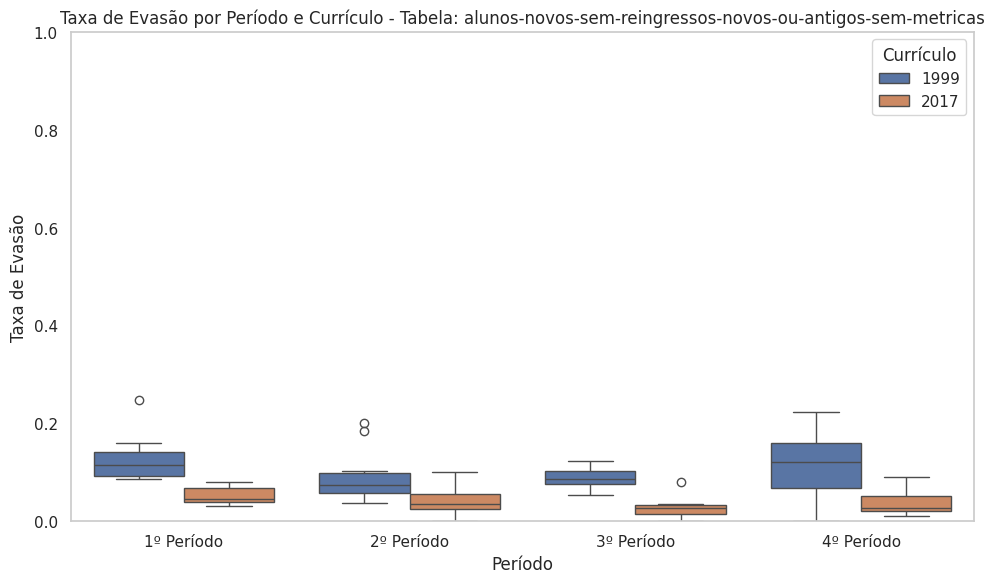

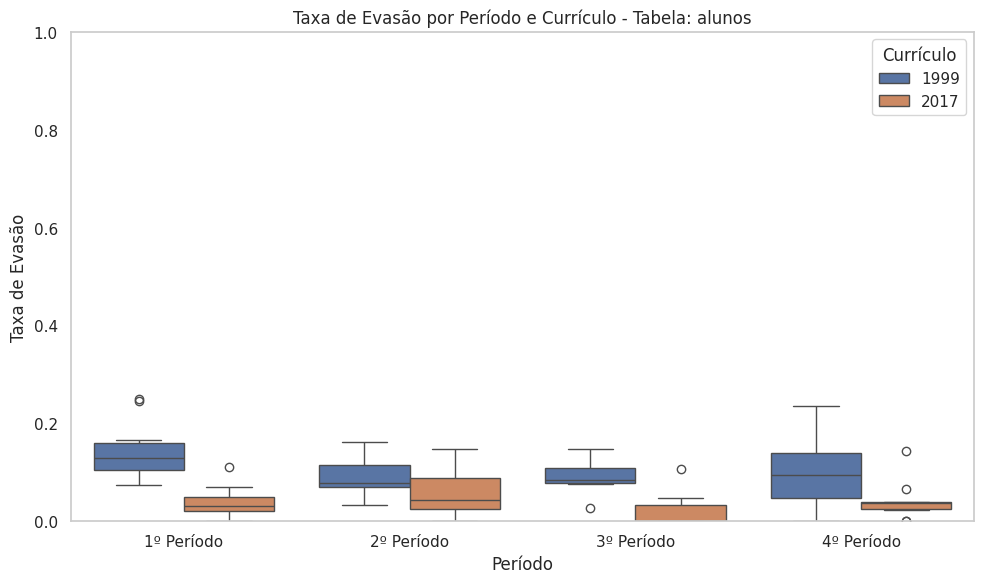

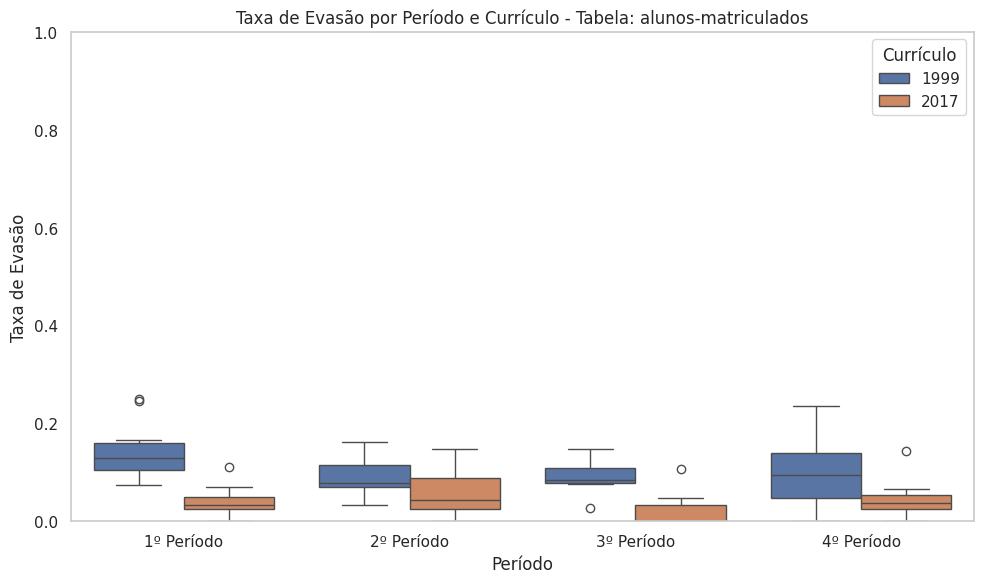

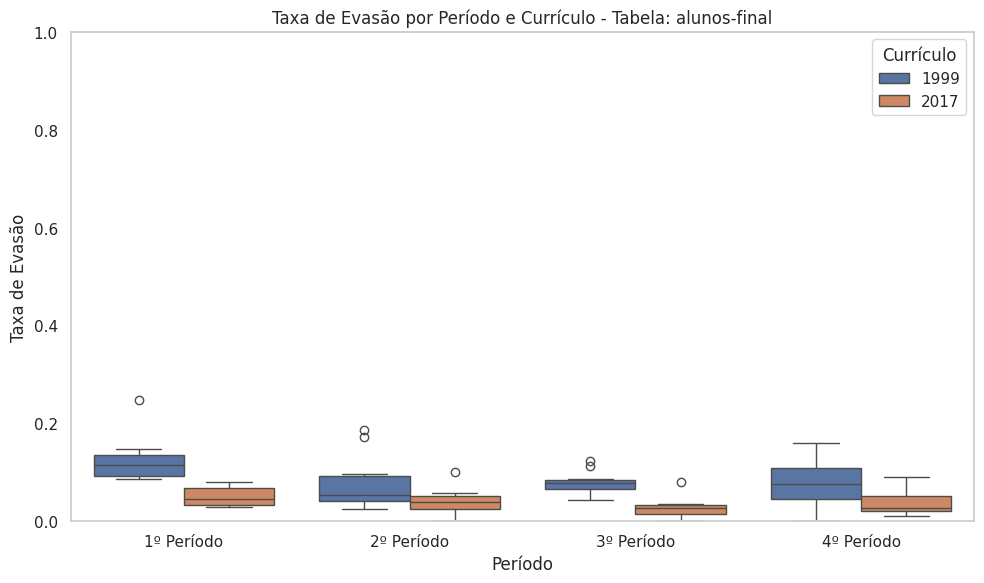

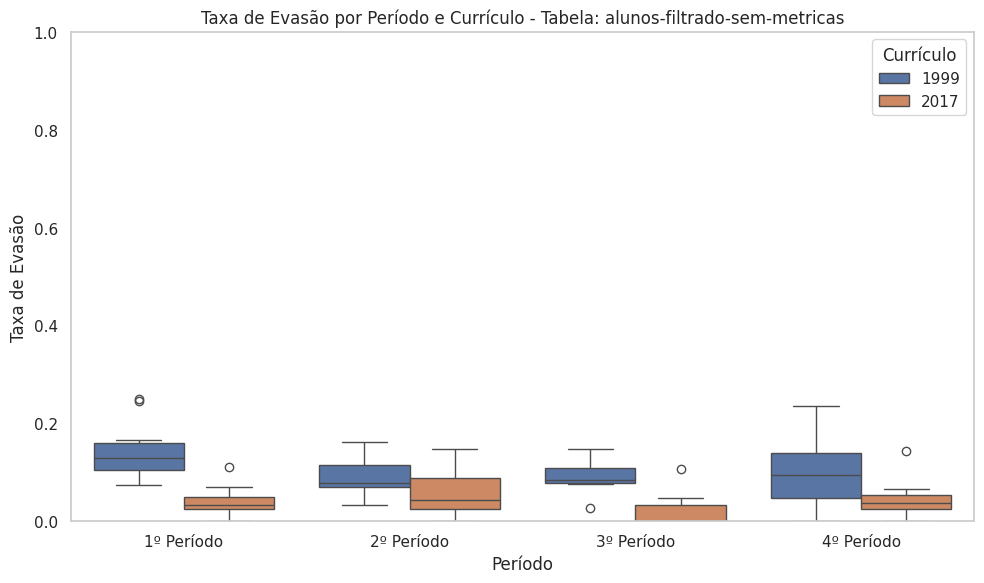

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Função para calcular o N-ésimo período após o ingresso
def proximo_n_periodo(periodo, n=1):
    ano, semestre = map(int, periodo.split('.'))
    for _ in range(n):
        if semestre == 1:
            semestre = 2
        else:
            semestre = 1
            ano += 1
    return f"{ano}.{semestre}"

# Função genérica para calcular evasão ao final de N períodos
def evasao_apos_n_periodos(df, n_periodo, inicio, fim):
    df['periodo_de_ingresso'] = df['periodo_de_ingresso'].astype(str).fillna('')
    df['periodo_de_evasao'] = df['periodo_de_evasao'].astype(str).fillna('')
    
    # Filtrar pelo intervalo do currículo
    df_filtrado = df[(df['periodo_de_ingresso'] >= inicio) & (df['periodo_de_ingresso'] <= fim)].copy()

    # Calcular o período esperado de evasão
    df_filtrado['periodo_esperado_evasao'] = df_filtrado['periodo_de_ingresso'].apply(
        lambda x: proximo_n_periodo(x, n_periodo)
    )

    # Verificar evasão exatamente no período esperado
    df_filtrado[f'evadiu_no_{n_periodo}o_periodo'] = df_filtrado.apply(
        lambda row: row['periodo_de_evasao'] == row['periodo_esperado_evasao'],
        axis=1
    )

    # Agrupar e calcular estatísticas
    resumo = df_filtrado.groupby('periodo_de_ingresso').agg(
        total_ingressantes=('cpf', 'count'),
        total_evasao=(f'evadiu_no_{n_periodo}o_periodo', 'sum')
    )
    resumo['taxa_evasao'] = resumo['total_evasao'] / resumo['total_ingressantes']
    
    # Adicionar coluna do período n e reset index para merge posterior
    resumo = resumo.reset_index()
    resumo['periodo'] = n_periodo
    
    return resumo[['periodo_de_ingresso', 'periodo', 'taxa_evasao']]

# Parâmetros por currículo
curriculos = {
    '1999': {'inicio': '2011.1', 'fim': '2016.2'},
    '2017': {'inicio': '2018.1', 'fim': '2022.3'}
}

# Lista de tabelas a serem processadas
tabelas_nomes = list(tabelas_tratadas_limpo.keys())

# Loop principal para calcular e armazenar dados para os gráficos
for nome_tabela in tabelas_nomes:
    dfs_lista = []
    
    for curriculo, intervalo in curriculos.items():
        for n in range(1, 5):  # Períodos 1 ao 4
            df = tabelas_tratadas_limpo[nome_tabela]
            resultado = evasao_apos_n_periodos(df, n, intervalo['inicio'], intervalo['fim'])
            resultado['curriculo'] = curriculo
            resultado['tabela'] = nome_tabela
            dfs_lista.append(resultado)
    
    # Concatenar todos os resultados para esta tabela
    df_concat = pd.concat(dfs_lista, ignore_index=True)
    
    # Para plotar, padronizar nomes dos períodos para exibir no eixo X
    df_concat['periodo_str'] = df_concat['periodo'].astype(str) + 'º Período'
    
    # Plotar boxplot para esta tabela
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_concat, x='periodo_str', y='taxa_evasao', hue='curriculo')
    
    plt.title(f'Taxa de Evasão por Período e Currículo - Tabela: {nome_tabela}')
    plt.xlabel('Período')
    plt.ylabel('Taxa de Evasão')
    plt.ylim(0, 1)  # Taxa entre 0 e 1
    plt.legend(title='Currículo')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


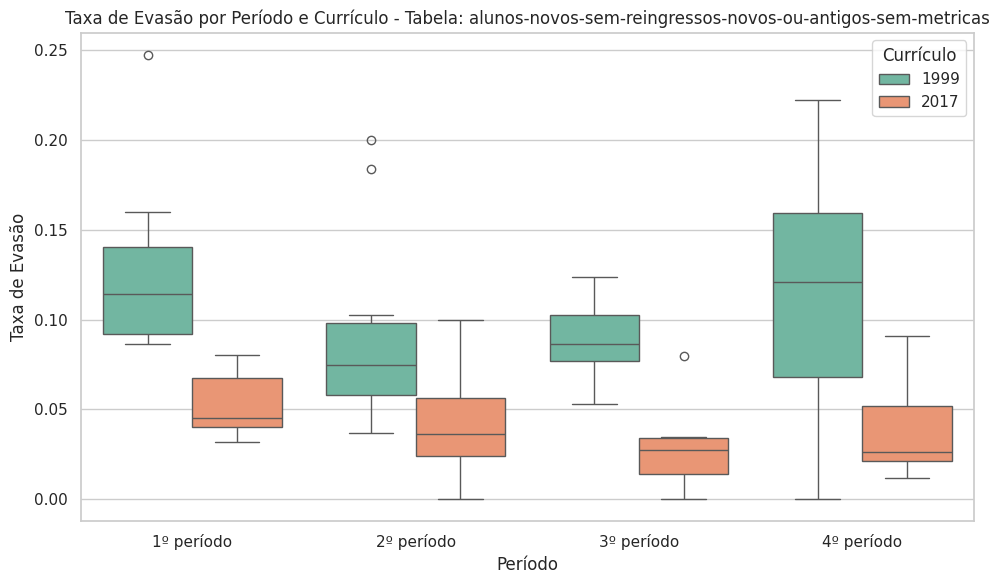

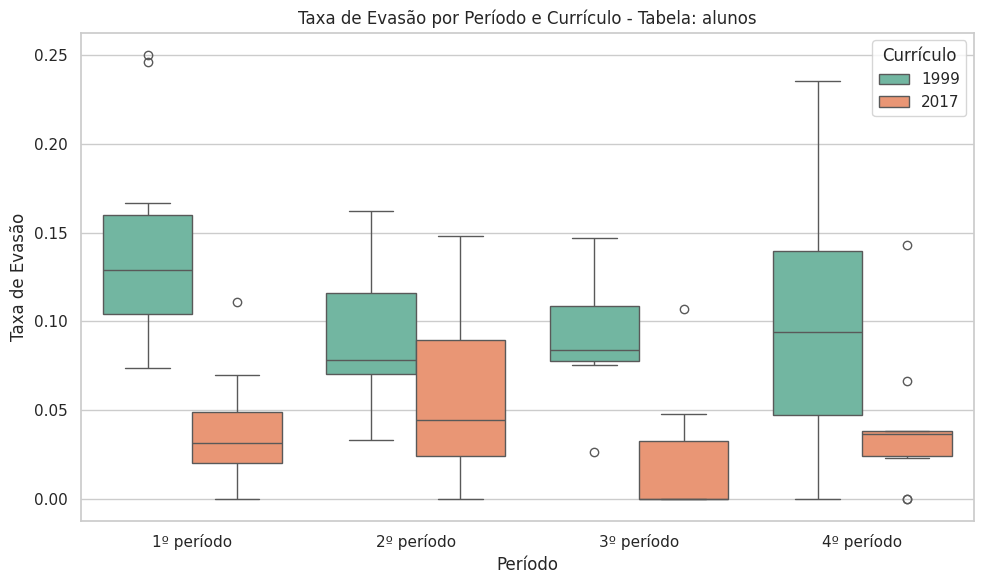

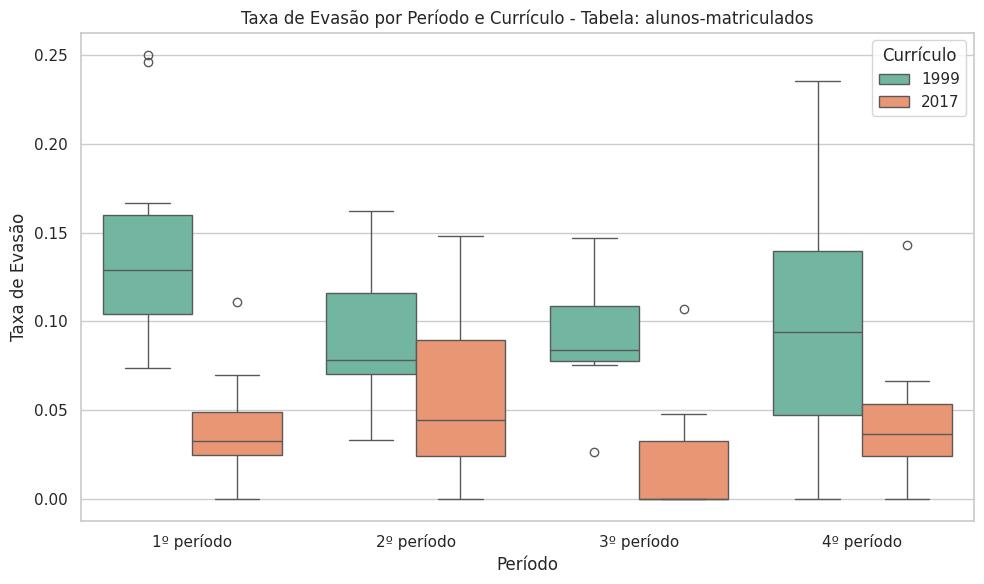

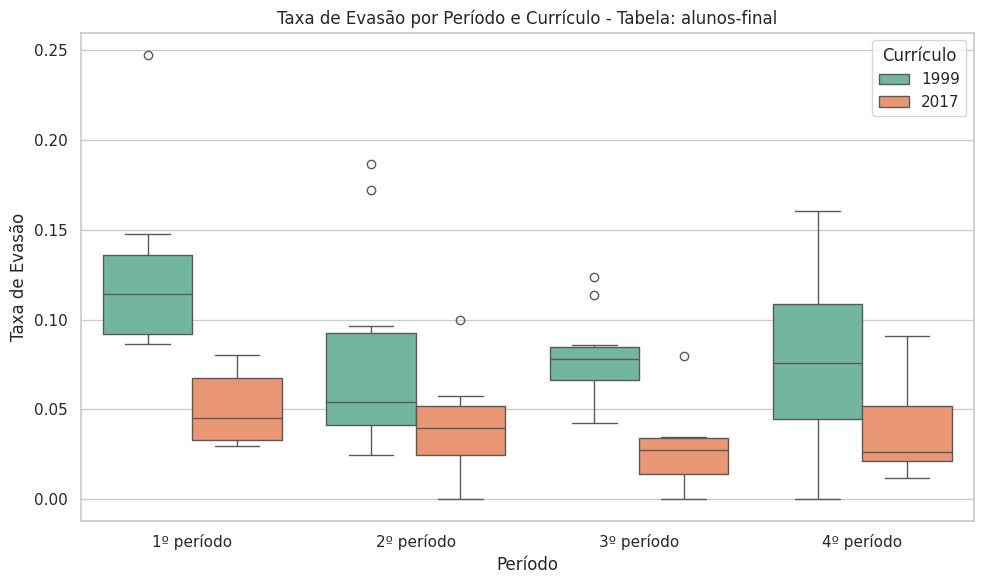

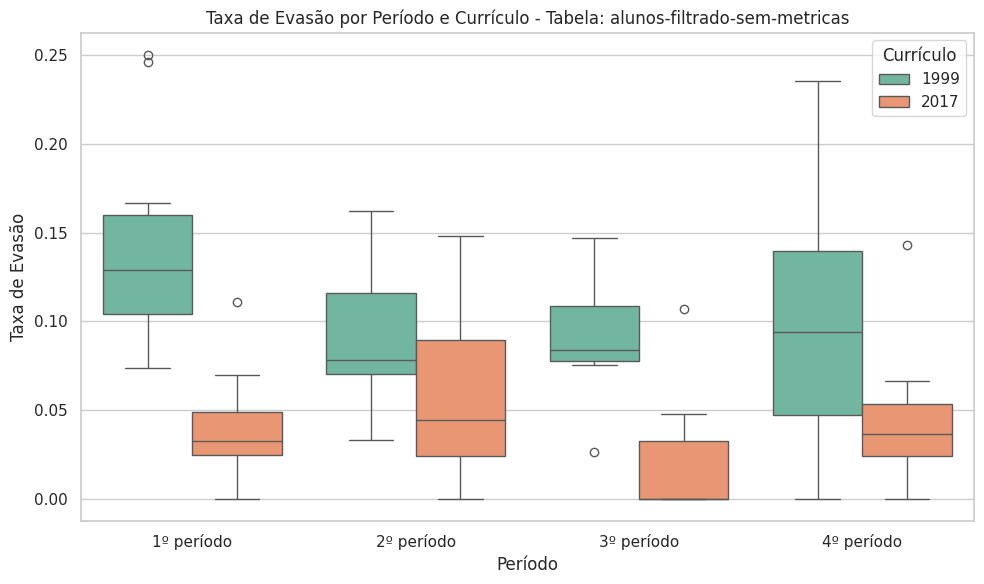

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Função para calcular o N-ésimo período após o ingresso
def proximo_n_periodo(periodo, n=1):
    ano, semestre = map(int, periodo.split('.'))
    for _ in range(n):
        if semestre == 1:
            semestre = 2
        else:
            semestre = 1
            ano += 1
    return f"{ano}.{semestre}"

# Função genérica para calcular evasão ao final de N períodos
def evasao_apos_n_periodos(df, n_periodo, inicio, fim):
    df['periodo_de_ingresso'] = df['periodo_de_ingresso'].astype(str).fillna('')
    df['periodo_de_evasao'] = df['periodo_de_evasao'].astype(str).fillna('')
    
    # Filtrar pelo intervalo do currículo
    df_filtrado = df[(df['periodo_de_ingresso'] >= inicio) & (df['periodo_de_ingresso'] <= fim)].copy()

    # Calcular o período esperado de evasão
    df_filtrado['periodo_esperado_evasao'] = df_filtrado['periodo_de_ingresso'].apply(
        lambda x: proximo_n_periodo(x, n_periodo)
    )

    # Verificar evasão exatamente no período esperado
    df_filtrado[f'evadiu_no_{n_periodo}o_periodo'] = df_filtrado.apply(
        lambda row: row['periodo_de_evasao'] == row['periodo_esperado_evasao'],
        axis=1
    )

    # Agrupar e calcular estatísticas
    resumo = df_filtrado.groupby('periodo_de_ingresso').agg(
        total_ingressantes=('cpf', 'count'),
        total_evasao=(f'evadiu_no_{n_periodo}o_periodo', 'sum')
    )
    resumo['taxa_evasao'] = resumo['total_evasao'] / resumo['total_ingressantes']

    return resumo.reset_index()

# Parâmetros por currículo
curriculos = {
    '1999': {'inicio': '2011.1', 'fim': '2016.2'},
    '2017': {'inicio': '2018.1', 'fim': '2022.3'}
}

# Lista de tabelas a serem processadas
tabelas_nomes = list(tabelas_tratadas_limpo.keys())

# Lista para armazenar todos os resultados
dados_para_plot = []

# Loop principal para todos os currículos, períodos e tabelas
for curriculo, intervalo in curriculos.items():
    for n in range(1, 5):  # 1º ao 4º período
        for nome in tabelas_nomes:
            df = tabelas_tratadas_limpo[nome]
            resultado = evasao_apos_n_periodos(df, n, intervalo['inicio'], intervalo['fim'])
            for _, row in resultado.iterrows():
                dados_para_plot.append({
                    'periodo': f"{n}º período",
                    'taxa_evasao': row['taxa_evasao'],
                    'curriculo': curriculo,
                    'tabela': nome
                })

# Converter para DataFrame
df_plot = pd.DataFrame(dados_para_plot)

# Criar gráficos para cada tabela
for tabela in df_plot['tabela'].unique():
    plt.figure(figsize=(10, 6))
    dados_tabela = df_plot[df_plot['tabela'] == tabela]
    
    sns.boxplot(x='periodo', y='taxa_evasao', hue='curriculo', data=dados_tabela, palette='Set2')
    plt.title(f'Taxa de Evasão por Período e Currículo - Tabela: {tabela}')
    plt.ylabel('Taxa de Evasão')
    plt.xlabel('Período')
    plt.legend(title='Currículo')
    plt.tight_layout()
    plt.show()


### Gráficos de linhas que mostram a tendência da evasão ao longo dos períodos

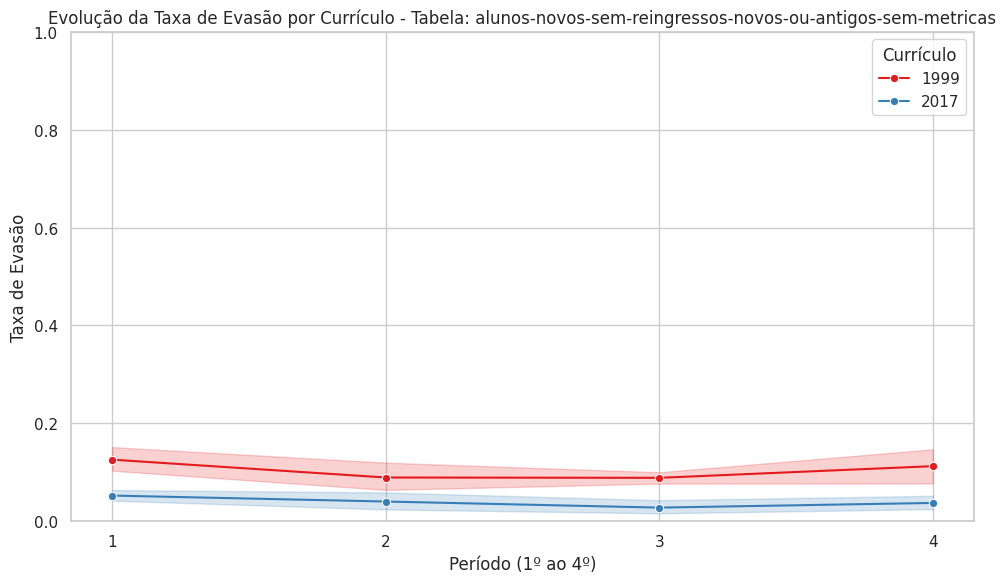

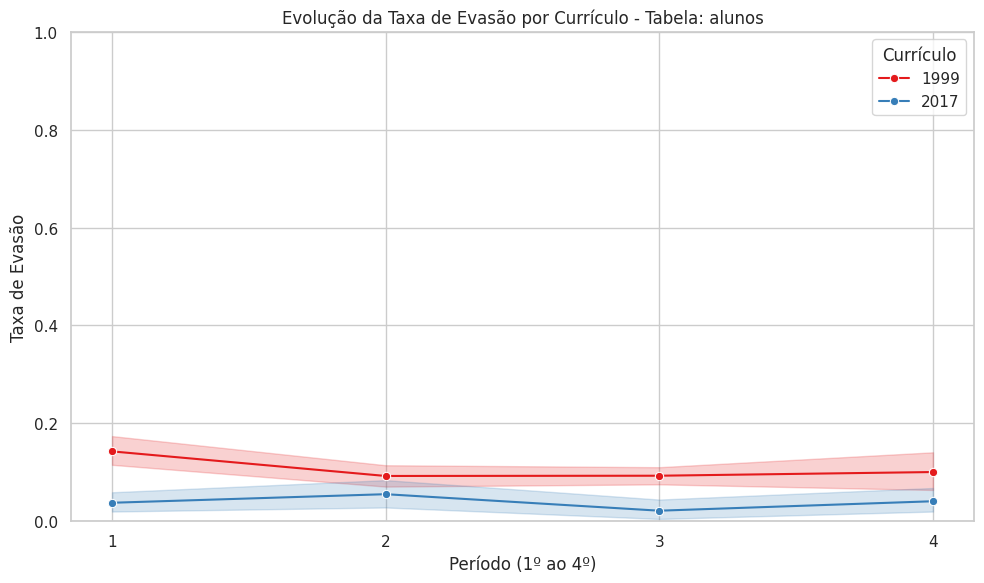

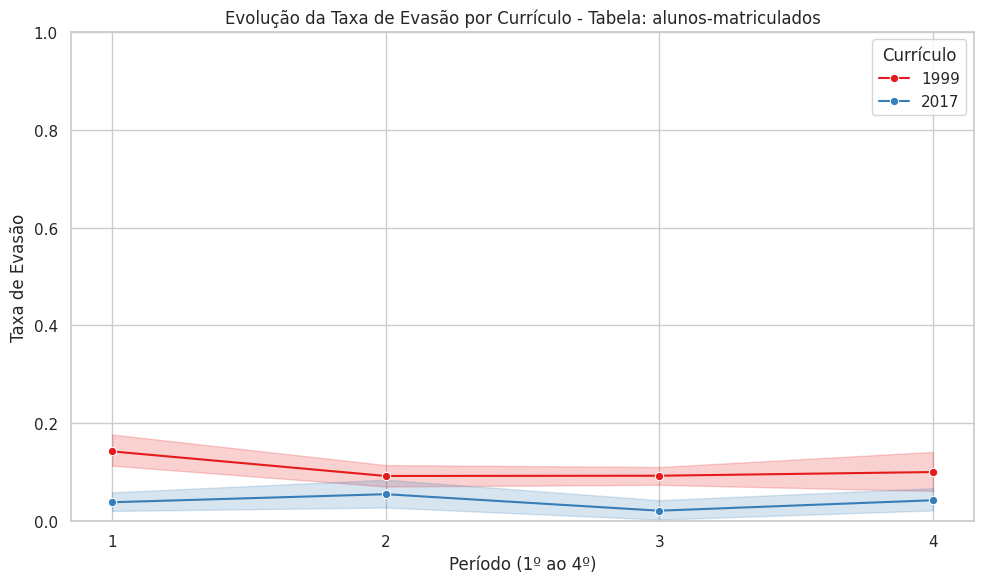

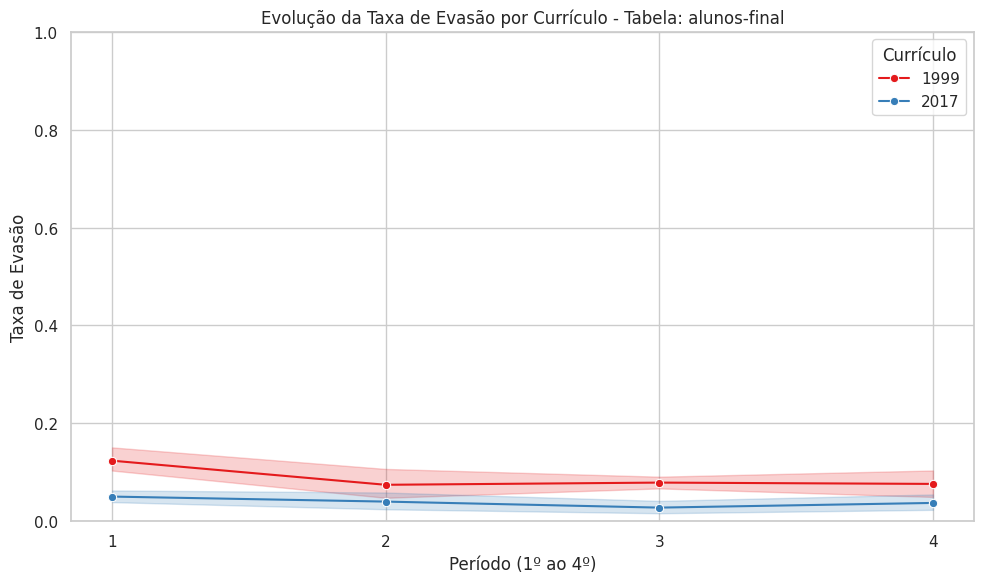

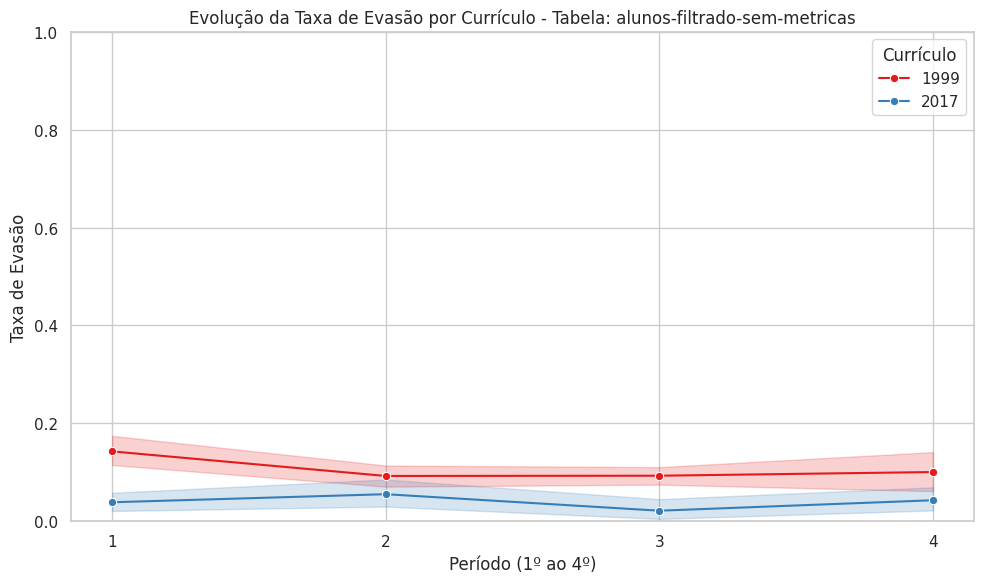

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Função para calcular o N-ésimo período após o ingresso
def proximo_n_periodo(periodo, n=1):
    ano, semestre = map(int, periodo.split('.'))
    for _ in range(n):
        if semestre == 1:
            semestre = 2
        else:
            semestre = 1
            ano += 1
    return f"{ano}.{semestre}"

# Função genérica para calcular evasão ao final de N períodos
def evasao_apos_n_periodos(df, n_periodo, inicio, fim):
    df['periodo_de_ingresso'] = df['periodo_de_ingresso'].astype(str).fillna('')
    df['periodo_de_evasao'] = df['periodo_de_evasao'].astype(str).fillna('')
    
    # Filtrar pelo intervalo do currículo
    df_filtrado = df[(df['periodo_de_ingresso'] >= inicio) & (df['periodo_de_ingresso'] <= fim)].copy()

    # Calcular o período esperado de evasão
    df_filtrado['periodo_esperado_evasao'] = df_filtrado['periodo_de_ingresso'].apply(
        lambda x: proximo_n_periodo(x, n_periodo)
    )

    # Verificar evasão exatamente no período esperado
    df_filtrado[f'evadiu_no_{n_periodo}o_periodo'] = df_filtrado.apply(
        lambda row: row['periodo_de_evasao'] == row['periodo_esperado_evasao'],
        axis=1
    )

    # Agrupar e calcular estatísticas
    resumo = df_filtrado.groupby('periodo_de_ingresso').agg(
        total_ingressantes=('cpf', 'count'),
        total_evasao=(f'evadiu_no_{n_periodo}o_periodo', 'sum')
    )
    resumo['taxa_evasao'] = resumo['total_evasao'] / resumo['total_ingressantes']

    return resumo.reset_index()

# Parâmetros por currículo
curriculos = {
    '1999': {'inicio': '2011.1', 'fim': '2016.2'},
    '2017': {'inicio': '2018.1', 'fim': '2022.3'}
}

# Lista de tabelas a serem processadas
tabelas_nomes = list(tabelas_tratadas_limpo.keys())

# Lista para armazenar todos os resultados
dados_para_plot = []

# Loop principal para todos os currículos, períodos e tabelas
for curriculo, intervalo in curriculos.items():
    for n in range(1, 5):  # 1º ao 4º período
        for nome in tabelas_nomes:
            df = tabelas_tratadas_limpo[nome]
            resultado = evasao_apos_n_periodos(df, n, intervalo['inicio'], intervalo['fim'])
            for _, row in resultado.iterrows():
                dados_para_plot.append({
                    'periodo': n,
                    'taxa_evasao': row['taxa_evasao'],
                    'curriculo': curriculo,
                    'tabela': nome
                })

# Converter para DataFrame
df_plot = pd.DataFrame(dados_para_plot)

# Criar gráficos de linhas para cada tabela
for tabela in df_plot['tabela'].unique():
    plt.figure(figsize=(10, 6))
    dados_tabela = df_plot[df_plot['tabela'] == tabela]
    
    sns.lineplot(
        data=dados_tabela,
        x='periodo',
        y='taxa_evasao',
        hue='curriculo',
        marker='o',
        palette='Set1'
    )
    
    plt.title(f'Evolução da Taxa de Evasão por Currículo - Tabela: {tabela}')
    plt.ylabel('Taxa de Evasão')
    plt.xlabel('Período (1º ao 4º)')
    plt.xticks([1, 2, 3, 4])
    plt.ylim(0, 1)
    plt.legend(title='Currículo')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


### GRÁFICO DE BARRAS AGRUPADA

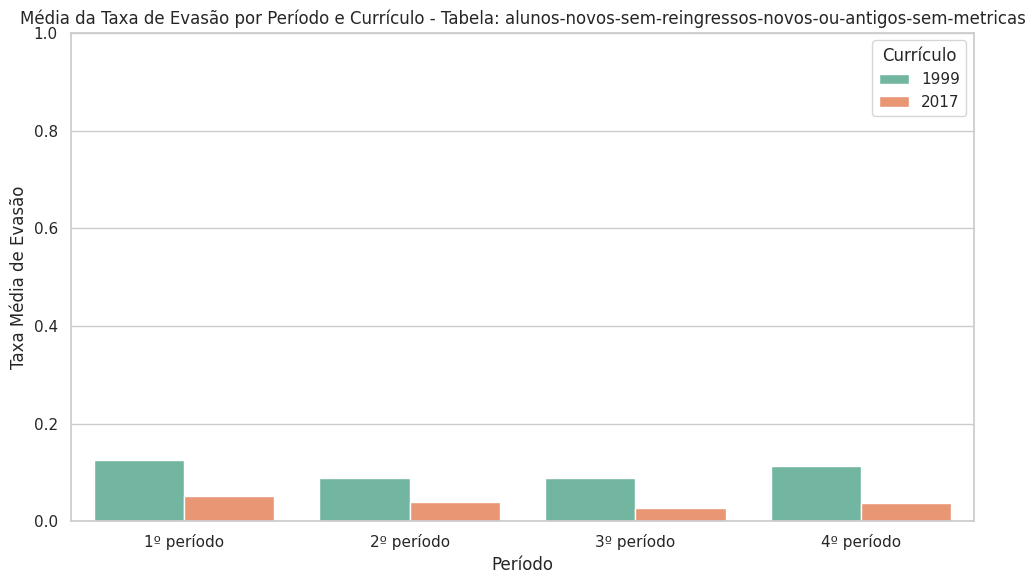

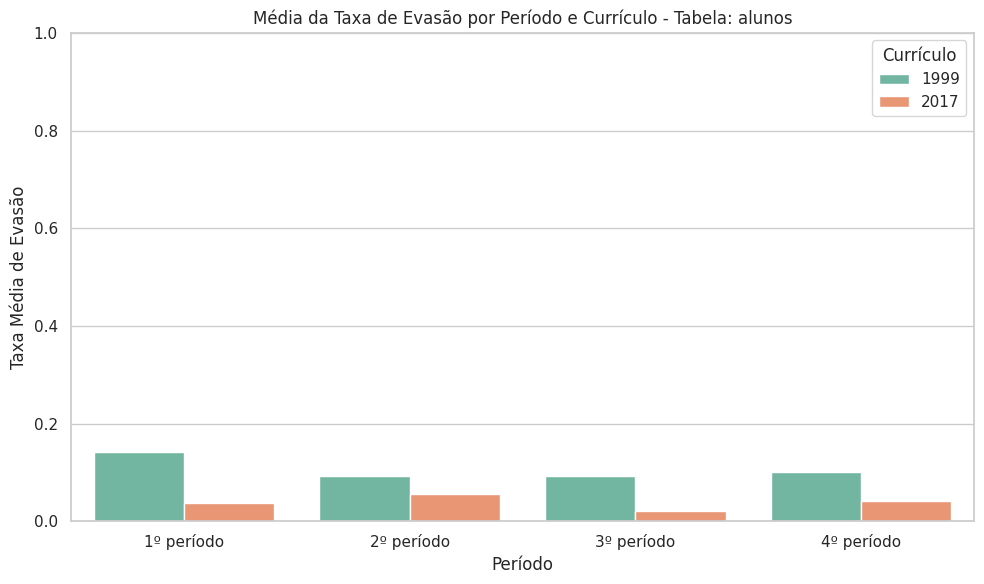

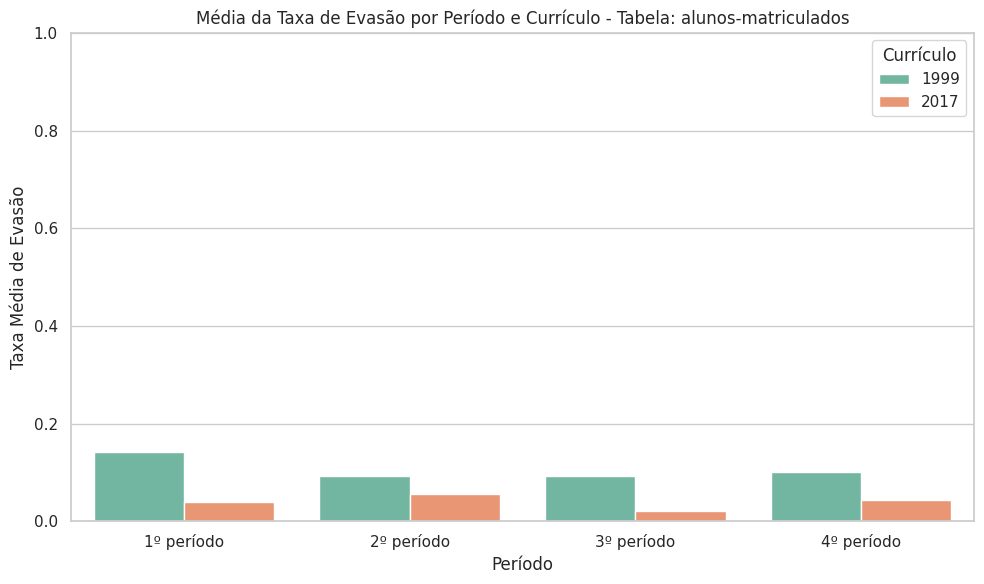

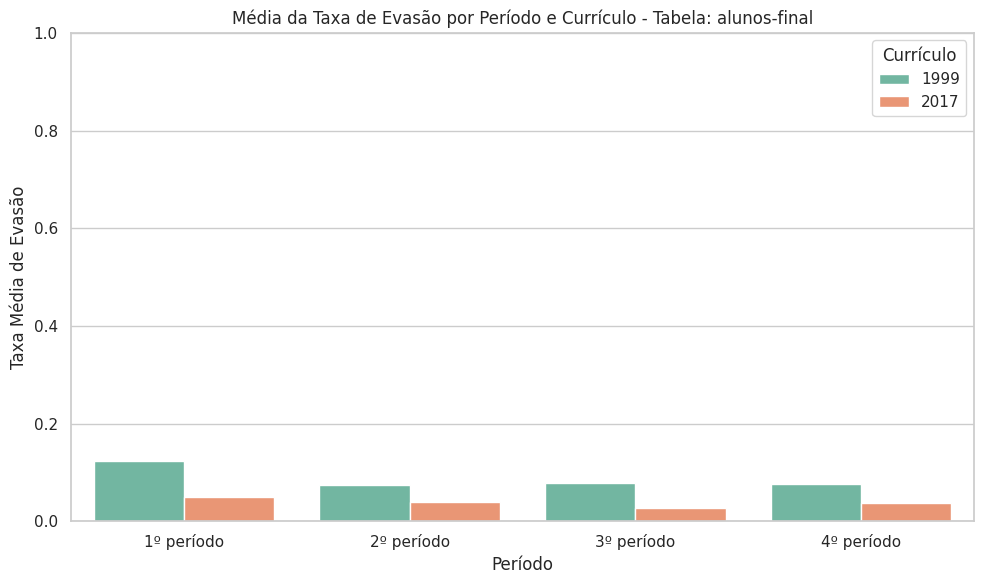

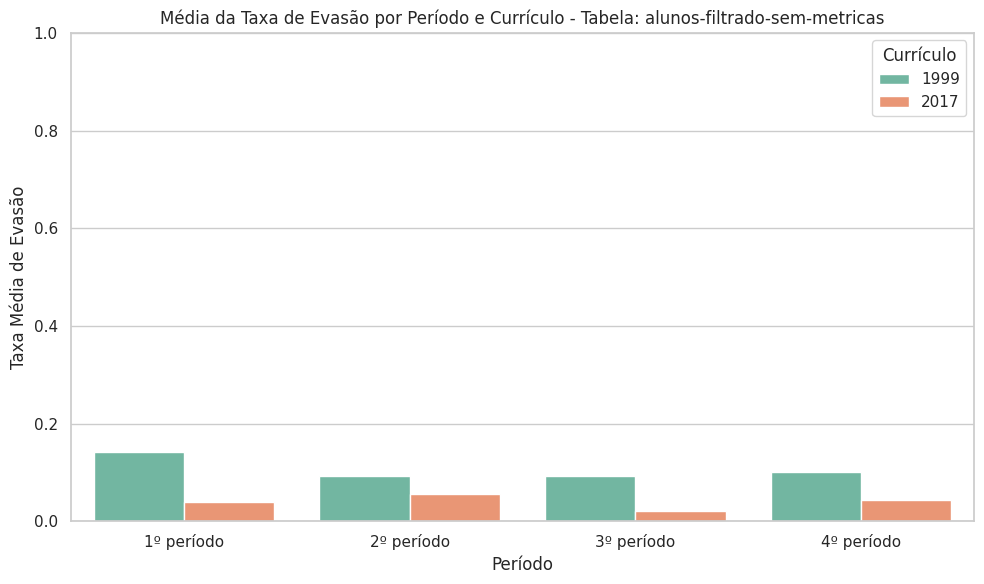

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Função para calcular o N-ésimo período após o ingresso
def proximo_n_periodo(periodo, n=1):
    ano, semestre = map(int, periodo.split('.'))
    for _ in range(n):
        if semestre == 1:
            semestre = 2
        else:
            semestre = 1
            ano += 1
    return f"{ano}.{semestre}"

# Função genérica para calcular evasão ao final de N períodos
def evasao_apos_n_periodos(df, n_periodo, inicio, fim):
    df['periodo_de_ingresso'] = df['periodo_de_ingresso'].astype(str).fillna('')
    df['periodo_de_evasao'] = df['periodo_de_evasao'].astype(str).fillna('')
    
    # Filtrar pelo intervalo do currículo
    df_filtrado = df[(df['periodo_de_ingresso'] >= inicio) & (df['periodo_de_ingresso'] <= fim)].copy()

    # Calcular o período esperado de evasão
    df_filtrado['periodo_esperado_evasao'] = df_filtrado['periodo_de_ingresso'].apply(
        lambda x: proximo_n_periodo(x, n_periodo)
    )

    # Verificar evasão exatamente no período esperado
    df_filtrado[f'evadiu_no_{n_periodo}o_periodo'] = df_filtrado.apply(
        lambda row: row['periodo_de_evasao'] == row['periodo_esperado_evasao'],
        axis=1
    )

    # Agrupar e calcular estatísticas
    resumo = df_filtrado.groupby('periodo_de_ingresso').agg(
        total_ingressantes=('cpf', 'count'),
        total_evasao=(f'evadiu_no_{n_periodo}o_periodo', 'sum')
    )
    resumo['taxa_evasao'] = resumo['total_evasao'] / resumo['total_ingressantes']

    return resumo.reset_index()

# Parâmetros por currículo
curriculos = {
    '1999': {'inicio': '2011.1', 'fim': '2016.2'},
    '2017': {'inicio': '2018.1', 'fim': '2022.3'}
}

# Lista de tabelas a serem processadas
tabelas_nomes = list(tabelas_tratadas_limpo.keys())

# Lista para armazenar todos os resultados
dados_para_plot = []

# Loop principal para todos os currículos, períodos e tabelas
for curriculo, intervalo in curriculos.items():
    for n in range(1, 5):  # 1º ao 4º período
        for nome in tabelas_nomes:
            df = tabelas_tratadas_limpo[nome]
            resultado = evasao_apos_n_periodos(df, n, intervalo['inicio'], intervalo['fim'])
            if not resultado.empty:
                taxa_media = resultado['taxa_evasao'].mean()
                dados_para_plot.append({
                    'periodo': f'{n}º período',
                    'taxa_media_evasao': taxa_media,
                    'curriculo': curriculo,
                    'tabela': nome
                })

# Converter para DataFrame
df_plot = pd.DataFrame(dados_para_plot)

# Criar gráficos de barras agrupadas para cada tabela
for tabela in df_plot['tabela'].unique():
    plt.figure(figsize=(10, 6))
    dados_tabela = df_plot[df_plot['tabela'] == tabela]

    sns.barplot(
        x='periodo',
        y='taxa_media_evasao',
        hue='curriculo',
        data=dados_tabela,
        palette='Set2'
    )

    plt.title(f'Média da Taxa de Evasão por Período e Currículo - Tabela: {tabela}')
    plt.ylabel('Taxa Média de Evasão')
    plt.xlabel('Período')
    plt.ylim(0, 1)
    plt.legend(title='Currículo')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()


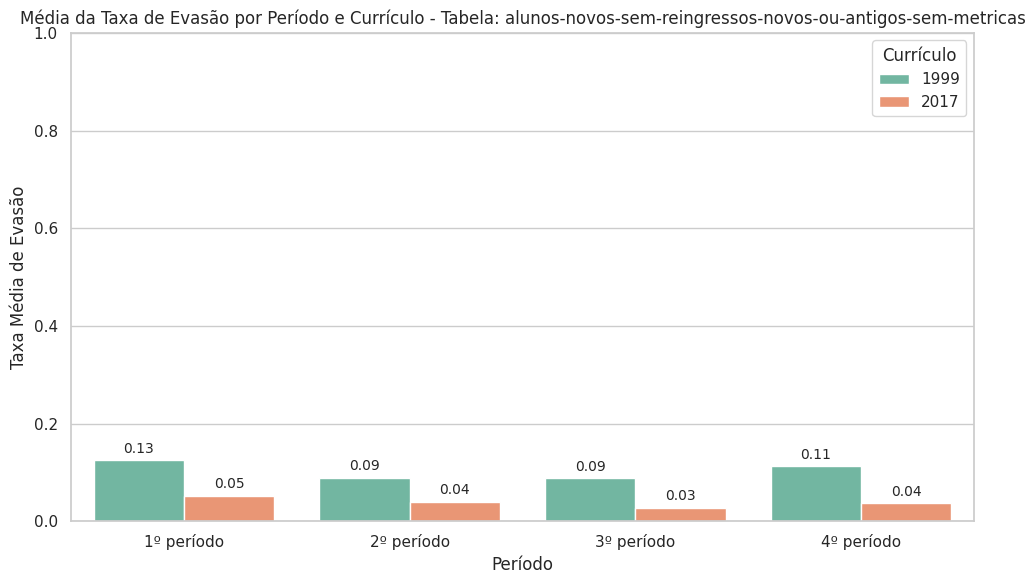

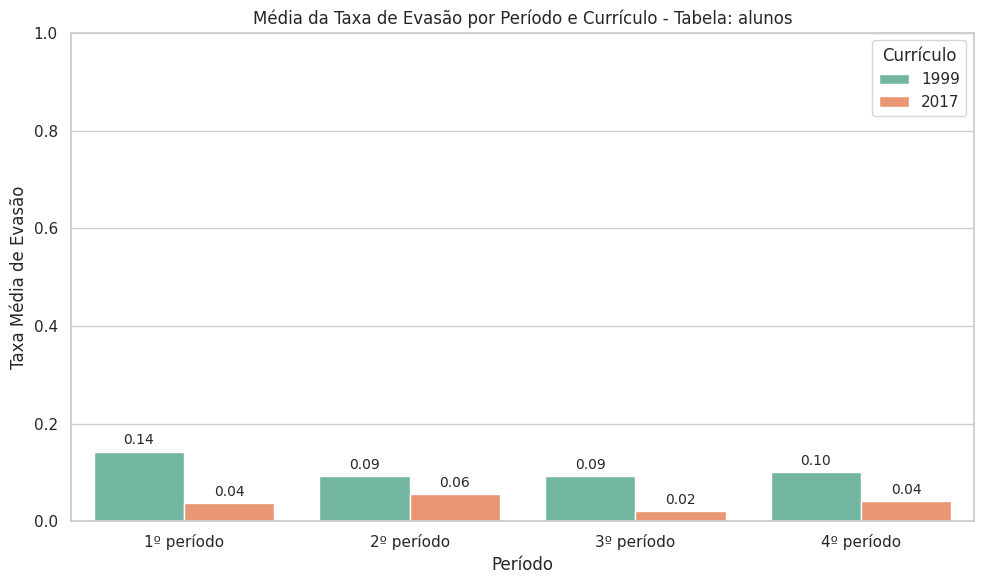

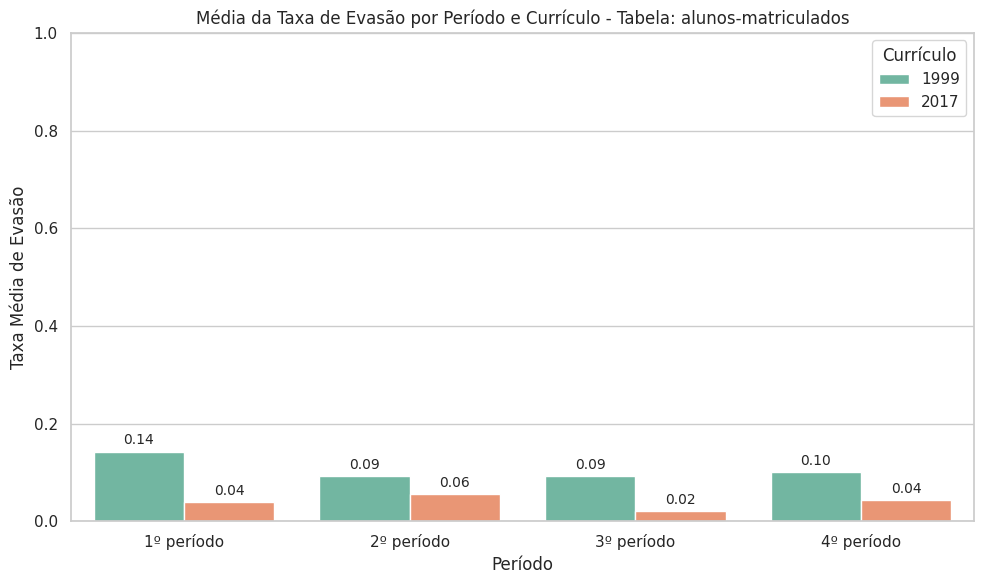

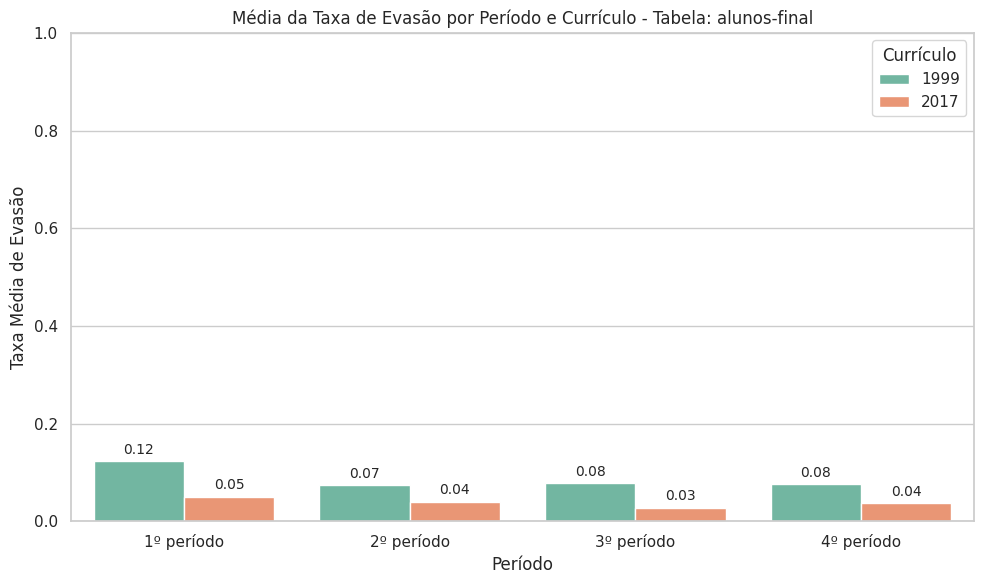

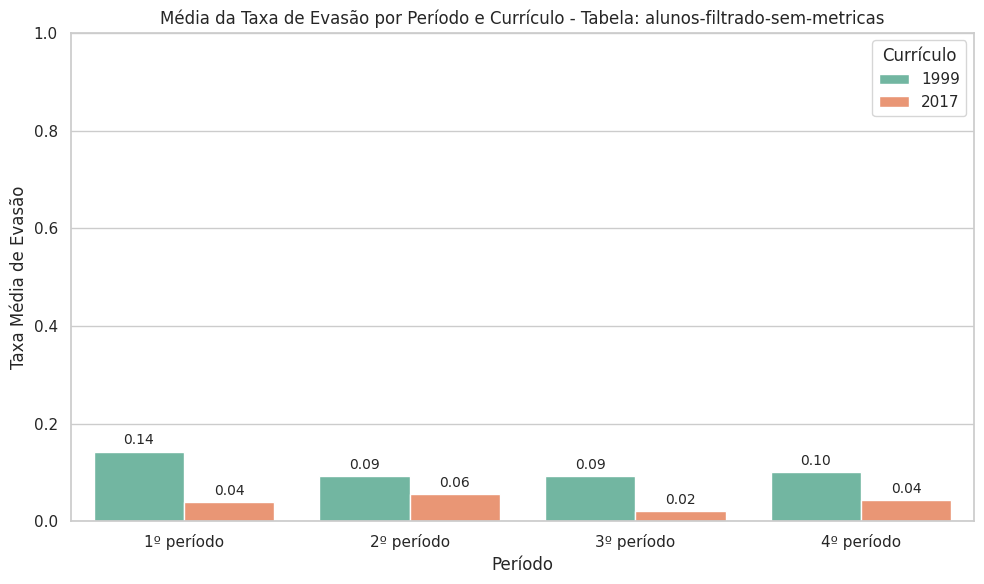

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Função para calcular o N-ésimo período após o ingresso
def proximo_n_periodo(periodo, n=1):
    ano, semestre = map(int, periodo.split('.'))
    for _ in range(n):
        if semestre == 1:
            semestre = 2
        else:
            semestre = 1
            ano += 1
    return f"{ano}.{semestre}"

# Função genérica para calcular evasão ao final de N períodos
def evasao_apos_n_periodos(df, n_periodo, inicio, fim):
    df['periodo_de_ingresso'] = df['periodo_de_ingresso'].astype(str).fillna('')
    df['periodo_de_evasao'] = df['periodo_de_evasao'].astype(str).fillna('')
    
    # Filtrar pelo intervalo do currículo
    df_filtrado = df[(df['periodo_de_ingresso'] >= inicio) & (df['periodo_de_ingresso'] <= fim)].copy()

    # Calcular o período esperado de evasão
    df_filtrado['periodo_esperado_evasao'] = df_filtrado['periodo_de_ingresso'].apply(
        lambda x: proximo_n_periodo(x, n_periodo)
    )

    # Verificar evasão exatamente no período esperado
    df_filtrado[f'evadiu_no_{n_periodo}o_periodo'] = df_filtrado.apply(
        lambda row: row['periodo_de_evasao'] == row['periodo_esperado_evasao'],
        axis=1
    )

    # Agrupar e calcular estatísticas
    resumo = df_filtrado.groupby('periodo_de_ingresso').agg(
        total_ingressantes=('cpf', 'count'),
        total_evasao=(f'evadiu_no_{n_periodo}o_periodo', 'sum')
    )
    resumo['taxa_evasao'] = resumo['total_evasao'] / resumo['total_ingressantes']

    return resumo.reset_index()

# Parâmetros por currículo
curriculos = {
    '1999': {'inicio': '2011.1', 'fim': '2016.2'},
    '2017': {'inicio': '2018.1', 'fim': '2022.3'}
}

# Lista de tabelas a serem processadas
tabelas_nomes = list(tabelas_tratadas_limpo.keys())

# Lista para armazenar todos os resultados
dados_para_plot = []

# Loop principal para todos os currículos, períodos e tabelas
for curriculo, intervalo in curriculos.items():
    for n in range(1, 5):  # 1º ao 4º período
        for nome in tabelas_nomes:
            df = tabelas_tratadas_limpo[nome]
            resultado = evasao_apos_n_periodos(df, n, intervalo['inicio'], intervalo['fim'])
            if not resultado.empty:
                taxa_media = resultado['taxa_evasao'].mean()
                dados_para_plot.append({
                    'periodo': f'{n}º período',
                    'taxa_media_evasao': taxa_media,
                    'curriculo': curriculo,
                    'tabela': nome
                })

# Converter para DataFrame
df_plot = pd.DataFrame(dados_para_plot)

# Criar gráficos de barras agrupadas com valores numéricos
for tabela in df_plot['tabela'].unique():
    plt.figure(figsize=(10, 6))
    dados_tabela = df_plot[df_plot['tabela'] == tabela]

    ax = sns.barplot(
        x='periodo',
        y='taxa_media_evasao',
        hue='curriculo',
        data=dados_tabela,
        palette='Set2'
    )

    # Adicionar os valores numéricos acima das barras
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3, fontsize=10)

    plt.title(f'Média da Taxa de Evasão por Período e Currículo - Tabela: {tabela}')
    plt.ylabel('Taxa Média de Evasão')
    plt.xlabel('Período')
    plt.ylim(0, 1)
    plt.legend(title='Currículo')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()


Análise Comparativa das Taxas de Evasão entre os Currículos 1999 e 2017
A análise detalhada da taxa de evasão, com base na tabela alunos-matriculados, revela diferenças significativas entre os currículos de 1999 e 2017 ao longo dos primeiros quatro períodos acadêmicos.

No segundo período, a taxa de evasão para o currículo de 1999 foi de aproximadamente 14%, enquanto para o currículo de 2017 esse índice foi consideravelmente menor, em torno de 4%. Essa diferença indica que o currículo mais recente tem maior eficácia em manter os estudantes matriculados nas fases iniciais do curso.

Nos períodos subsequentes, os dados mostram uma tendência de diminuição da evasão em ambos os currículos, porém, o currículo de 2017 continuou apresentando taxas inferiores, variando entre 2% e 6%, contrastando com a faixa de 9% a 10% observada no currículo de 1999. Tal comportamento sugere que o currículo atualizado proporciona uma estrutura acadêmica e suporte mais eficaz para a continuidade dos alunos.

É importante destacar que esta interpretação se baseia especificamente na tabela alunos-matriculados, embora outras tabelas tenham sido igualmente exploradas e analisadas, confirmando a consistência dessa tendência geral de menor evasão no currículo mais recente.

Esses resultados reforçam a importância de atualizações curriculares constantes e direcionadas, pois mostram claramente que as mudanças implementadas no currículo de 2017 contribuíram para a melhora significativa da retenção dos estudantes no curso.



### Média, Desvio padrão 


--- Análise das variáveis no 1º período ---

Variável: sexo
Contagem:
 sexo
M    853
F    163
Name: count, dtype: int64
Proporção:
 sexo
M    0.839567
F    0.160433
Name: proportion, dtype: float64
Taxa média de evasão por categoria:
 sexo
F    0.153374
M    0.121923
Name: evadiu_no_1o_periodo, dtype: float64

Variável: idade
Média: 31.37, Desvio padrão: 3.93

Variável cota NÃO encontrada na tabela.

Variável: estado_civil
Contagem:
 estado_civil
Solteiro    978
Casado       34
Nan           4
Name: count, dtype: int64
Proporção:
 estado_civil
Solteiro    0.962598
Casado      0.033465
Nan         0.003937
Name: proportion, dtype: float64
Taxa média de evasão por categoria:
 estado_civil
Casado      0.264706
Nan         0.750000
Solteiro    0.119632
Name: evadiu_no_1o_periodo, dtype: float64

Variável: cor
Contagem:
 cor
Branca      535
Parda       382
Preta        52
Nan          25
Amarela      20
Indígena      2
Name: count, dtype: int64
Proporção:
 cor
Branca      0.526575
Parda   

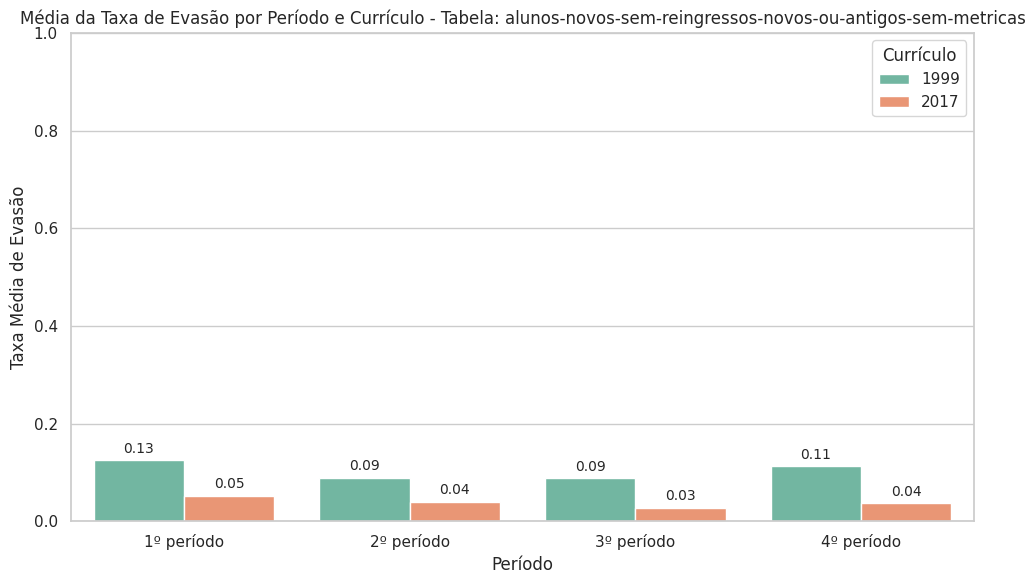

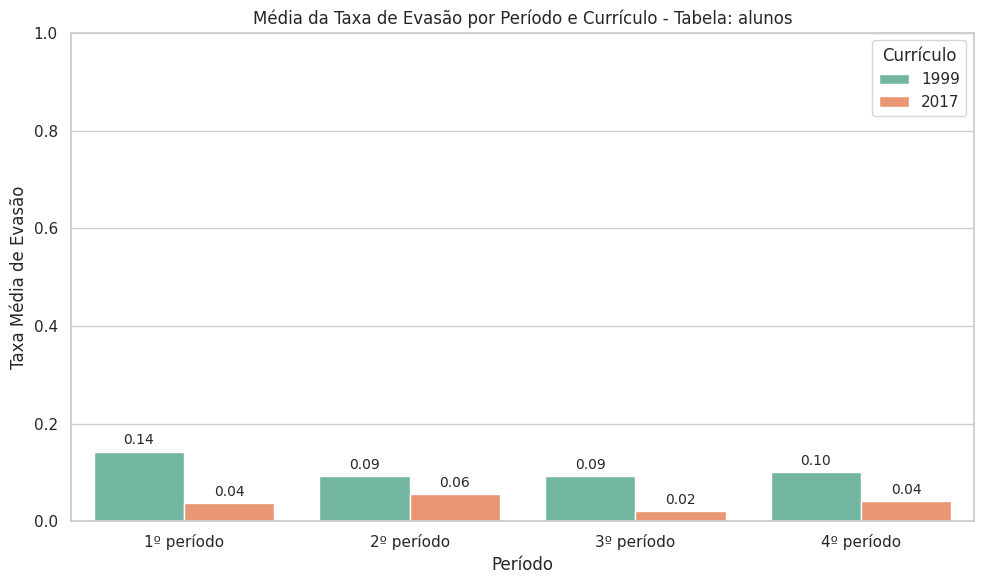

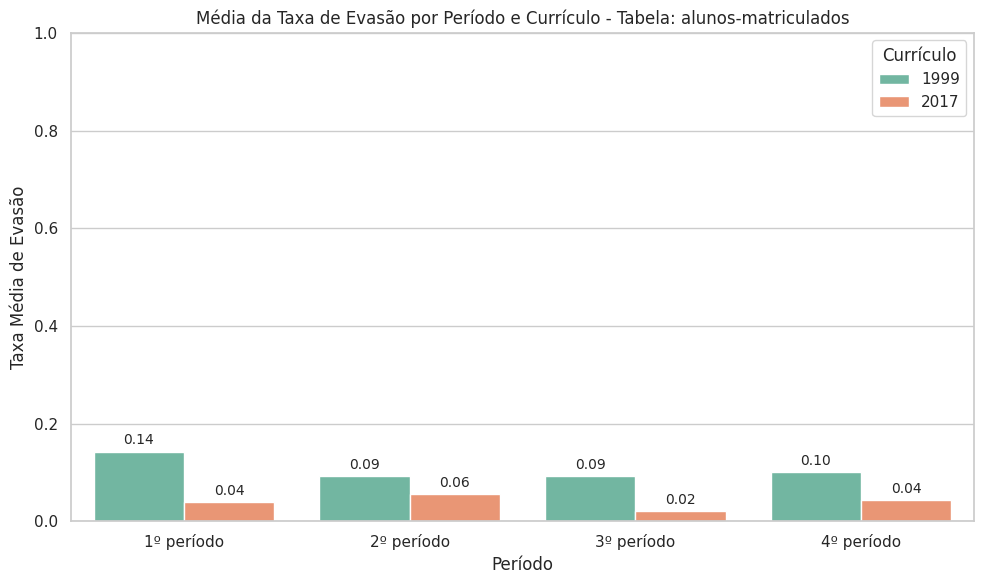

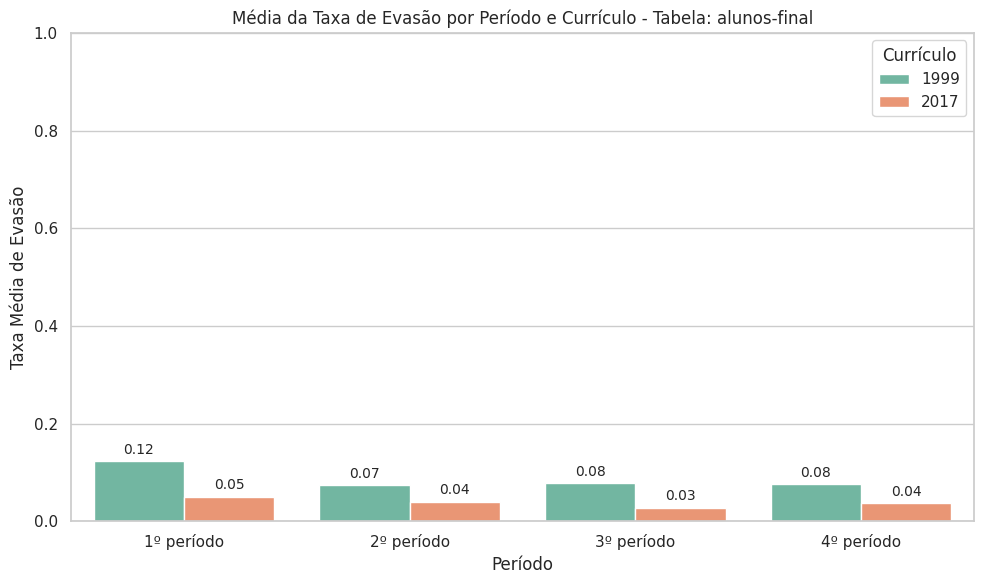

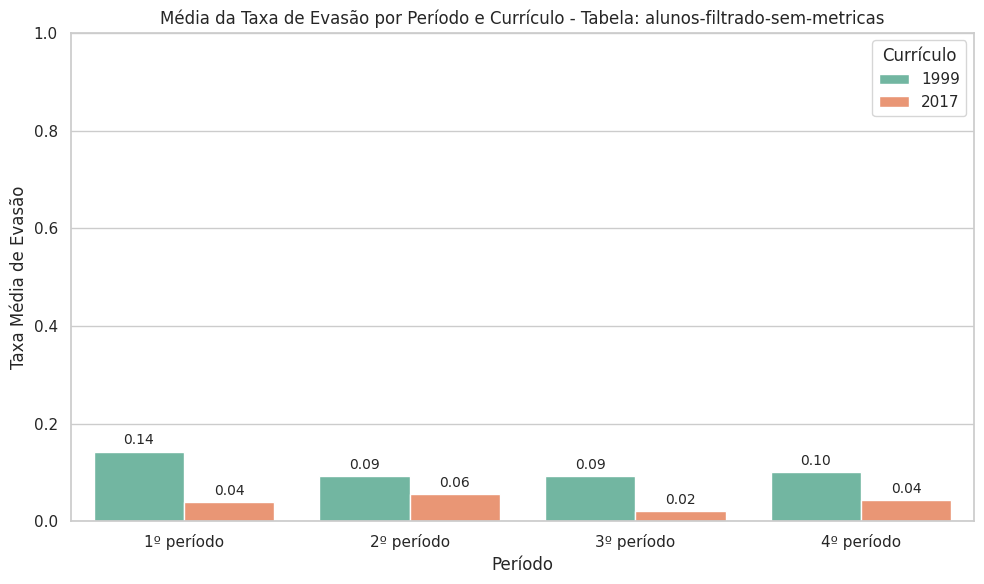

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Função para calcular o N-ésimo período após o ingresso
def proximo_n_periodo(periodo, n=1):
    ano, semestre = map(int, periodo.split('.'))
    for _ in range(n):
        if semestre == 1:
            semestre = 2
        else:
            semestre = 1
            ano += 1
    return f"{ano}.{semestre}"

# Função genérica para calcular evasão ao final de N períodos
def evasao_apos_n_periodos(df, n_periodo, inicio, fim):
    df['periodo_de_ingresso'] = df['periodo_de_ingresso'].astype(str).fillna('')
    df['periodo_de_evasao'] = df['periodo_de_evasao'].astype(str).fillna('')
    
    # Filtrar pelo intervalo do currículo
    df_filtrado = df[(df['periodo_de_ingresso'] >= inicio) & (df['periodo_de_ingresso'] <= fim)].copy()

    # Calcular o período esperado de evasão
    df_filtrado['periodo_esperado_evasao'] = df_filtrado['periodo_de_ingresso'].apply(
        lambda x: proximo_n_periodo(x, n_periodo)
    )

    # Verificar evasão exatamente no período esperado
    df_filtrado[f'evadiu_no_{n_periodo}o_periodo'] = df_filtrado.apply(
        lambda row: row['periodo_de_evasao'] == row['periodo_esperado_evasao'],
        axis=1
    )

    # Agrupar e calcular estatísticas
    resumo = df_filtrado.groupby('periodo_de_ingresso').agg(
        total_ingressantes=('cpf', 'count'),
        total_evasao=(f'evadiu_no_{n_periodo}o_periodo', 'sum')
    )
    resumo['taxa_evasao'] = resumo['total_evasao'] / resumo['total_ingressantes']

    return df_filtrado, resumo.reset_index()

# Função para análise descritiva das variáveis extras
def analise_variaveis(df, variaveis, n_periodo):
    print(f"\n--- Análise das variáveis no {n_periodo}º período ---")
    for var in variaveis:
        if var in df.columns:
            print(f"\nVariável: {var}")
            if pd.api.types.is_numeric_dtype(df[var]):
                media = df[var].mean()
                desvio = df[var].std()
                print(f"Média: {media:.2f}, Desvio padrão: {desvio:.2f}")
            else:
                contagem = df[var].value_counts(dropna=False)
                proporcao = df[var].value_counts(normalize=True, dropna=False)
                print("Contagem:\n", contagem)
                print("Proporção:\n", proporcao)

                # Se possível, calcular taxa média de evasão por categoria
                col_evasao = f'evadiu_no_{n_periodo}o_periodo'
                if col_evasao in df.columns:
                    taxa_por_categoria = df.groupby(var)[col_evasao].mean()
                    print("Taxa média de evasão por categoria:\n", taxa_por_categoria)
        else:
            print(f"\nVariável {var} NÃO encontrada na tabela.")

# Parâmetros por currículo
curriculos = {
    '1999': {'inicio': '2011.1', 'fim': '2016.2'},
    '2017': {'inicio': '2018.1', 'fim': '2022.3'}
}

# Variáveis extras para análise
variaveis_extra = ['sexo', 'idade', 'cota', 'estado_civil', 'cor']

# Lista de tabelas a serem processadas
tabelas_nomes = list(tabelas_tratadas_limpo.keys())

# Lista para armazenar todos os resultados de evasão para plot
dados_para_plot = []

# Loop principal
for curriculo, intervalo in curriculos.items():
    for n in range(1, 5):  # 1º ao 4º período
        for nome in tabelas_nomes:
            df = tabelas_tratadas_limpo[nome]
            df_filtrado, resultado = evasao_apos_n_periodos(df, n, intervalo['inicio'], intervalo['fim'])
            if not resultado.empty:
                taxa_media = resultado['taxa_evasao'].mean()
                dados_para_plot.append({
                    'periodo': f'{n}º período',
                    'taxa_media_evasao': taxa_media,
                    'curriculo': curriculo,
                    'tabela': nome
                })

                # Análise das variáveis extras na amostra filtrada e com evasão
                analise_variaveis(df_filtrado, variaveis_extra, n)

# Converter para DataFrame para plotagem
df_plot = pd.DataFrame(dados_para_plot)

# Gráficos de barras agrupadas com valores numéricos
for tabela in df_plot['tabela'].unique():
    plt.figure(figsize=(10, 6))
    dados_tabela = df_plot[df_plot['tabela'] == tabela]

    ax = sns.barplot(
        x='periodo',
        y='taxa_media_evasao',
        hue='curriculo',
        data=dados_tabela,
        palette='Set2'
    )

    # Adicionar os valores numéricos acima das barras
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3, fontsize=10)

    plt.title(f'Média da Taxa de Evasão por Período e Currículo - Tabela: {tabela}')
    plt.ylabel('Taxa Média de Evasão')
    plt.xlabel('Período')
    plt.ylim(0, 1)
    plt.legend(title='Currículo')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()


In [39]:
import pandas as pd

def analisar_variaveis(df, n_periodo=1):
    resultados = {}
    df = df.copy()
    
    # Garantir que 'periodo_de_ingresso' e 'periodo_de_evasao' estão como string
    df['periodo_de_ingresso'] = df['periodo_de_ingresso'].astype(str).fillna('')
    df['periodo_de_evasao'] = df['periodo_de_evasao'].astype(str).fillna('')
    
    # Calcular o período esperado de evasão
    df['periodo_esperado_evasao'] = df['periodo_de_ingresso'].apply(
        lambda x: proximo_n_periodo(x, n_periodo)
    )

    # Verificar evasão no período esperado
    df[f'evadiu_no_{n_periodo}o_periodo'] = df.apply(
        lambda row: row['periodo_de_evasao'] == row['periodo_esperado_evasao'],
        axis=1
    )

    print(f"\n--- Análise das variáveis no {n_periodo}º período ---")

    # Variável: sexo
    if 'sexo' in df.columns:
        sexo_contagem = df['sexo'].value_counts()
        sexo_proporcao = df['sexo'].value_counts(normalize=True)
        taxa_evasao_sexo = df.groupby('sexo')[f'evadiu_no_{n_periodo}o_periodo'].mean()

        tabela_sexo = pd.DataFrame({
            'Contagem': sexo_contagem,
            'Proporção': sexo_proporcao,
            'Taxa de Evasão': taxa_evasao_sexo
        })
        print("\n🟪 Tabela - Sexo:")
        print(tabela_sexo)
    else:
        print("Variável sexo NÃO encontrada.")

    # Variável: idade
    if 'idade' in df.columns:
        media_idade = df['idade'].mean()
        desvio_idade = df['idade'].std()
        print(f"\n📘 Idade - Média: {media_idade:.2f}, Desvio Padrão: {desvio_idade:.2f}")
    else:
        print("Variável idade NÃO encontrada.")

    # Variáveis categóricas adicionais
    for var in ['cota', 'estado_civil', 'cor']:
        if var in df.columns:
            contagem = df[var].value_counts()
            proporcao = df[var].value_counts(normalize=True)
            taxa_evasao = df.groupby(var)[f'evadiu_no_{n_periodo}o_periodo'].mean()

            tabela_var = pd.DataFrame({
                'Contagem': contagem,
                'Proporção': proporcao,
                'Taxa de Evasão': taxa_evasao
            })
            print(f"\n🟨 Tabela - {var.capitalize()}:")
            print(tabela_var)
        else:
            print(f"Variável {var} NÃO encontrada na tabela.")


In [40]:
for nome in tabelas_nomes:
    df = tabelas_tratadas_limpo[nome]
    analisar_variaveis(df, n_periodo=1)



--- Análise das variáveis no 1º período ---

🟪 Tabela - Sexo:
      Contagem  Proporção  Taxa de Evasão
sexo                                     
F          399      0.175        0.092732
M         1881      0.825        0.083998

📘 Idade - Média: 27.76, Desvio Padrão: 5.12
Variável cota NÃO encontrada na tabela.

🟨 Tabela - Estado_civil:
              Contagem  Proporção  Taxa de Evasão
estado_civil                                     
Casado              58   0.025439        0.241379
Divorciado           3   0.001316        0.000000
Nan                  7   0.003070        0.857143
Solteiro          2212   0.970175        0.079114

🟨 Tabela - Cor:
          Contagem  Proporção  Taxa de Evasão
cor                                          
Amarela         51   0.022368        0.156863
Branca        1157   0.507456        0.069144
Indígena         4   0.001754        0.000000
Nan             28   0.012281        0.428571
Parda          932   0.408772        0.086910
Preta          108 

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

def analisar_variaveis_com_graficos(df, n_periodo=1):
    df = df.copy()

    # Garantir que 'periodo_de_ingresso' e 'periodo_de_evasao' são strings
    df['periodo_de_ingresso'] = df['periodo_de_ingresso'].astype(str).fillna('')
    df['periodo_de_evasao'] = df['periodo_de_evasao'].astype(str).fillna('')

    # Calcular o período esperado de evasão
    df['periodo_esperado_evasao'] = df['periodo_de_ingresso'].apply(
        lambda x: proximo_n_periodo(x, n_periodo)
    )

    # Verificar evasão no período esperado
    evasao_col = f'evadiu_no_{n_periodo}o_periodo'
    df[evasao_col] = df.apply(
        lambda row: row['periodo_de_evasao'] == row['periodo_esperado_evasao'],
        axis=1
    )

    print(f"\n--- Análise das variáveis no {n_periodo}º período ---")

    # Variáveis categóricas a analisar
    variaveis_categoricas = ['sexo', 'cota', 'estado_civil', 'cor']

    for var in variaveis_categoricas:
        if var in df.columns:
            contagem = df[var].value_counts()
            proporcao = df[var].value_counts(normalize=True)
            taxa_evasao = df.groupby(var)[evasao_col].mean()

            tabela = pd.DataFrame({
                'Contagem': contagem,
                'Proporção': proporcao,
                'Taxa de Evasão': taxa_evasao
            })

            print(f"\n🟨 Tabela - {var.capitalize()}:")
            print(tabela)

            # 🔹 Gráfico de barras para taxa de evasão por categoria
            plt.figure(figsize=(8, 5))
            sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')
            plt.title(f'Taxa de Evasão por {var.capitalize()} - {n_periodo}º Período')
            plt.ylabel('Taxa de Evasão')
            plt.xlabel(var.capitalize())
            plt.ylim(0, 1)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
        else:
            print(f"⚠️ Variável {var} NÃO encontrada na tabela.")

    # Variável numérica: idade
    if 'idade' in df.columns:
        media_idade = df['idade'].mean()
        desvio_idade = df['idade'].std()
        print(f"\n📘 Idade - Média: {media_idade:.2f}, Desvio Padrão: {desvio_idade:.2f}")

        # 🔹 Histograma da idade
        plt.figure(figsize=(8, 5))
        sns.histplot(df['idade'], bins=20, kde=True, color='skyblue')
        plt.title(f'Distribuição de Idade dos Estudantes - {n_periodo}º Período')
        plt.xlabel('Idade')
        plt.ylabel('Frequência')
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

        # 🔹 Boxplot idade por evasão
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=evasao_col, y='idade', data=df, palette='Pastel1')
        plt.title(f'Idade por Status de Evasão - {n_periodo}º Período')
        plt.xlabel('Evadiu no período?')
        plt.ylabel('Idade')
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ Variável idade NÃO encontrada na tabela.")



📘📘📘 TABELA: ALUNOS-NOVOS-SEM-REINGRESSOS-NOVOS-OU-ANTIGOS-SEM-METRICAS 📘📘📘

--- Análise das variáveis no 1º período ---

🟨 Tabela - Sexo:
      Contagem  Proporção  Taxa de Evasão
sexo                                     
F          399      0.175        0.092732
M         1881      0.825        0.083998


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


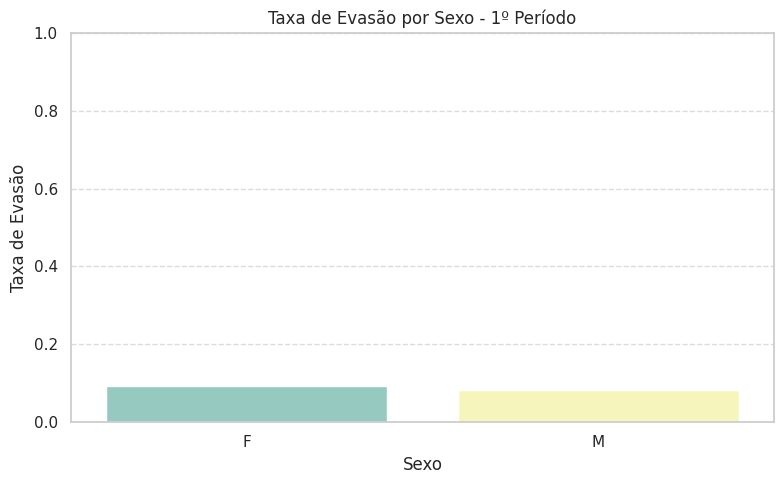

⚠️ Variável cota NÃO encontrada na tabela.

🟨 Tabela - Estado_civil:
              Contagem  Proporção  Taxa de Evasão
estado_civil                                     
Casado              58   0.025439        0.241379
Divorciado           3   0.001316        0.000000
Nan                  7   0.003070        0.857143
Solteiro          2212   0.970175        0.079114


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


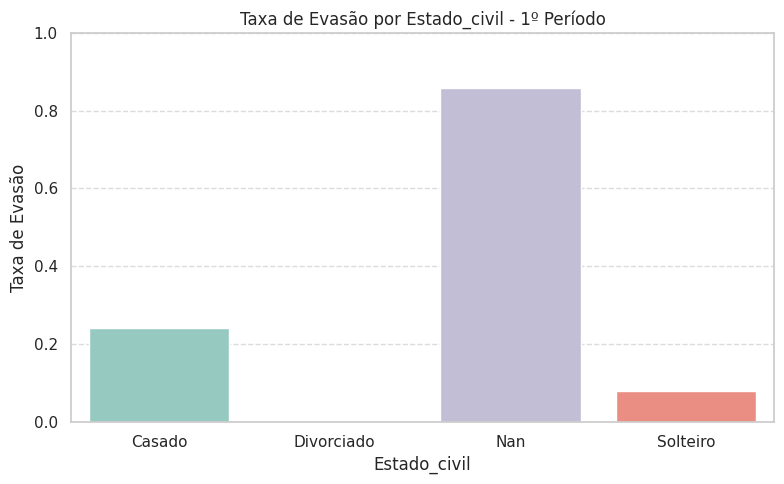


🟨 Tabela - Cor:
          Contagem  Proporção  Taxa de Evasão
cor                                          
Amarela         51   0.022368        0.156863
Branca        1157   0.507456        0.069144
Indígena         4   0.001754        0.000000
Nan             28   0.012281        0.428571
Parda          932   0.408772        0.086910
Preta          108   0.047368        0.129630


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


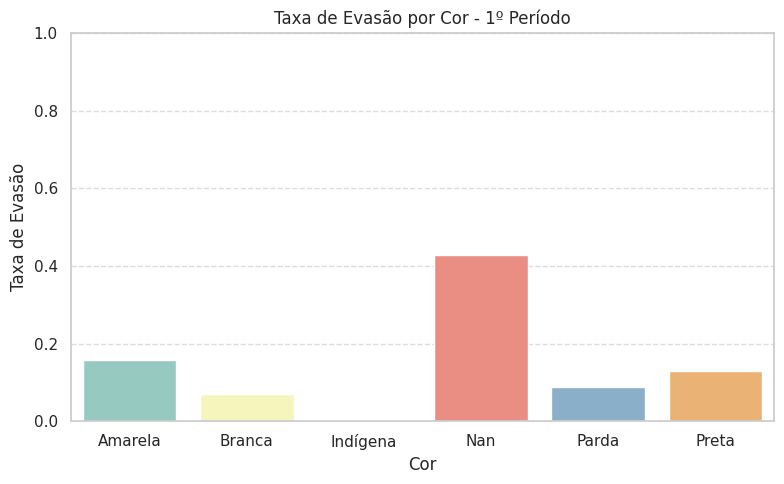


📘 Idade - Média: 27.76, Desvio Padrão: 5.12


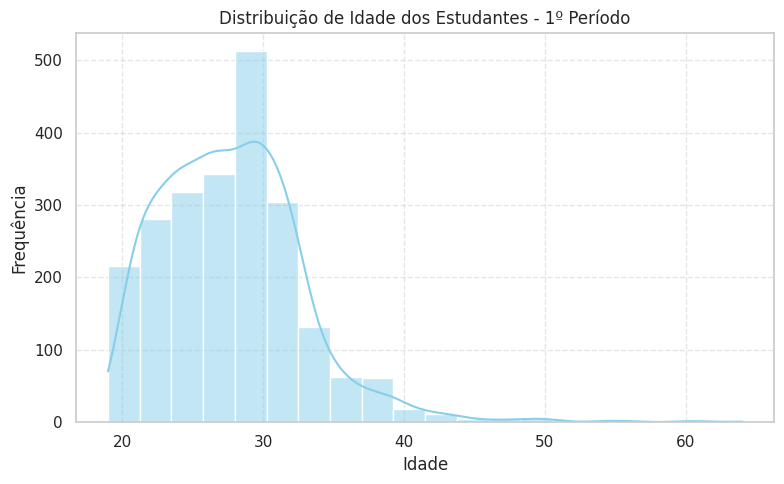

/tmp/ipykernel_400871/1779100587.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=evasao_col, y='idade', data=df, palette='Pastel1')


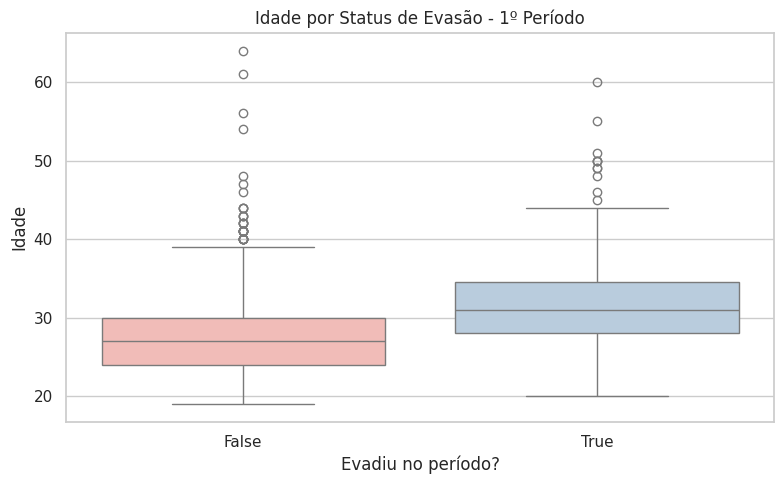

/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')



--- Análise das variáveis no 2º período ---

🟨 Tabela - Sexo:
      Contagem  Proporção  Taxa de Evasão
sexo                                     
F          399      0.175        0.055138
M         1881      0.825        0.062733


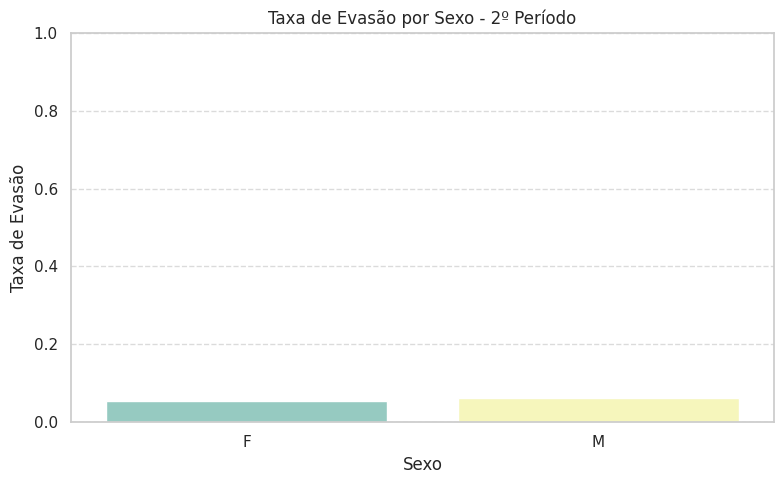

⚠️ Variável cota NÃO encontrada na tabela.

🟨 Tabela - Estado_civil:
              Contagem  Proporção  Taxa de Evasão
estado_civil                                     
Casado              58   0.025439        0.120690
Divorciado           3   0.001316        0.000000
Nan                  7   0.003070        0.000000
Solteiro          2212   0.970175        0.060127


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


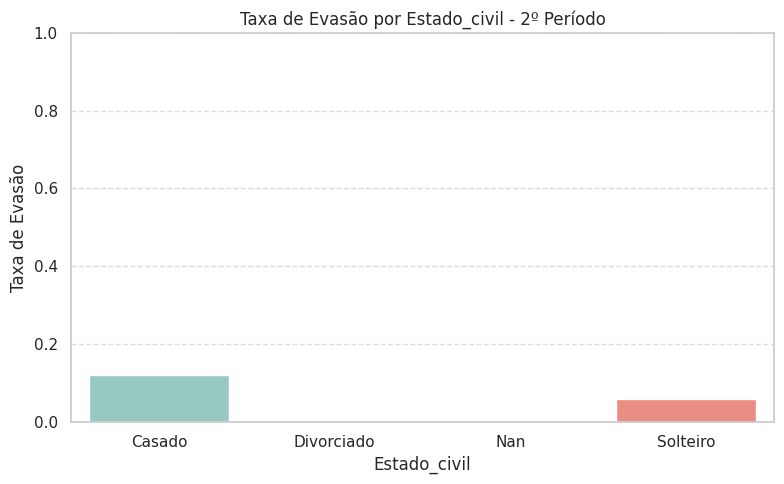


🟨 Tabela - Cor:
          Contagem  Proporção  Taxa de Evasão
cor                                          
Amarela         51   0.022368        0.019608
Branca        1157   0.507456        0.059637
Indígena         4   0.001754        0.000000
Nan             28   0.012281        0.071429
Parda          932   0.408772        0.056867
Preta          108   0.047368        0.138889


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


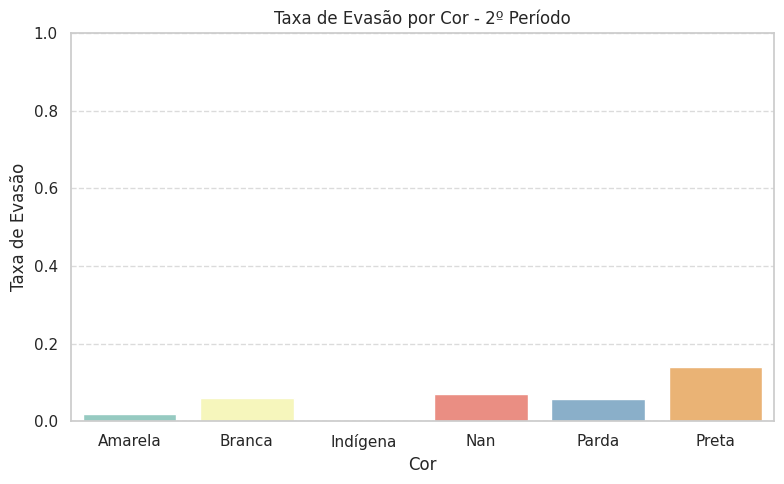


📘 Idade - Média: 27.76, Desvio Padrão: 5.12


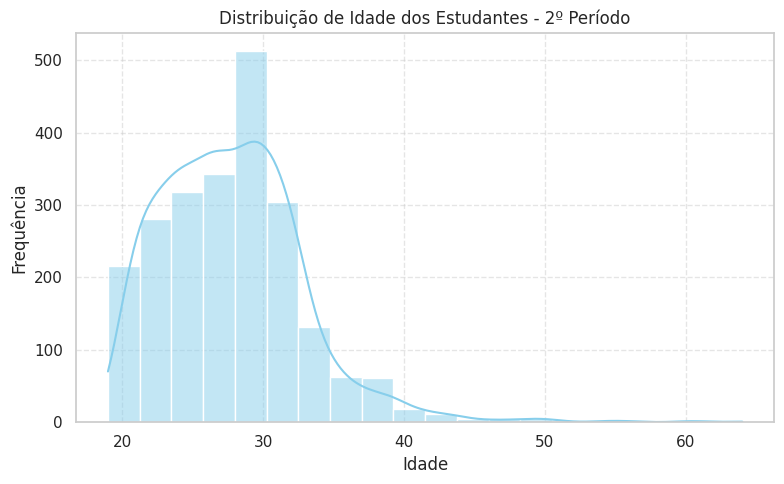

/tmp/ipykernel_400871/1779100587.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=evasao_col, y='idade', data=df, palette='Pastel1')


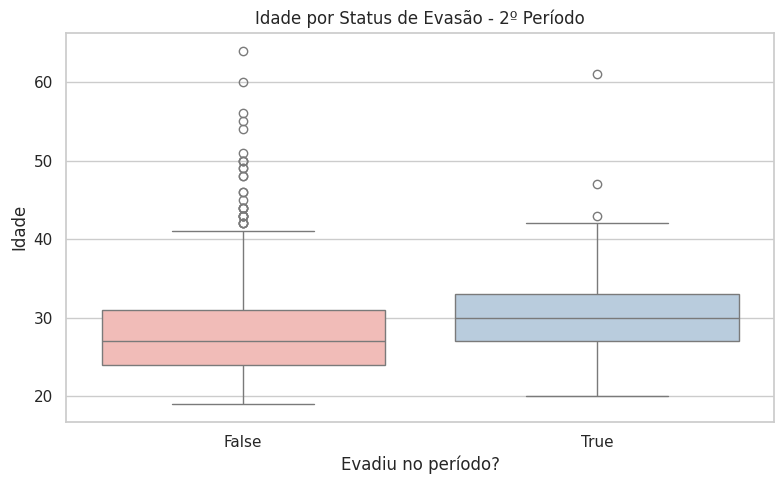

/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')



--- Análise das variáveis no 3º período ---

🟨 Tabela - Sexo:
      Contagem  Proporção  Taxa de Evasão
sexo                                     
F          399      0.175        0.045113
M         1881      0.825        0.058480


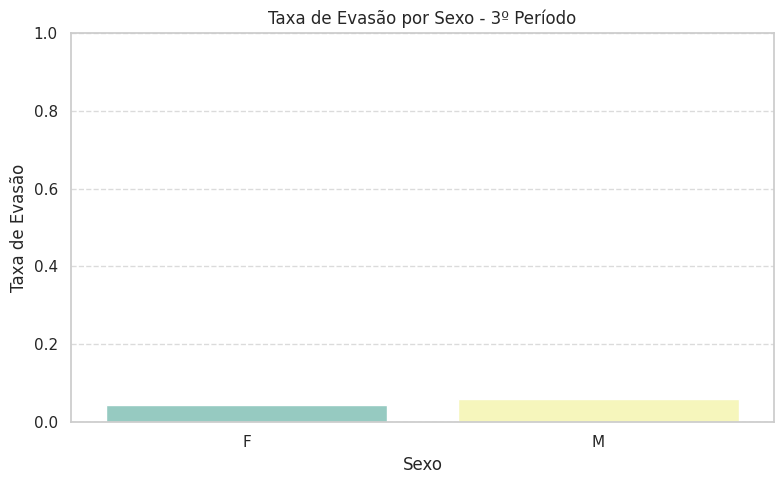

⚠️ Variável cota NÃO encontrada na tabela.

🟨 Tabela - Estado_civil:
              Contagem  Proporção  Taxa de Evasão
estado_civil                                     
Casado              58   0.025439        0.051724
Divorciado           3   0.001316        0.666667
Nan                  7   0.003070        0.000000
Solteiro          2212   0.970175        0.055606


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


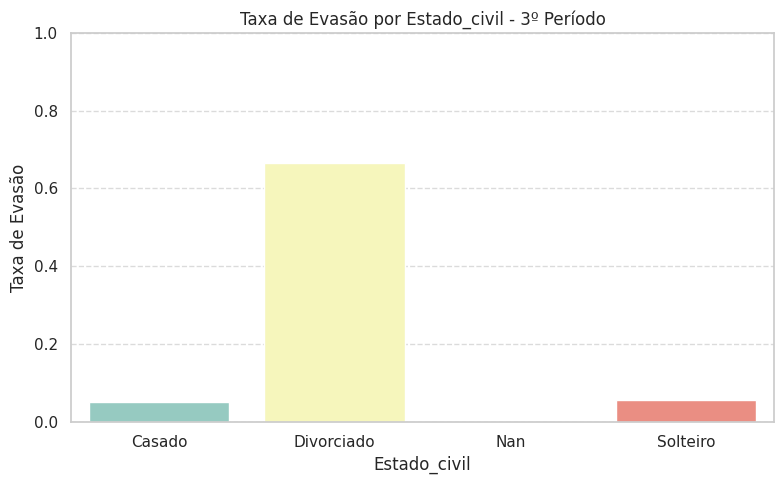


🟨 Tabela - Cor:
          Contagem  Proporção  Taxa de Evasão
cor                                          
Amarela         51   0.022368        0.078431
Branca        1157   0.507456        0.056180
Indígena         4   0.001754        0.500000
Nan             28   0.012281        0.035714
Parda          932   0.408772        0.054721
Preta          108   0.047368        0.046296


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


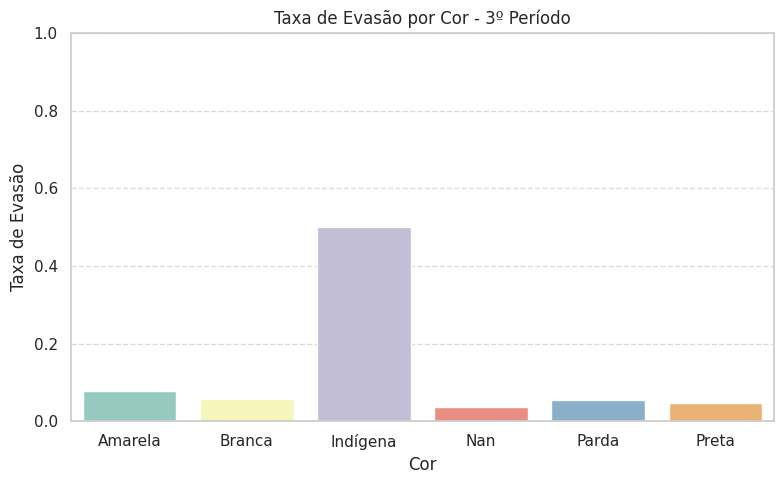


📘 Idade - Média: 27.76, Desvio Padrão: 5.12


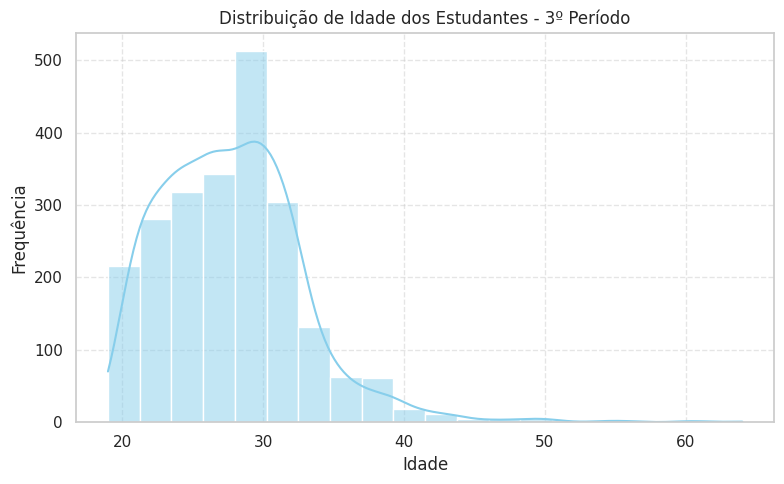

/tmp/ipykernel_400871/1779100587.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=evasao_col, y='idade', data=df, palette='Pastel1')


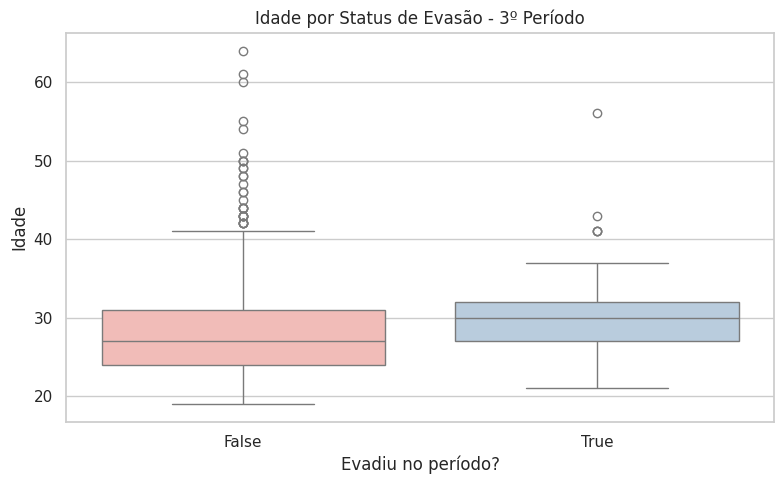

/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')



--- Análise das variáveis no 4º período ---

🟨 Tabela - Sexo:
      Contagem  Proporção  Taxa de Evasão
sexo                                     
F          399      0.175        0.057644
M         1881      0.825        0.071770


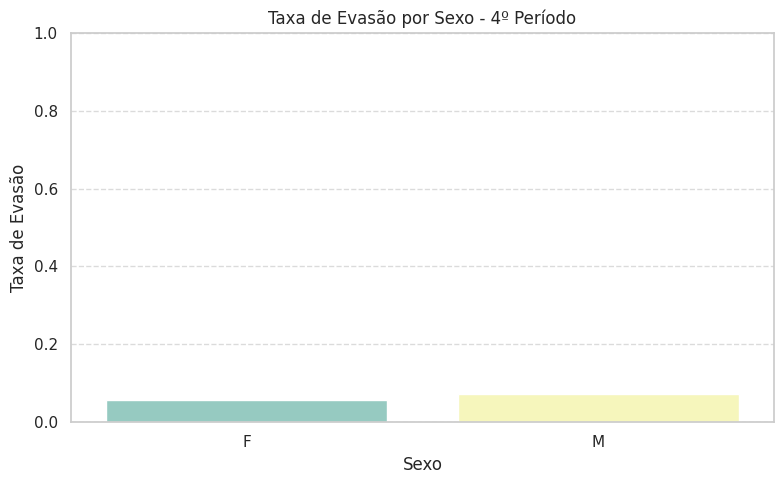

⚠️ Variável cota NÃO encontrada na tabela.

🟨 Tabela - Estado_civil:
              Contagem  Proporção  Taxa de Evasão
estado_civil                                     
Casado              58   0.025439        0.051724
Divorciado           3   0.001316        0.000000
Nan                  7   0.003070        0.000000
Solteiro          2212   0.970175        0.070072


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


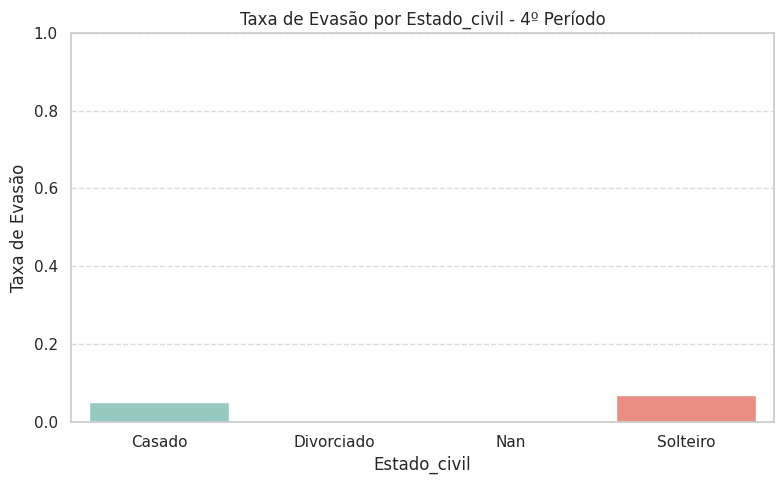


🟨 Tabela - Cor:
          Contagem  Proporção  Taxa de Evasão
cor                                          
Amarela         51   0.022368        0.117647
Branca        1157   0.507456        0.067416
Indígena         4   0.001754        0.000000
Nan             28   0.012281        0.178571
Parda          932   0.408772        0.065451
Preta          108   0.047368        0.074074


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


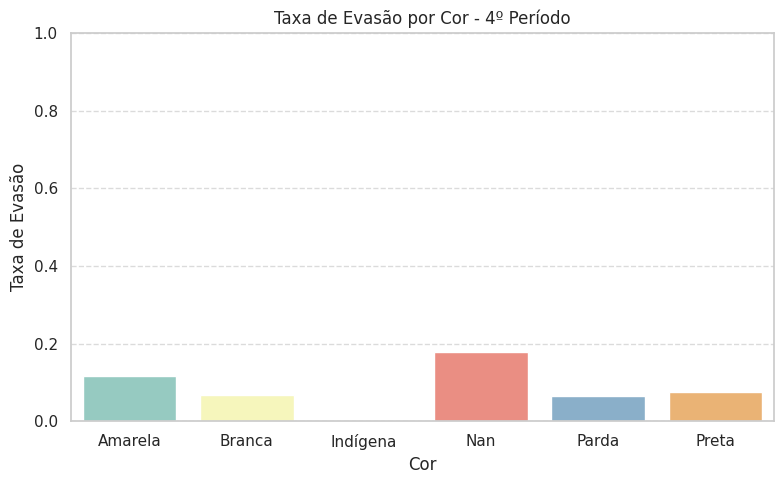


📘 Idade - Média: 27.76, Desvio Padrão: 5.12


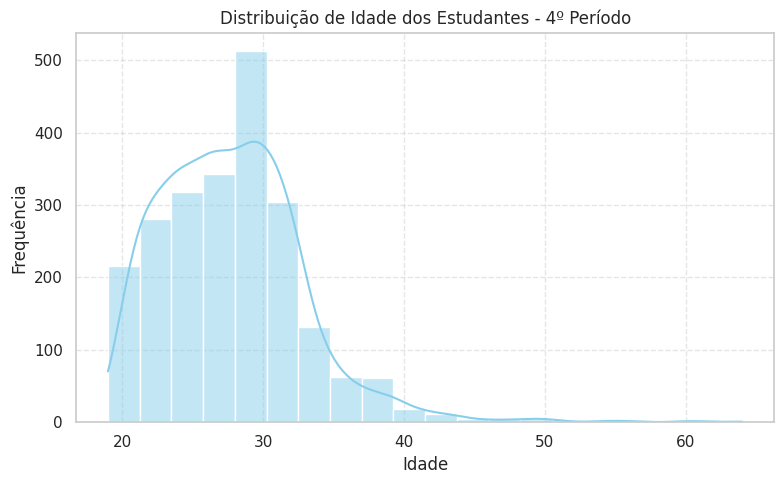

/tmp/ipykernel_400871/1779100587.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=evasao_col, y='idade', data=df, palette='Pastel1')


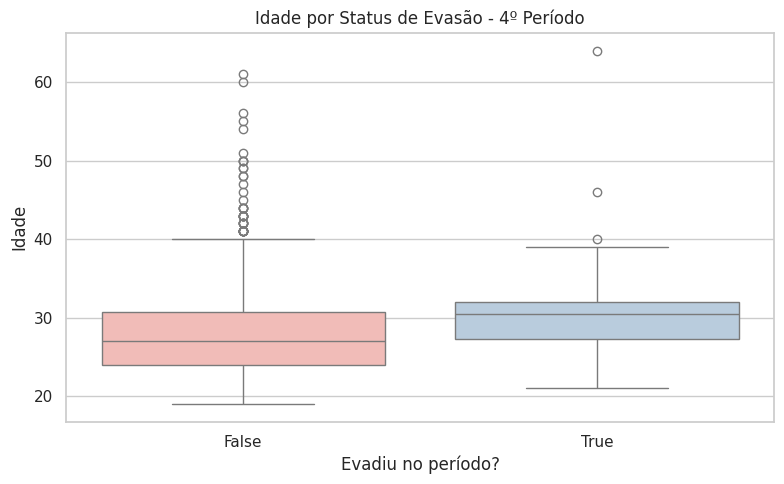

/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')



📘📘📘 TABELA: ALUNOS 📘📘📘

--- Análise das variáveis no 1º período ---

🟨 Tabela - Sexo:
      Contagem  Proporção  Taxa de Evasão
sexo                                     
F          230   0.175976        0.117391
M         1077   0.824024        0.089136


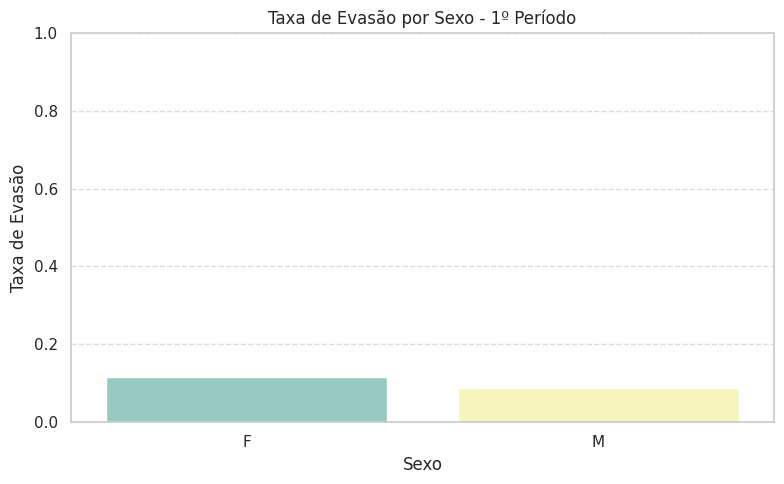

⚠️ Variável cota NÃO encontrada na tabela.

🟨 Tabela - Estado_civil:
              Contagem  Proporção  Taxa de Evasão
estado_civil                                     
Casado              42   0.032135        0.238095
Divorciado           2   0.001530        0.000000
Nan                 54   0.041316        0.055556
Solteiro          1208   0.924254        0.091060
Viúvo                1   0.000765        0.000000


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


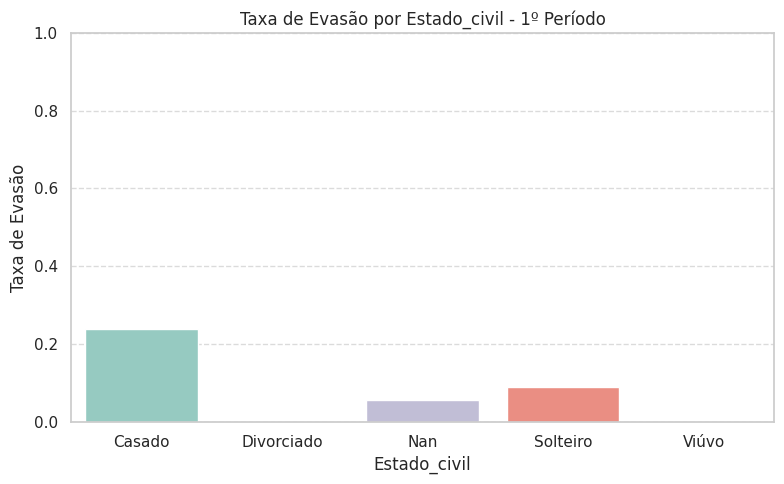


🟨 Tabela - Cor:
          Contagem  Proporção  Taxa de Evasão
cor                                          
Amarela         36   0.027544        0.194444
Branca         688   0.526396        0.072674
Indígena         4   0.003060        0.000000
Nan             74   0.056618        0.094595
Parda          445   0.340474        0.105618
Preta           60   0.045907        0.200000


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


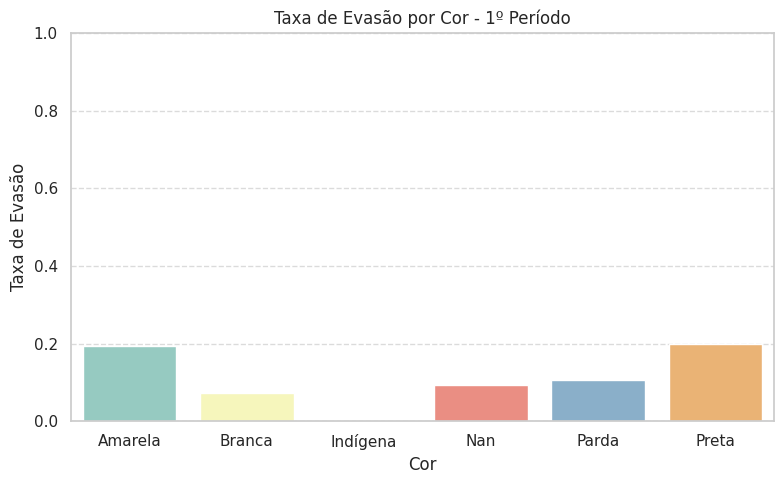


📘 Idade - Média: 30.05, Desvio Padrão: 5.54


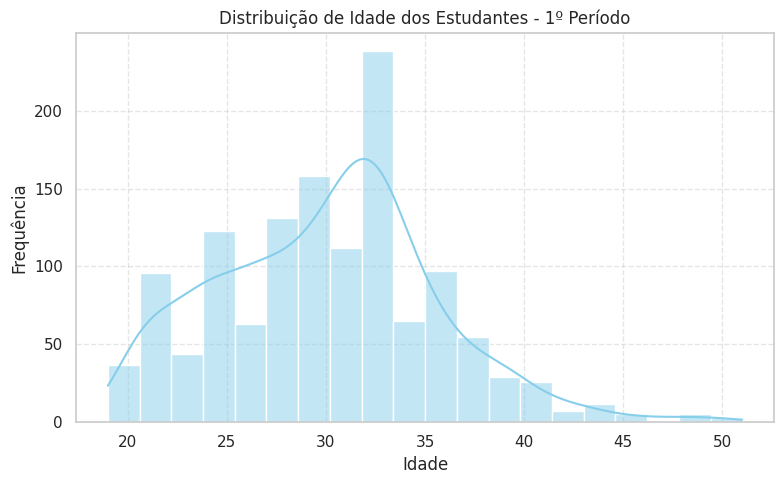

/tmp/ipykernel_400871/1779100587.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=evasao_col, y='idade', data=df, palette='Pastel1')


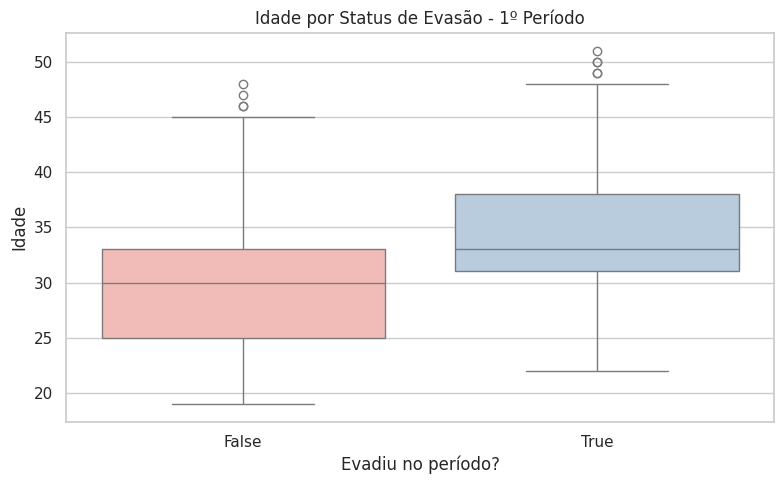

/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')



--- Análise das variáveis no 2º período ---

🟨 Tabela - Sexo:
      Contagem  Proporção  Taxa de Evasão
sexo                                     
F          230   0.175976        0.078261
M         1077   0.824024        0.076137


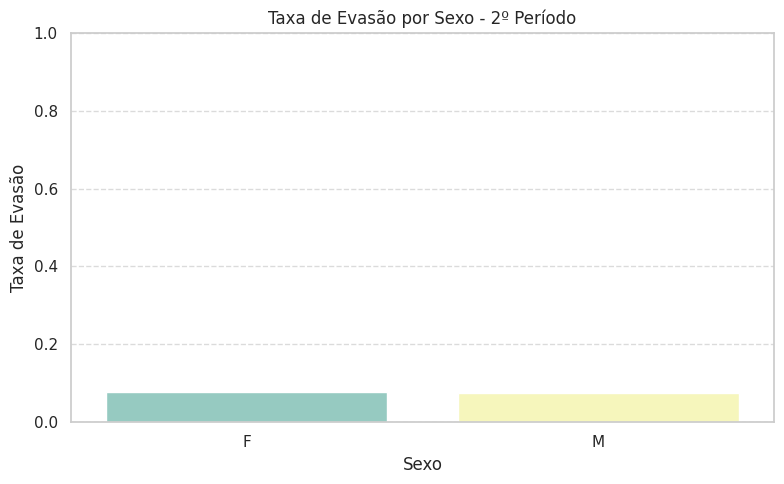

⚠️ Variável cota NÃO encontrada na tabela.

🟨 Tabela - Estado_civil:
              Contagem  Proporção  Taxa de Evasão
estado_civil                                     
Casado              42   0.032135        0.142857
Divorciado           2   0.001530        0.000000
Nan                 54   0.041316        0.000000
Solteiro          1208   0.924254        0.077815
Viúvo                1   0.000765        0.000000


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


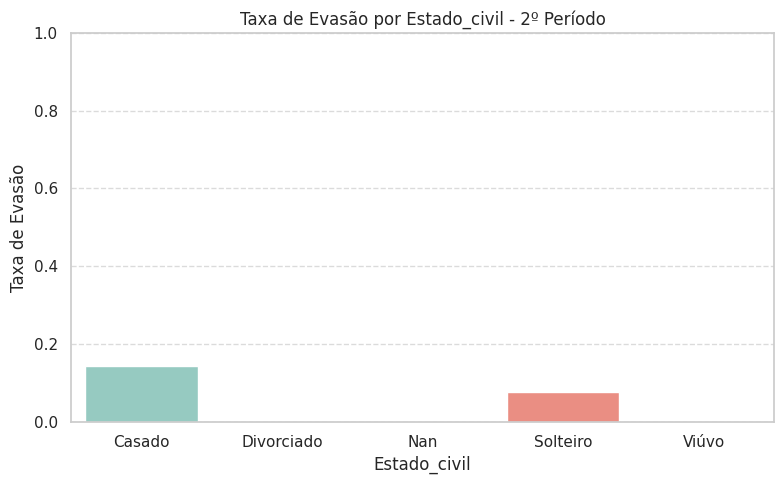


🟨 Tabela - Cor:
          Contagem  Proporção  Taxa de Evasão
cor                                          
Amarela         36   0.027544        0.000000
Branca         688   0.526396        0.063953
Indígena         4   0.003060        0.000000
Nan             74   0.056618        0.040541
Parda          445   0.340474        0.094382
Preta           60   0.045907        0.183333


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


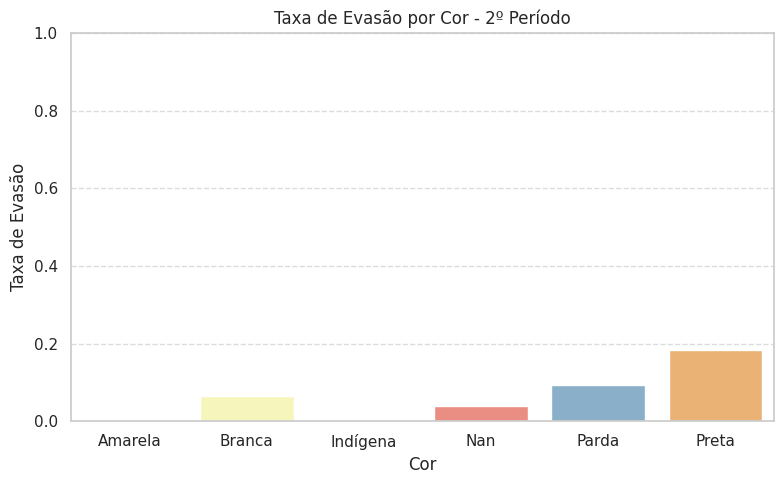


📘 Idade - Média: 30.05, Desvio Padrão: 5.54


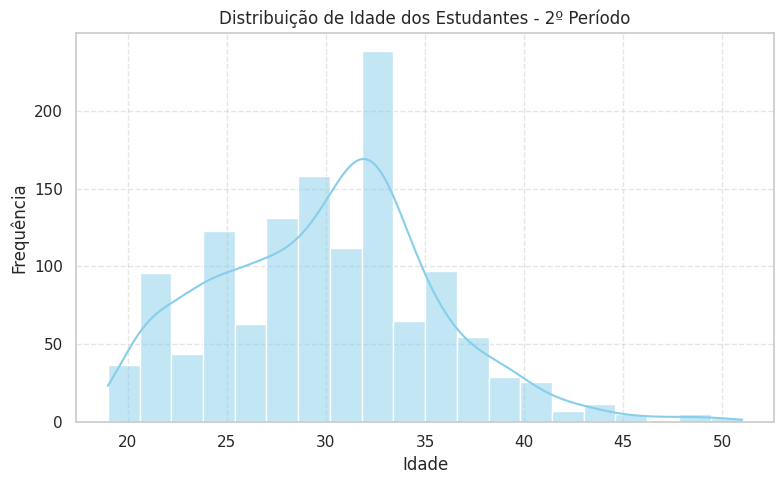

/tmp/ipykernel_400871/1779100587.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=evasao_col, y='idade', data=df, palette='Pastel1')


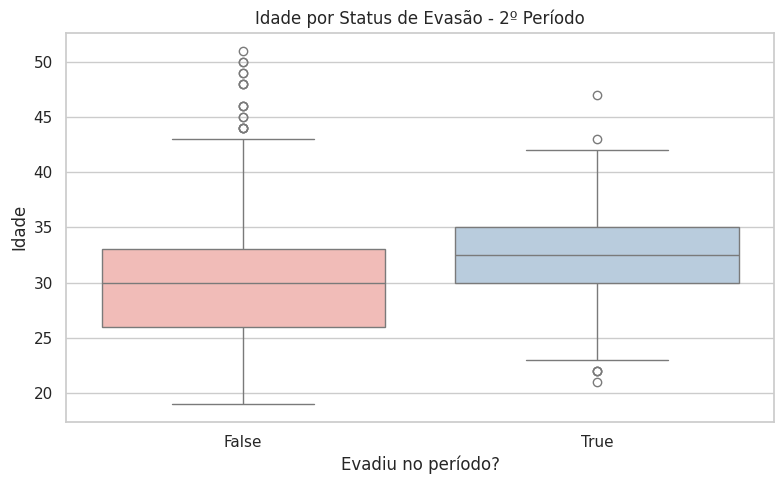

/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')



--- Análise das variáveis no 3º período ---

🟨 Tabela - Sexo:
      Contagem  Proporção  Taxa de Evasão
sexo                                     
F          230   0.175976        0.043478
M         1077   0.824024        0.073352


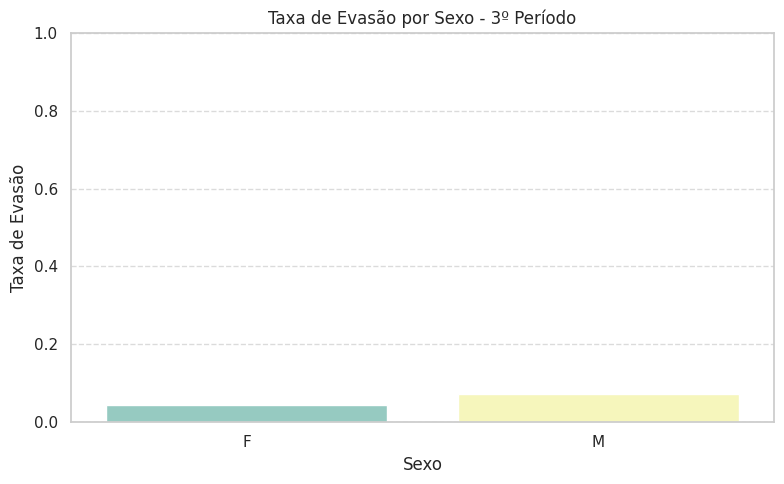

⚠️ Variável cota NÃO encontrada na tabela.

🟨 Tabela - Estado_civil:
              Contagem  Proporção  Taxa de Evasão
estado_civil                                     
Casado              42   0.032135        0.047619
Divorciado           2   0.001530        1.000000
Nan                 54   0.041316        0.000000
Solteiro          1208   0.924254        0.070364
Viúvo                1   0.000765        0.000000


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


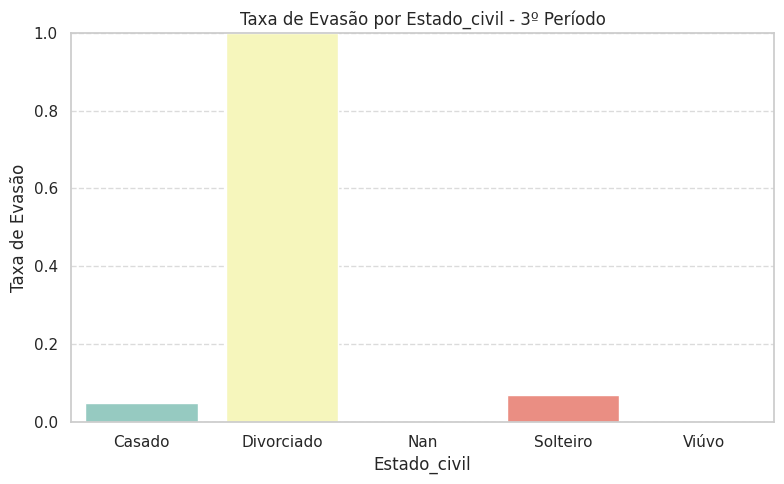


🟨 Tabela - Cor:
          Contagem  Proporção  Taxa de Evasão
cor                                          
Amarela         36   0.027544        0.166667
Branca         688   0.526396        0.065407
Indígena         4   0.003060        0.250000
Nan             74   0.056618        0.054054
Parda          445   0.340474        0.065169
Preta           60   0.045907        0.066667


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


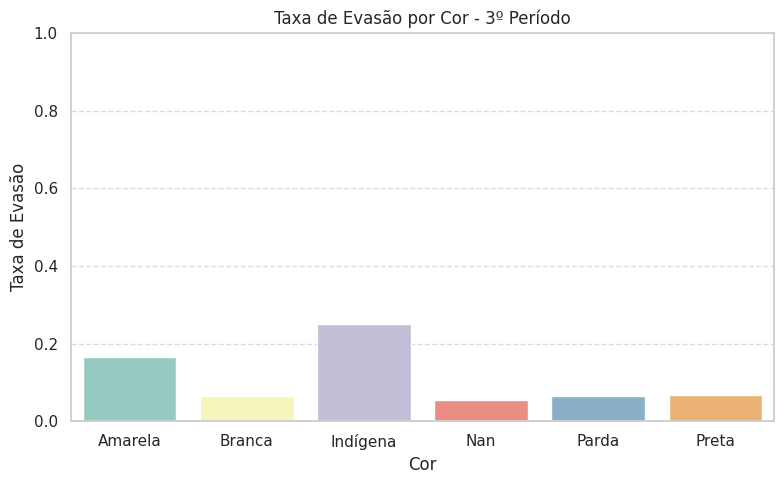


📘 Idade - Média: 30.05, Desvio Padrão: 5.54


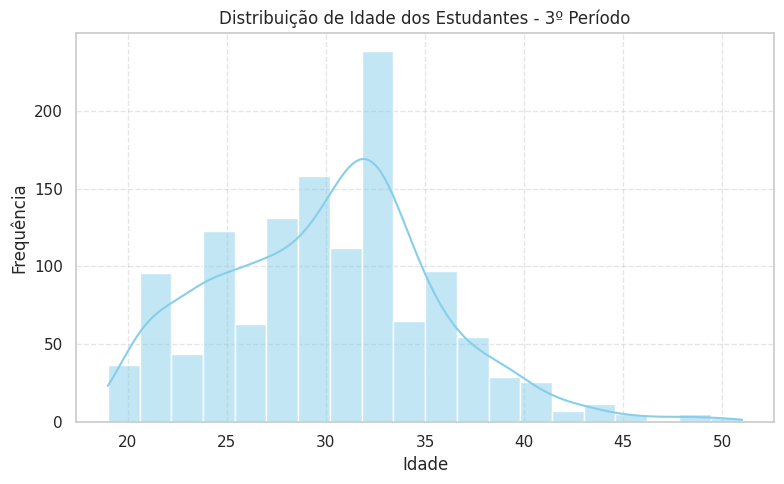

/tmp/ipykernel_400871/1779100587.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=evasao_col, y='idade', data=df, palette='Pastel1')


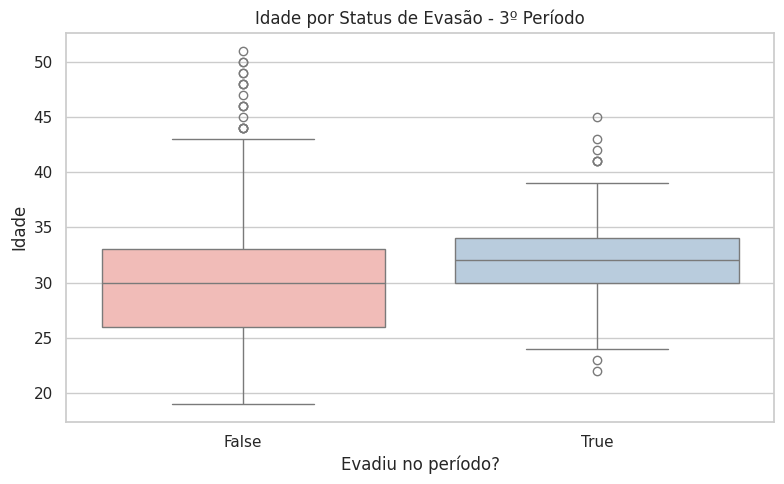

/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')



--- Análise das variáveis no 4º período ---

🟨 Tabela - Sexo:
      Contagem  Proporção  Taxa de Evasão
sexo                                     
F          230   0.175976        0.056522
M         1077   0.824024        0.091922


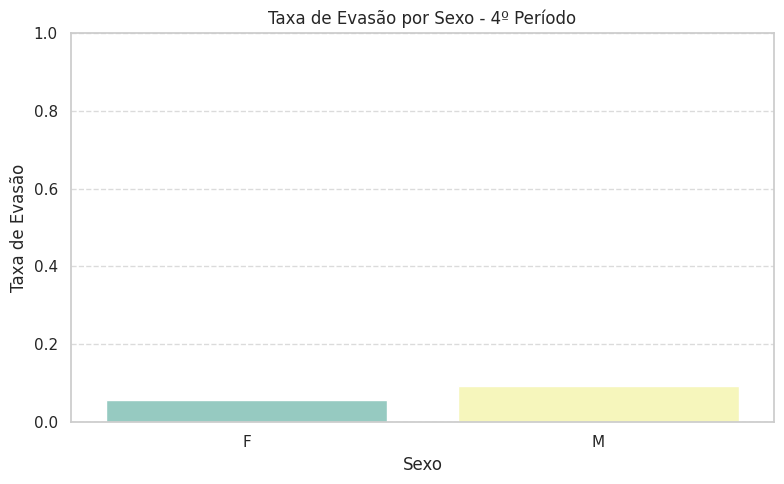

⚠️ Variável cota NÃO encontrada na tabela.

🟨 Tabela - Estado_civil:
              Contagem  Proporção  Taxa de Evasão
estado_civil                                     
Casado              42   0.032135        0.047619
Divorciado           2   0.001530        0.000000
Nan                 54   0.041316        0.000000
Solteiro          1208   0.924254        0.091060
Viúvo                1   0.000765        0.000000


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


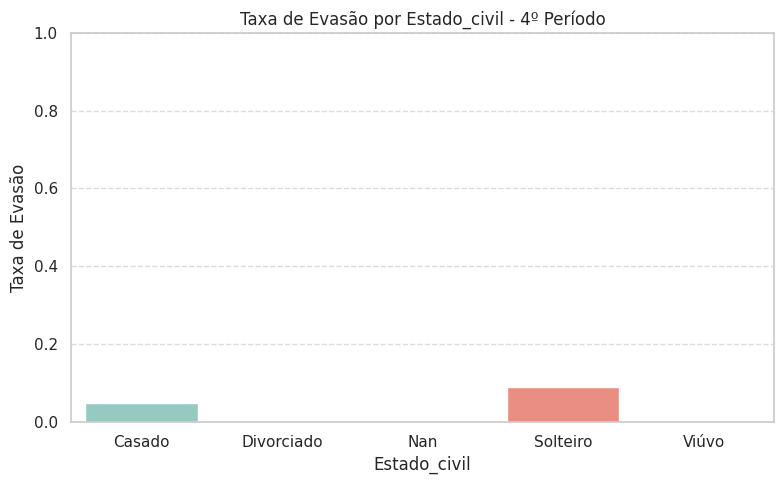


🟨 Tabela - Cor:
          Contagem  Proporção  Taxa de Evasão
cor                                          
Amarela         36   0.027544        0.111111
Branca         688   0.526396        0.091570
Indígena         4   0.003060        0.000000
Nan             74   0.056618        0.054054
Parda          445   0.340474        0.083146
Preta           60   0.045907        0.066667


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


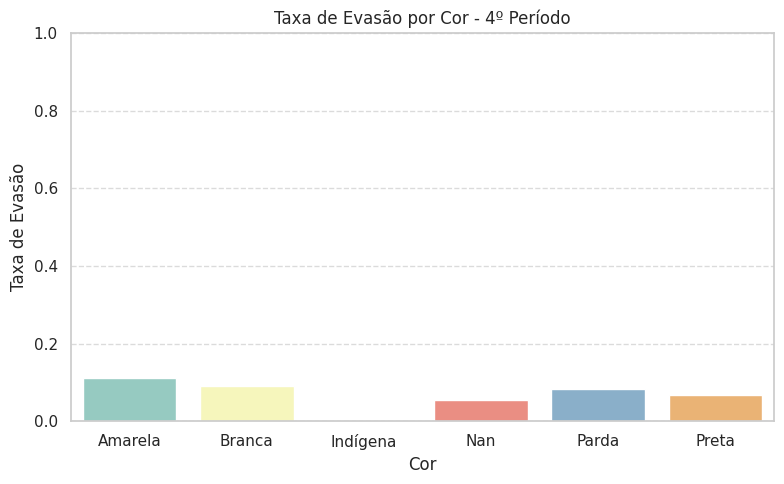


📘 Idade - Média: 30.05, Desvio Padrão: 5.54


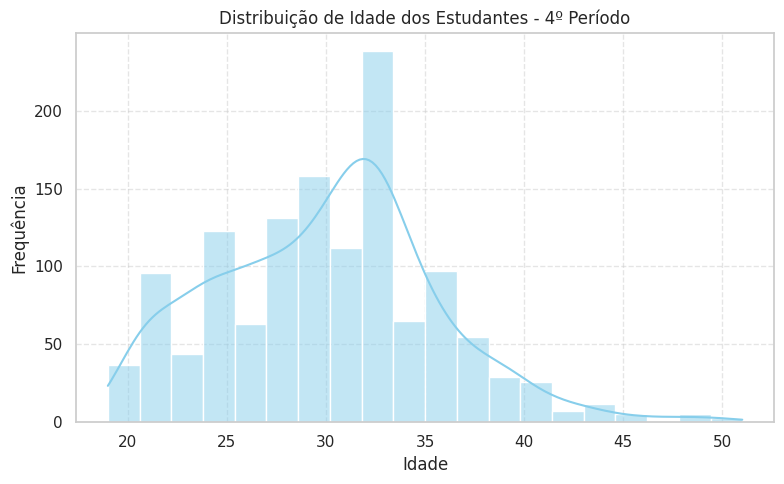

/tmp/ipykernel_400871/1779100587.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=evasao_col, y='idade', data=df, palette='Pastel1')


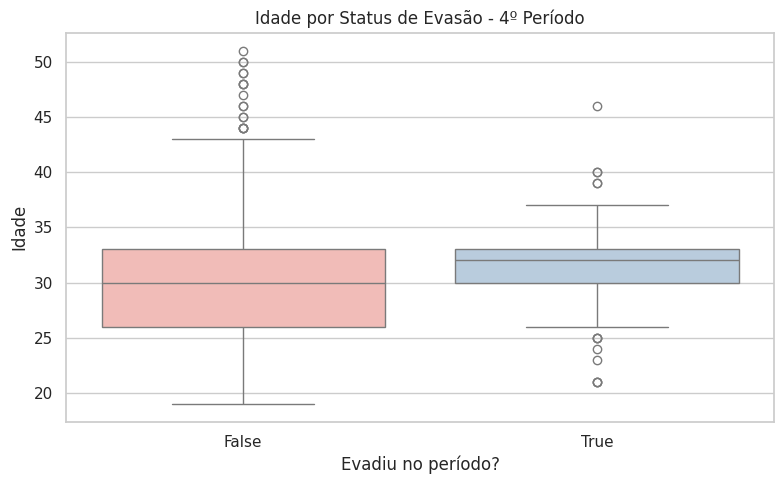

/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')



📘📘📘 TABELA: ALUNOS-MATRICULADOS 📘📘📘

--- Análise das variáveis no 1º período ---

🟨 Tabela - Sexo:
      Contagem  Proporção  Taxa de Evasão
sexo                                     
F          208   0.165605        0.129808
M         1048   0.834395        0.091603


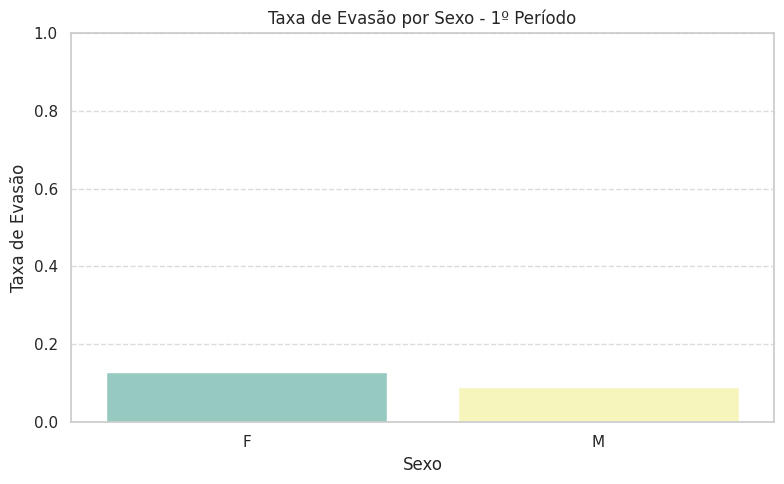

⚠️ Variável cota NÃO encontrada na tabela.

🟨 Tabela - Estado_civil:
              Contagem  Proporção  Taxa de Evasão
estado_civil                                     
Casado              41   0.032643        0.243902
Divorciado           2   0.001592        0.000000
Nan                  4   0.003185        0.750000
Solteiro          1208   0.961783        0.091060
Viúvo                1   0.000796        0.000000


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


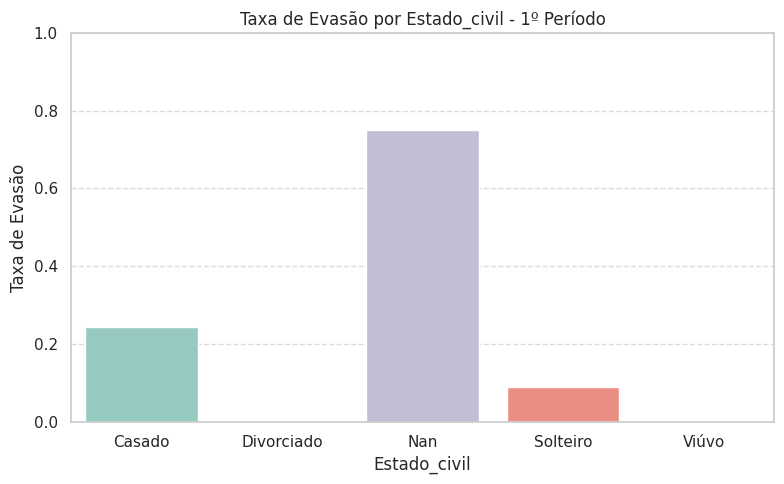


🟨 Tabela - Cor:
          Contagem  Proporção  Taxa de Evasão
cor                                          
Amarela         36   0.028662        0.194444
Branca         688   0.547771        0.072674
Indígena         4   0.003185        0.000000
Nan             24   0.019108        0.291667
Parda          444   0.353503        0.105856
Preta           60   0.047771        0.200000


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


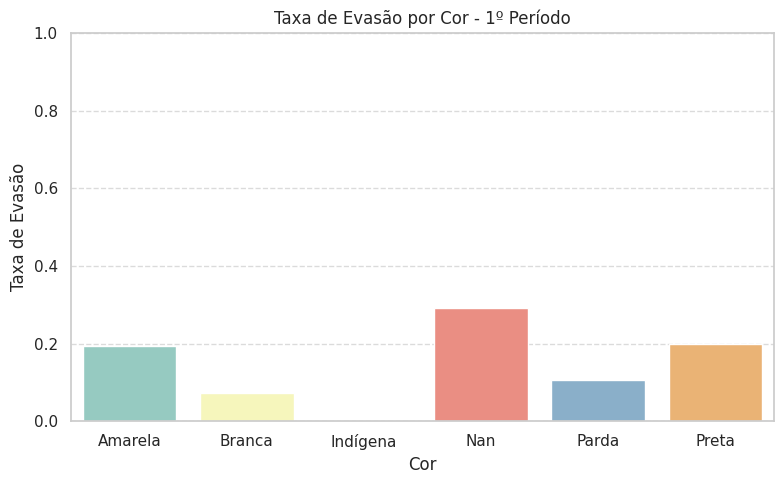


📘 Idade - Média: 30.30, Desvio Padrão: 5.41


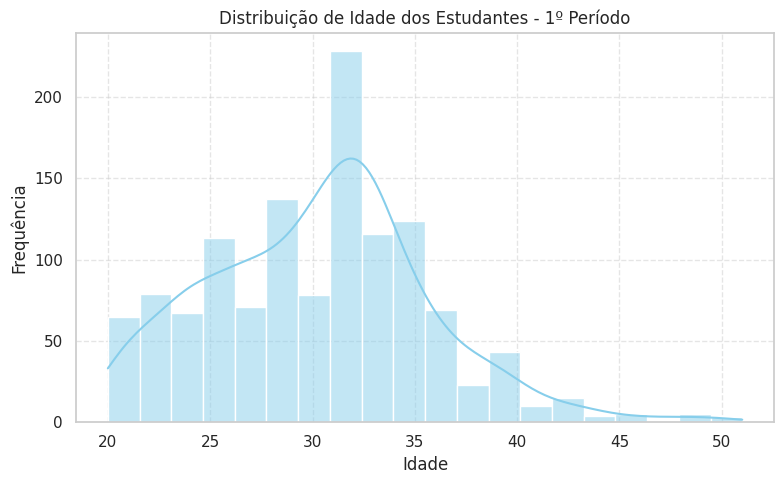

/tmp/ipykernel_400871/1779100587.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=evasao_col, y='idade', data=df, palette='Pastel1')


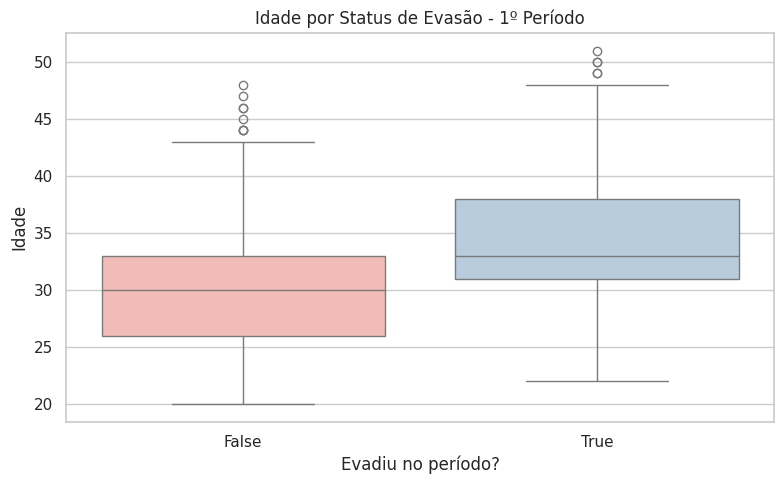

/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')



--- Análise das variáveis no 2º período ---

🟨 Tabela - Sexo:
      Contagem  Proporção  Taxa de Evasão
sexo                                     
F          208   0.165605        0.086538
M         1048   0.834395        0.078244


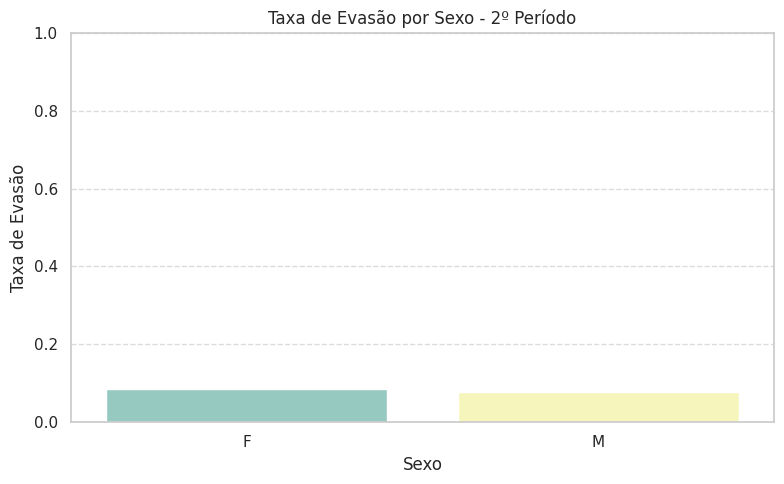

⚠️ Variável cota NÃO encontrada na tabela.

🟨 Tabela - Estado_civil:
              Contagem  Proporção  Taxa de Evasão
estado_civil                                     
Casado              41   0.032643        0.146341
Divorciado           2   0.001592        0.000000
Nan                  4   0.003185        0.000000
Solteiro          1208   0.961783        0.077815
Viúvo                1   0.000796        0.000000


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


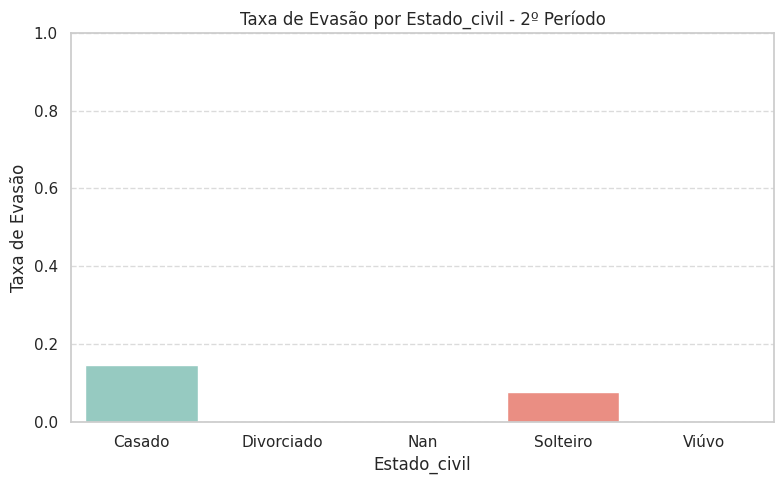


🟨 Tabela - Cor:
          Contagem  Proporção  Taxa de Evasão
cor                                          
Amarela         36   0.028662        0.000000
Branca         688   0.547771        0.063953
Indígena         4   0.003185        0.000000
Nan             24   0.019108        0.125000
Parda          444   0.353503        0.094595
Preta           60   0.047771        0.183333


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


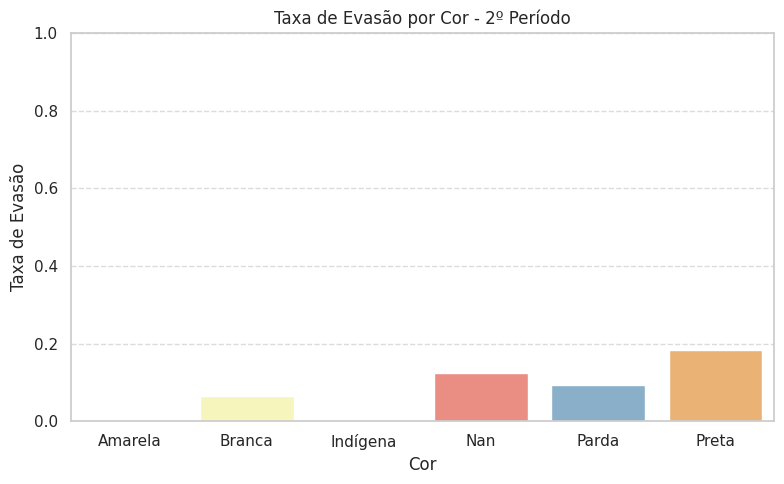


📘 Idade - Média: 30.30, Desvio Padrão: 5.41


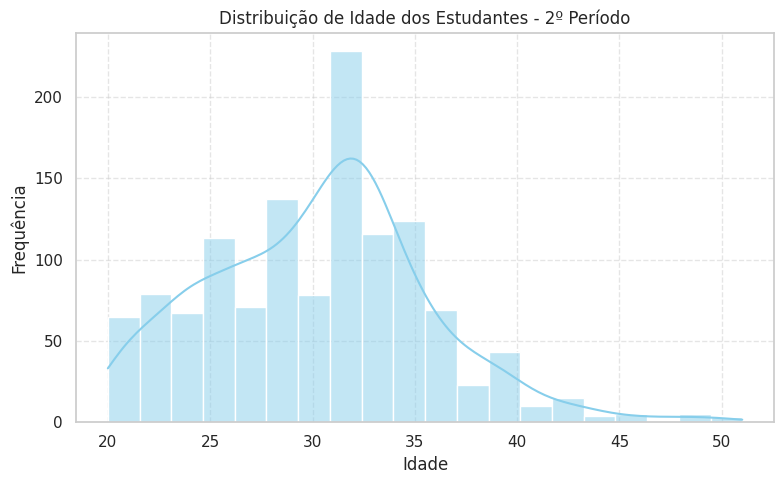

/tmp/ipykernel_400871/1779100587.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=evasao_col, y='idade', data=df, palette='Pastel1')


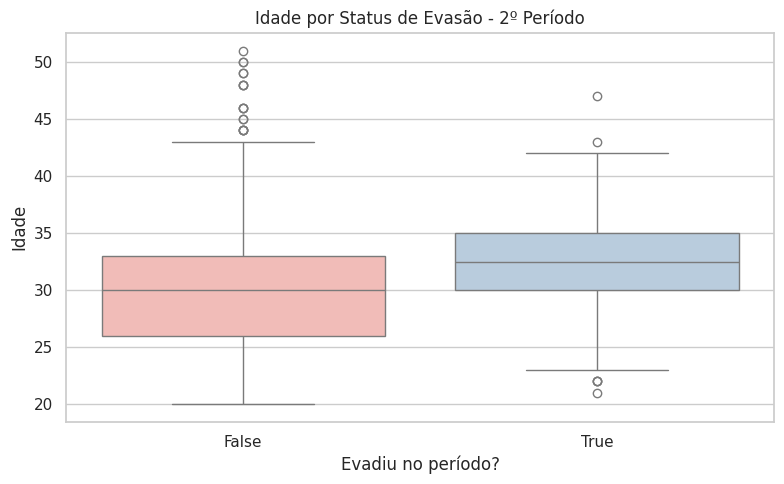

/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')



--- Análise das variáveis no 3º período ---

🟨 Tabela - Sexo:
      Contagem  Proporção  Taxa de Evasão
sexo                                     
F          208   0.165605        0.048077
M         1048   0.834395        0.075382


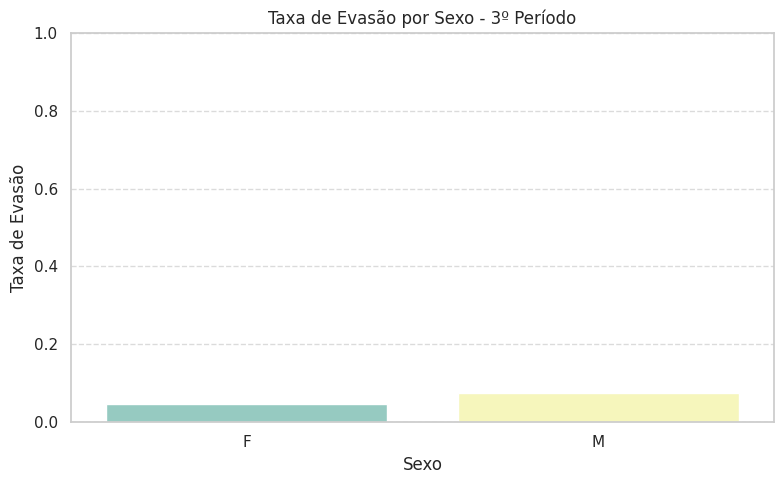

⚠️ Variável cota NÃO encontrada na tabela.

🟨 Tabela - Estado_civil:
              Contagem  Proporção  Taxa de Evasão
estado_civil                                     
Casado              41   0.032643        0.048780
Divorciado           2   0.001592        1.000000
Nan                  4   0.003185        0.000000
Solteiro          1208   0.961783        0.070364
Viúvo                1   0.000796        0.000000


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


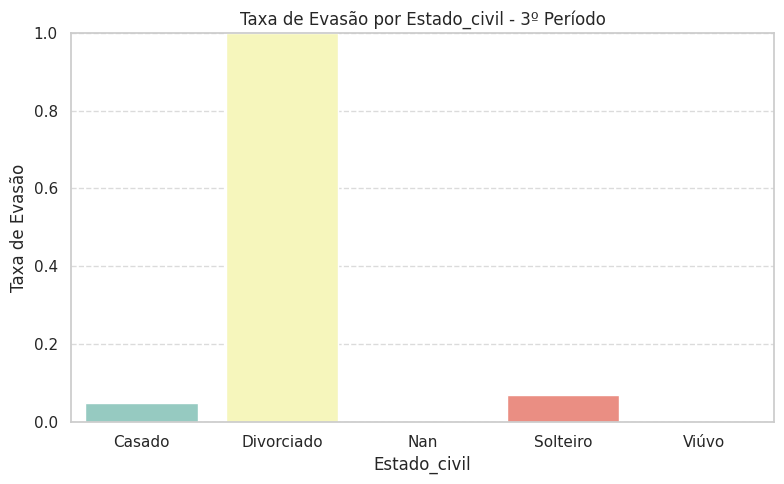


🟨 Tabela - Cor:
          Contagem  Proporção  Taxa de Evasão
cor                                          
Amarela         36   0.028662        0.166667
Branca         688   0.547771        0.065407
Indígena         4   0.003185        0.250000
Nan             24   0.019108        0.166667
Parda          444   0.353503        0.065315
Preta           60   0.047771        0.066667


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


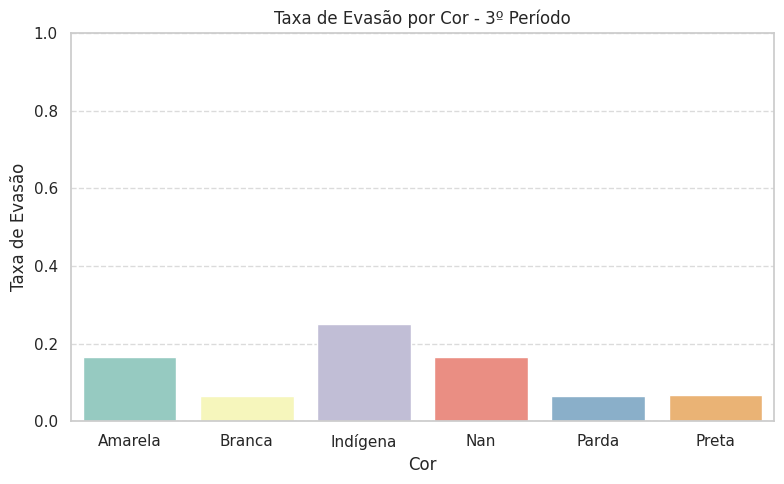


📘 Idade - Média: 30.30, Desvio Padrão: 5.41


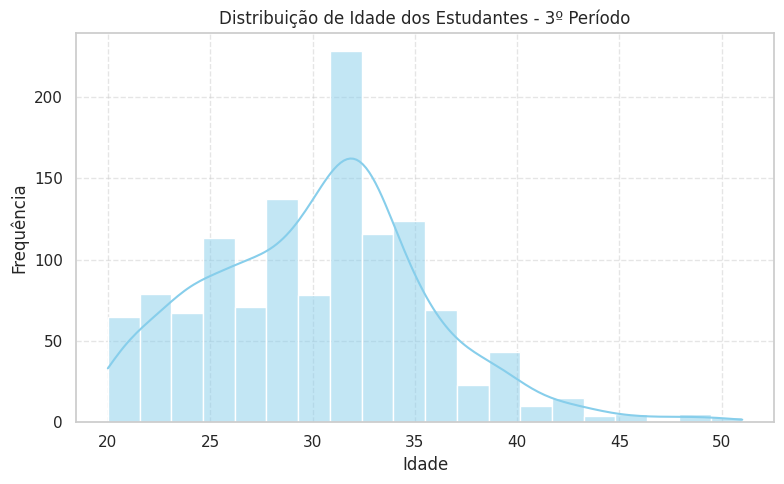

/tmp/ipykernel_400871/1779100587.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=evasao_col, y='idade', data=df, palette='Pastel1')


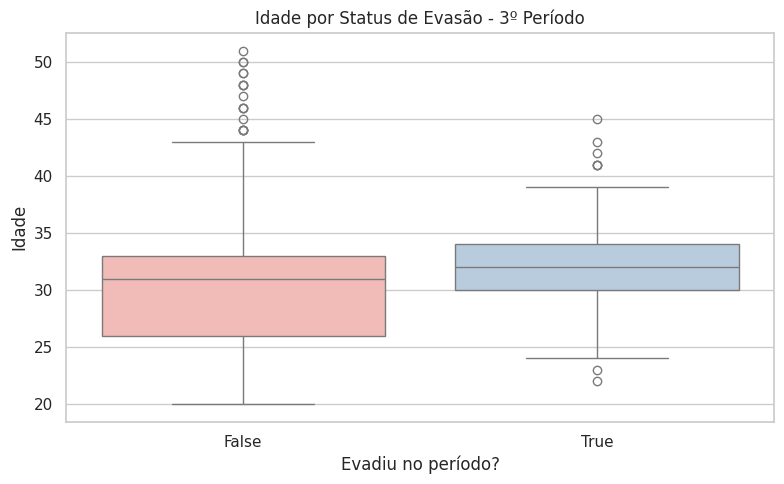

/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')



--- Análise das variáveis no 4º período ---

🟨 Tabela - Sexo:
      Contagem  Proporção  Taxa de Evasão
sexo                                     
F          208   0.165605        0.062500
M         1048   0.834395        0.094466


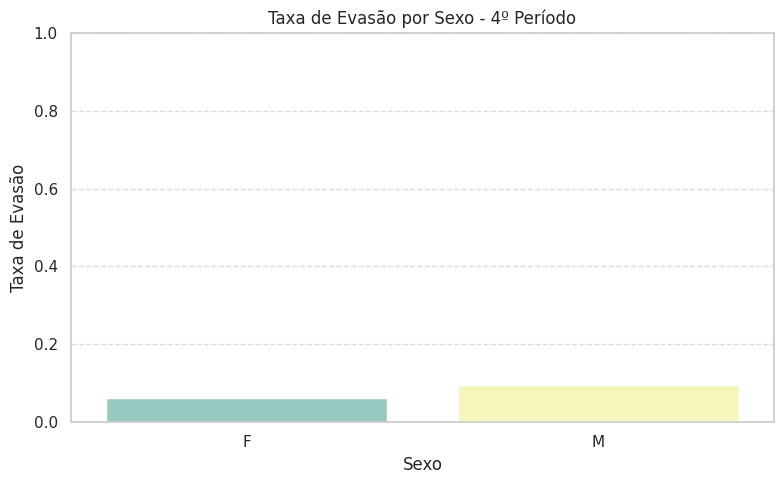

⚠️ Variável cota NÃO encontrada na tabela.

🟨 Tabela - Estado_civil:
              Contagem  Proporção  Taxa de Evasão
estado_civil                                     
Casado              41   0.032643         0.04878
Divorciado           2   0.001592         0.00000
Nan                  4   0.003185         0.00000
Solteiro          1208   0.961783         0.09106
Viúvo                1   0.000796         0.00000


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


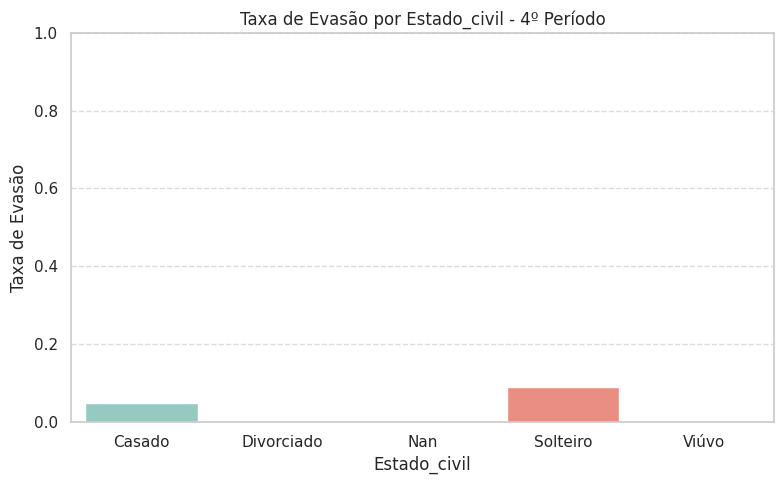


🟨 Tabela - Cor:
          Contagem  Proporção  Taxa de Evasão
cor                                          
Amarela         36   0.028662        0.111111
Branca         688   0.547771        0.091570
Indígena         4   0.003185        0.000000
Nan             24   0.019108        0.166667
Parda          444   0.353503        0.083333
Preta           60   0.047771        0.066667


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


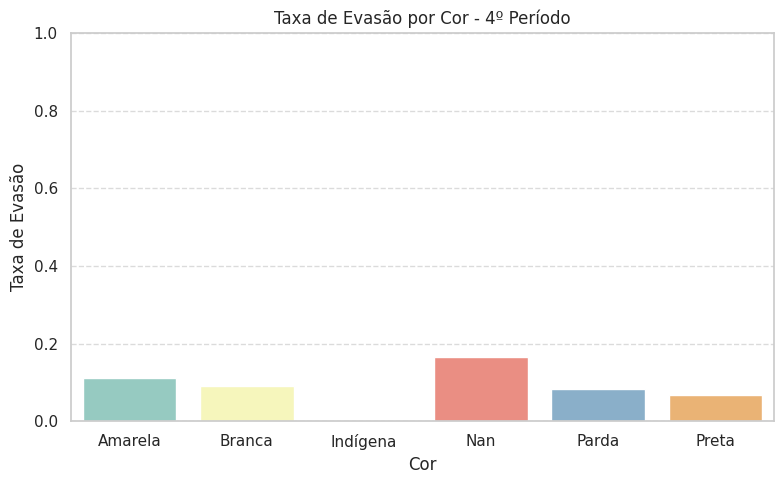


📘 Idade - Média: 30.30, Desvio Padrão: 5.41


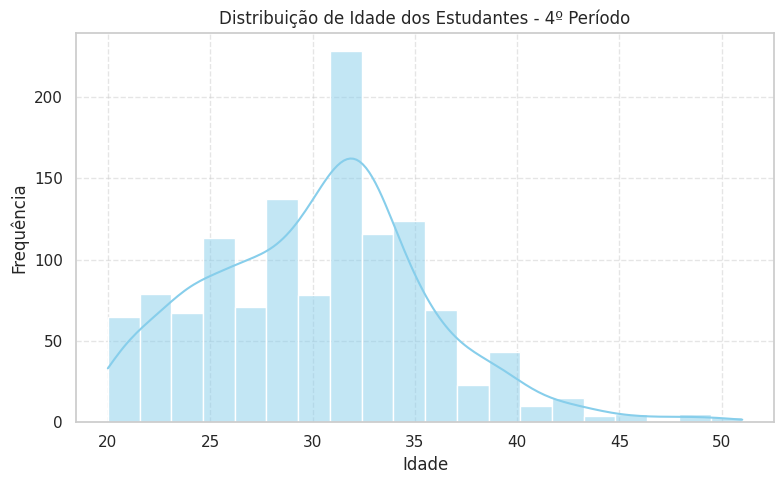

/tmp/ipykernel_400871/1779100587.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=evasao_col, y='idade', data=df, palette='Pastel1')


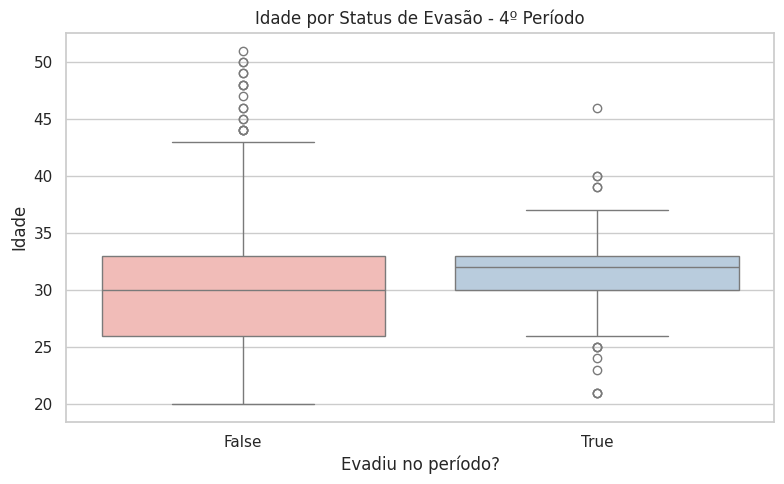

/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')



📘📘📘 TABELA: ALUNOS-FINAL 📘📘📘

--- Análise das variáveis no 1º período ---

🟨 Tabela - Sexo:
      Contagem  Proporção  Taxa de Evasão
sexo                                     
F          400   0.175362        0.090000
M         1881   0.824638        0.082403


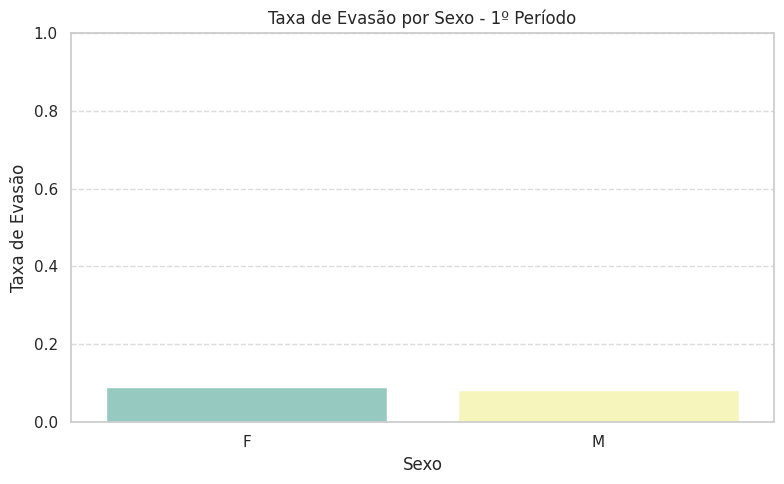

⚠️ Variável cota NÃO encontrada na tabela.

🟨 Tabela - Estado_civil:
              Contagem  Proporção  Taxa de Evasão
estado_civil                                     
Casado              59   0.025866        0.220339
Divorciado           3   0.001315        0.000000
Nan                  7   0.003069        0.857143
Solteiro          2212   0.969750        0.077758


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


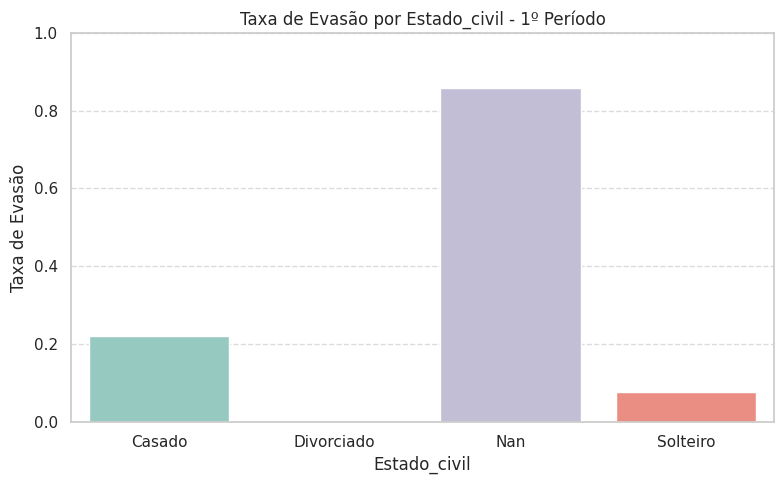


🟨 Tabela - Cor:
          Contagem  Proporção  Taxa de Evasão
cor                                          
Amarela         51   0.022359        0.156863
Branca        1158   0.507672        0.066494
Indígena         4   0.001754        0.000000
Nan             28   0.012275        0.428571
Parda          932   0.408593        0.085837
Preta          108   0.047348        0.129630


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


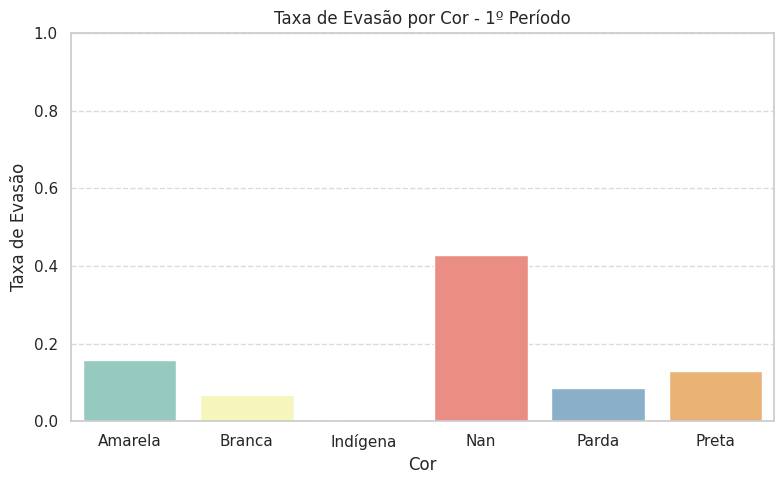

⚠️ Variável idade NÃO encontrada na tabela.

--- Análise das variáveis no 2º período ---

🟨 Tabela - Sexo:
      Contagem  Proporção  Taxa de Evasão
sexo                                     
F          400   0.175362         0.05000
M         1881   0.824638         0.05529


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


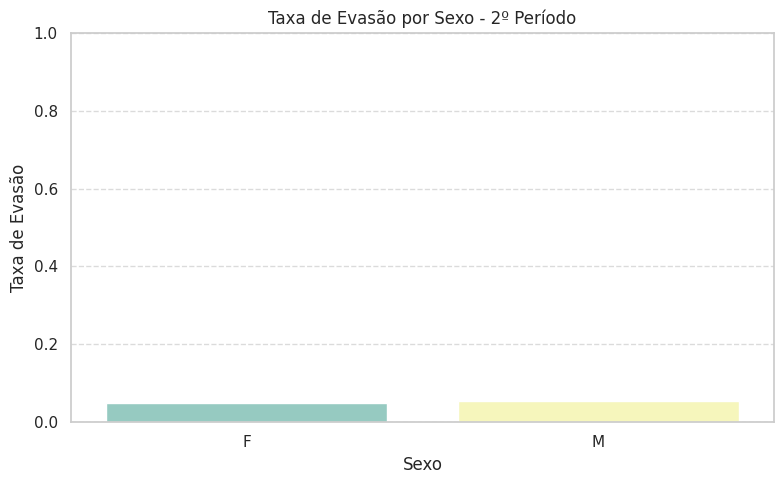

⚠️ Variável cota NÃO encontrada na tabela.

🟨 Tabela - Estado_civil:
              Contagem  Proporção  Taxa de Evasão
estado_civil                                     
Casado              59   0.025866        0.135593
Divorciado           3   0.001315        0.000000
Nan                  7   0.003069        0.000000
Solteiro          2212   0.969750        0.052441


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


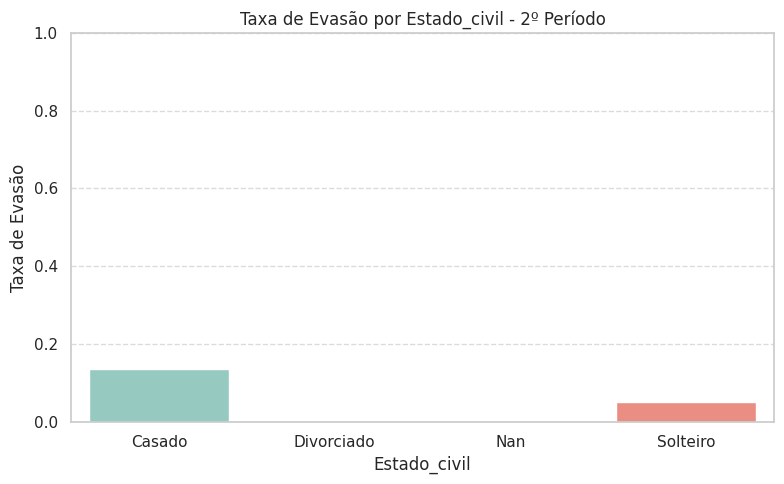


🟨 Tabela - Cor:
          Contagem  Proporção  Taxa de Evasão
cor                                          
Amarela         51   0.022359        0.019608
Branca        1158   0.507672        0.055268
Indígena         4   0.001754        0.000000
Nan             28   0.012275        0.071429
Parda          932   0.408593        0.046137
Preta          108   0.047348        0.129630


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


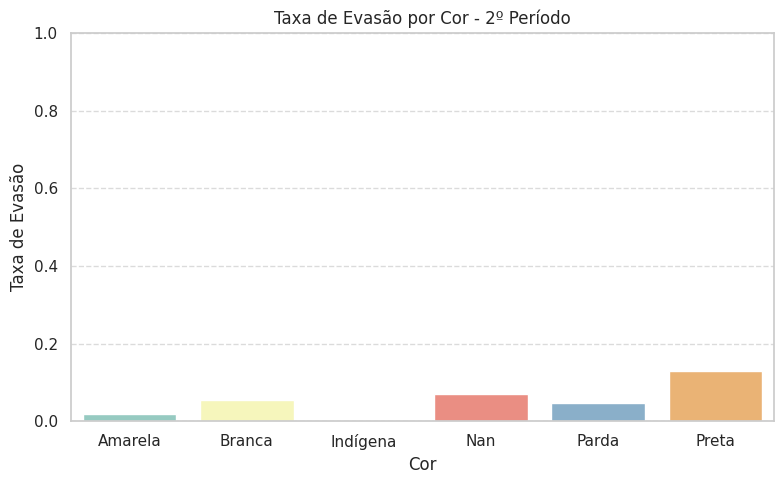

⚠️ Variável idade NÃO encontrada na tabela.

--- Análise das variáveis no 3º período ---

🟨 Tabela - Sexo:
      Contagem  Proporção  Taxa de Evasão
sexo                                     
F          400   0.175362          0.0450
M         1881   0.824638          0.0521


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


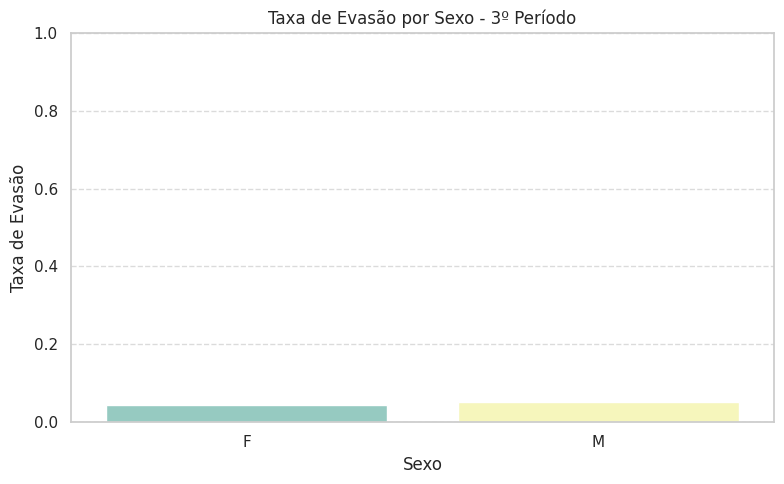

⚠️ Variável cota NÃO encontrada na tabela.

🟨 Tabela - Estado_civil:
              Contagem  Proporção  Taxa de Evasão
estado_civil                                     
Casado              59   0.025866        0.050847
Divorciado           3   0.001315        0.666667
Nan                  7   0.003069        0.000000
Solteiro          2212   0.969750        0.050181


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


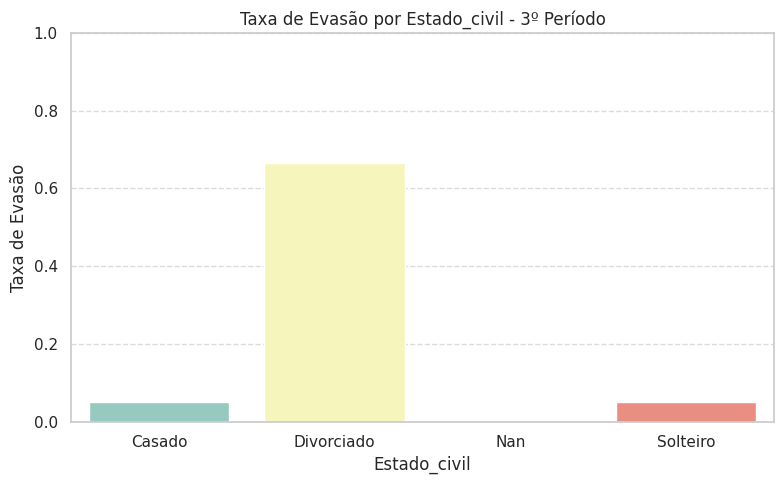


🟨 Tabela - Cor:
          Contagem  Proporção  Taxa de Evasão
cor                                          
Amarela         51   0.022359        0.039216
Branca        1158   0.507672        0.050950
Indígena         4   0.001754        0.500000
Nan             28   0.012275        0.035714
Parda          932   0.408593        0.051502
Preta          108   0.047348        0.037037


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


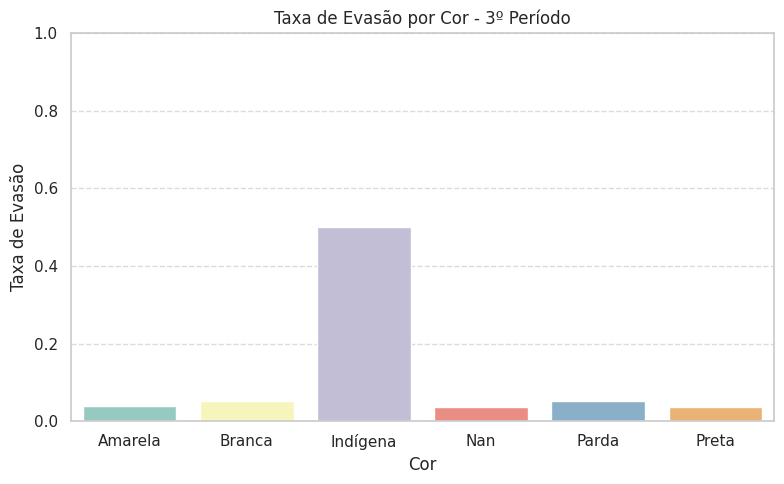

⚠️ Variável idade NÃO encontrada na tabela.

--- Análise das variáveis no 4º período ---

🟨 Tabela - Sexo:
      Contagem  Proporção  Taxa de Evasão
sexo                                     
F          400   0.175362        0.035000
M         1881   0.824638        0.057416


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


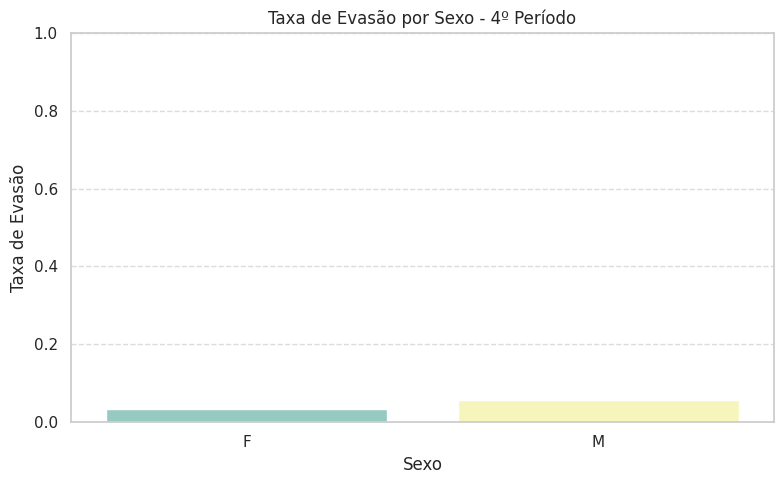

⚠️ Variável cota NÃO encontrada na tabela.

🟨 Tabela - Estado_civil:
              Contagem  Proporção  Taxa de Evasão
estado_civil                                     
Casado              59   0.025866        0.050847
Divorciado           3   0.001315        0.000000
Nan                  7   0.003069        0.000000
Solteiro          2212   0.969750        0.053797


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


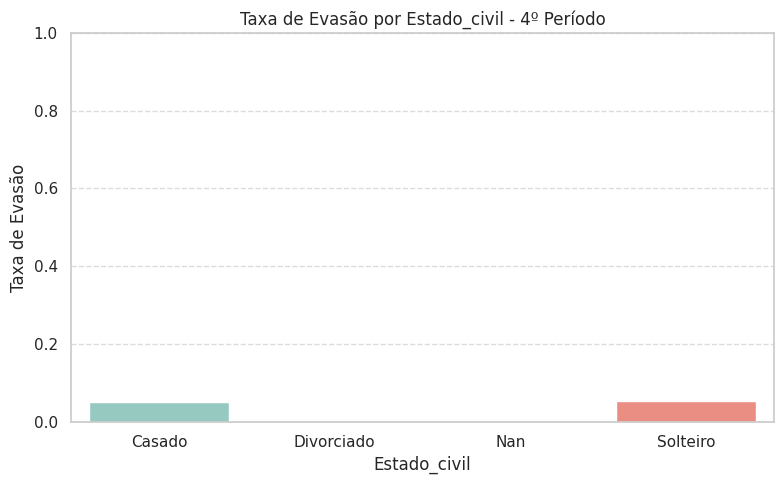


🟨 Tabela - Cor:
          Contagem  Proporção  Taxa de Evasão
cor                                          
Amarela         51   0.022359        0.098039
Branca        1158   0.507672        0.050086
Indígena         4   0.001754        0.000000
Nan             28   0.012275        0.142857
Parda          932   0.408593        0.052575
Preta          108   0.047348        0.055556


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


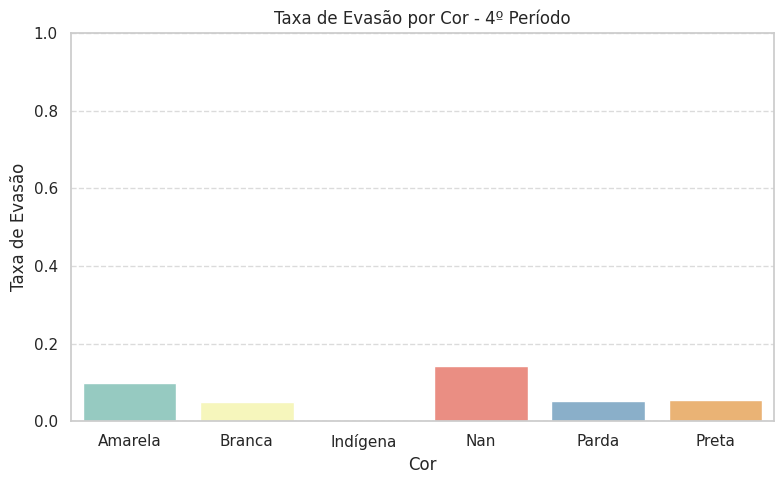

⚠️ Variável idade NÃO encontrada na tabela.

📘📘📘 TABELA: ALUNOS-FILTRADO-SEM-METRICAS 📘📘📘

--- Análise das variáveis no 1º período ---


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')



🟨 Tabela - Sexo:
      Contagem  Proporção  Taxa de Evasão
sexo                                     
F          208   0.165605        0.129808
M         1048   0.834395        0.091603


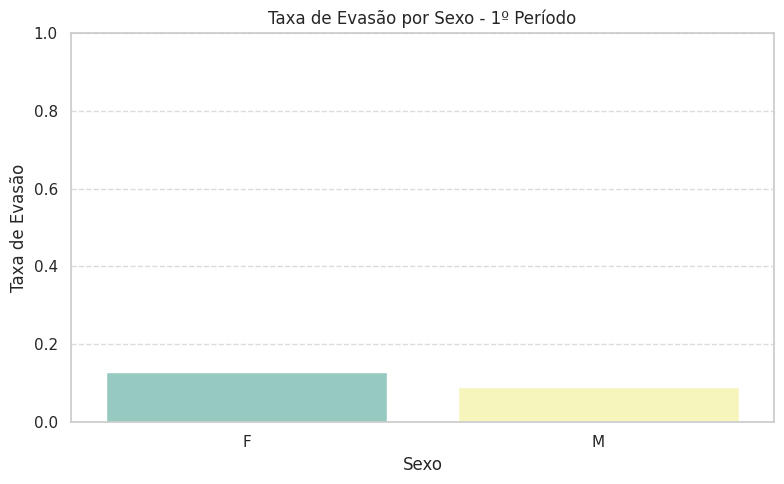

⚠️ Variável cota NÃO encontrada na tabela.

🟨 Tabela - Estado_civil:
              Contagem  Proporção  Taxa de Evasão
estado_civil                                     
Casado              41   0.032643        0.243902
Divorciado           2   0.001592        0.000000
Nan                  4   0.003185        0.750000
Solteiro          1208   0.961783        0.091060
Viúvo                1   0.000796        0.000000


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


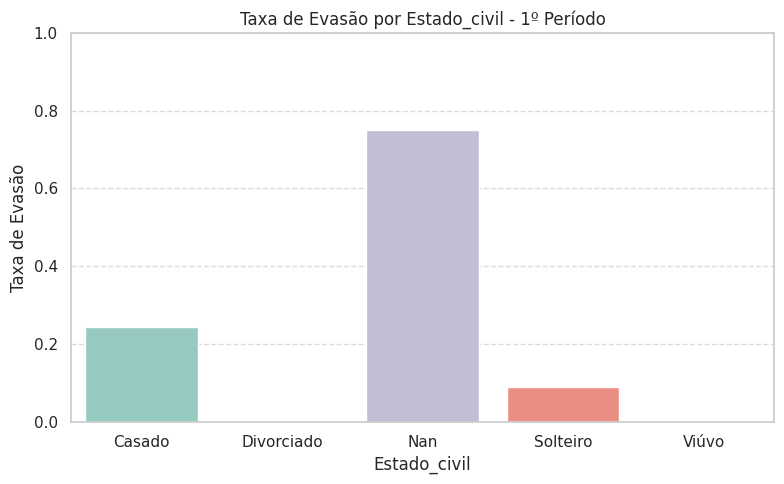


🟨 Tabela - Cor:
          Contagem  Proporção  Taxa de Evasão
cor                                          
Amarela         36   0.028662        0.194444
Branca         688   0.547771        0.072674
Indígena         4   0.003185        0.000000
Nan             24   0.019108        0.291667
Parda          444   0.353503        0.105856
Preta           60   0.047771        0.200000


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


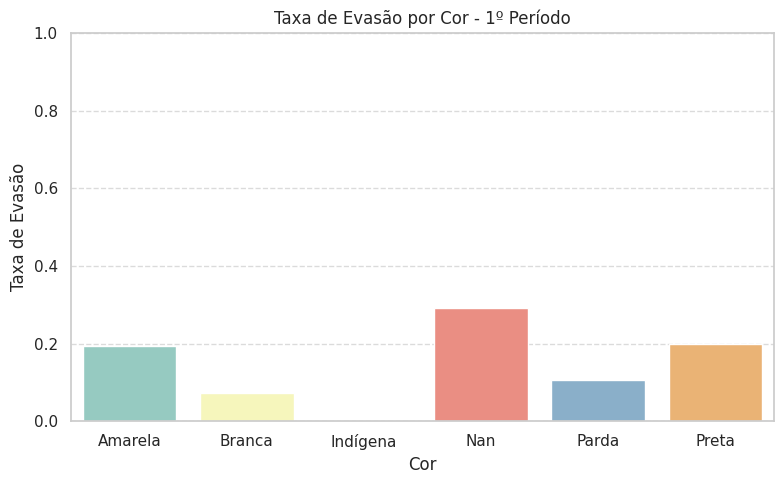


📘 Idade - Média: 30.30, Desvio Padrão: 5.41


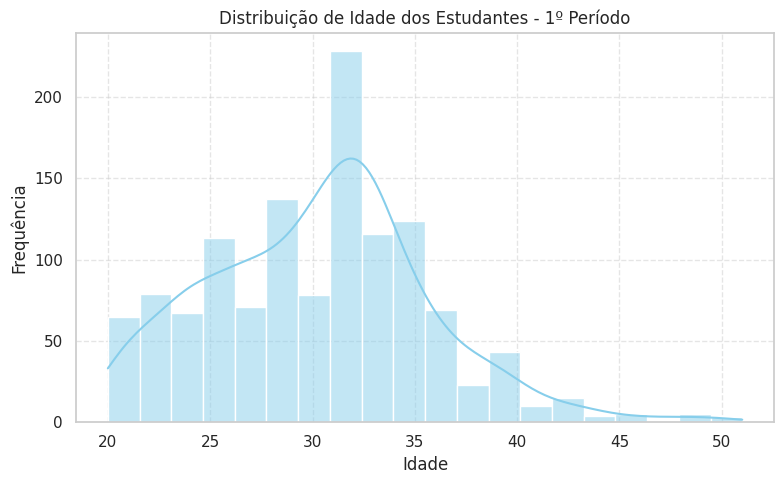

/tmp/ipykernel_400871/1779100587.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=evasao_col, y='idade', data=df, palette='Pastel1')


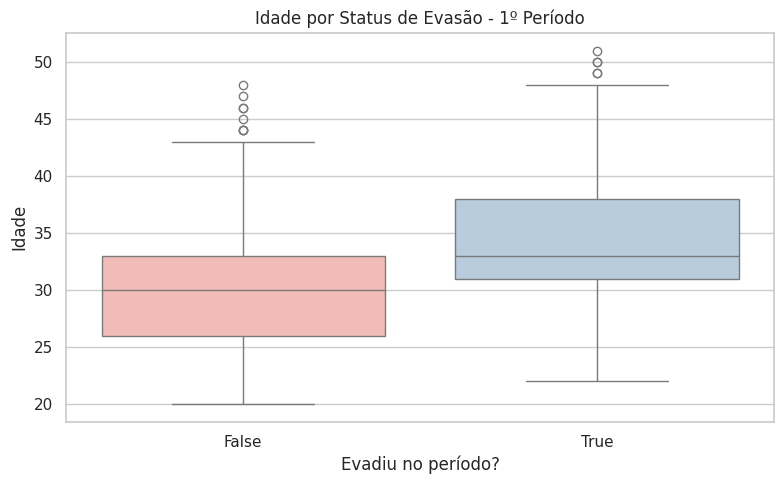

/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')



--- Análise das variáveis no 2º período ---

🟨 Tabela - Sexo:
      Contagem  Proporção  Taxa de Evasão
sexo                                     
F          208   0.165605        0.086538
M         1048   0.834395        0.078244


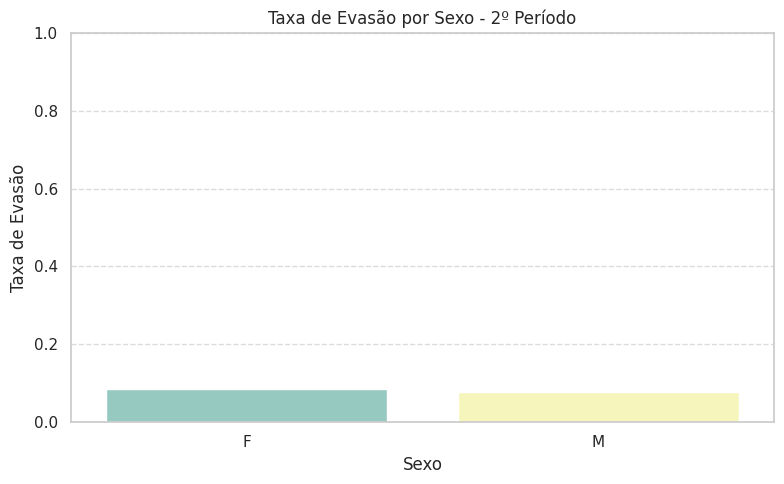

⚠️ Variável cota NÃO encontrada na tabela.

🟨 Tabela - Estado_civil:
              Contagem  Proporção  Taxa de Evasão
estado_civil                                     
Casado              41   0.032643        0.146341
Divorciado           2   0.001592        0.000000
Nan                  4   0.003185        0.000000
Solteiro          1208   0.961783        0.077815
Viúvo                1   0.000796        0.000000


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


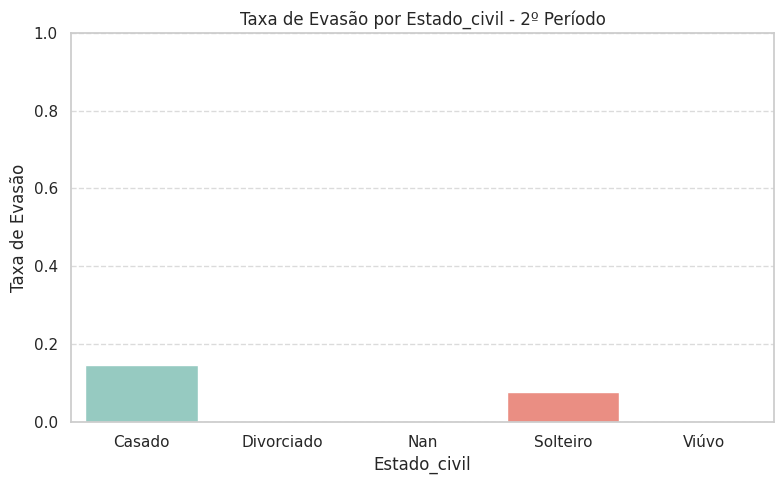


🟨 Tabela - Cor:
          Contagem  Proporção  Taxa de Evasão
cor                                          
Amarela         36   0.028662        0.000000
Branca         688   0.547771        0.063953
Indígena         4   0.003185        0.000000
Nan             24   0.019108        0.125000
Parda          444   0.353503        0.094595
Preta           60   0.047771        0.183333


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


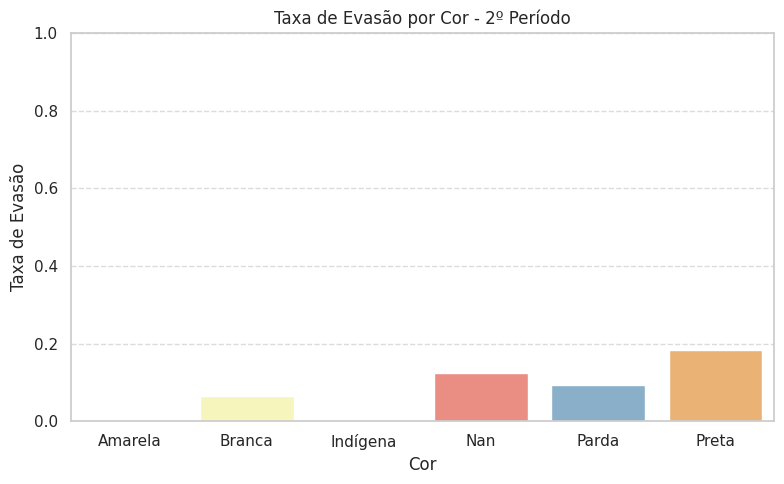


📘 Idade - Média: 30.30, Desvio Padrão: 5.41


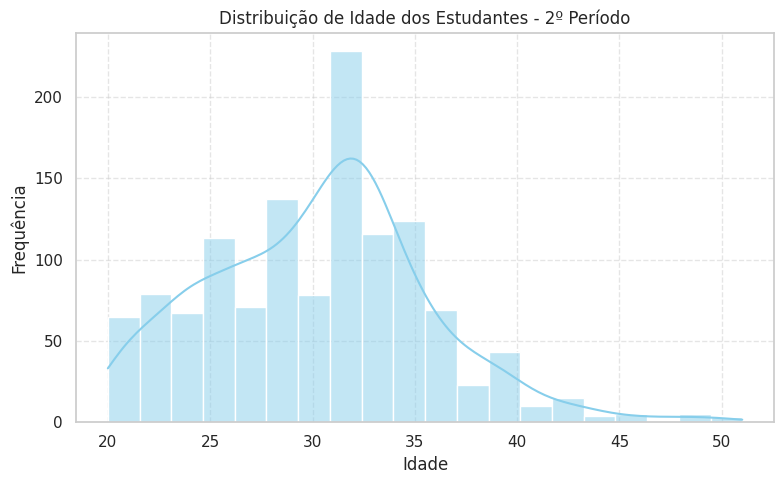

/tmp/ipykernel_400871/1779100587.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=evasao_col, y='idade', data=df, palette='Pastel1')


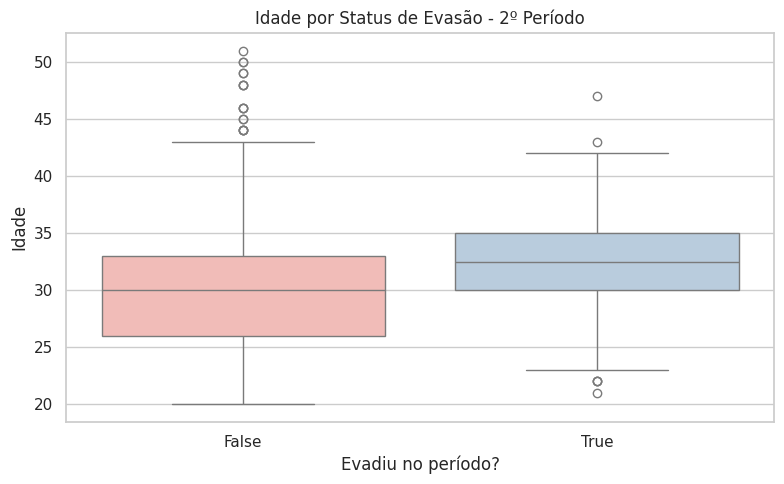

/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')



--- Análise das variáveis no 3º período ---

🟨 Tabela - Sexo:
      Contagem  Proporção  Taxa de Evasão
sexo                                     
F          208   0.165605        0.048077
M         1048   0.834395        0.075382


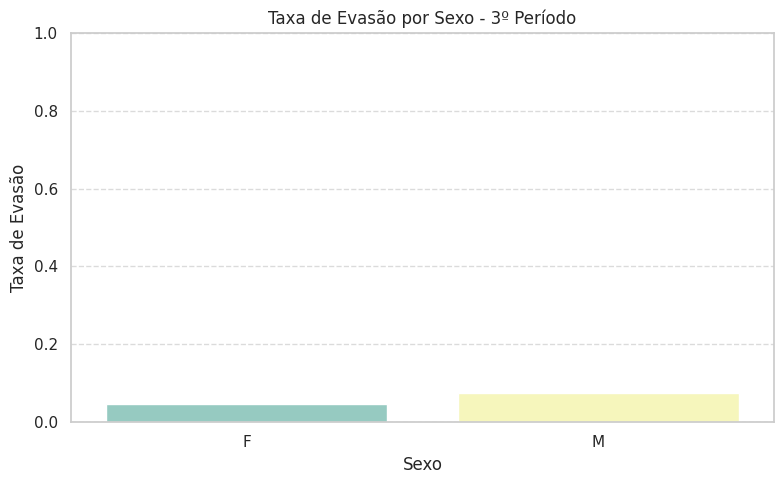

⚠️ Variável cota NÃO encontrada na tabela.

🟨 Tabela - Estado_civil:
              Contagem  Proporção  Taxa de Evasão
estado_civil                                     
Casado              41   0.032643        0.048780
Divorciado           2   0.001592        1.000000
Nan                  4   0.003185        0.000000
Solteiro          1208   0.961783        0.070364
Viúvo                1   0.000796        0.000000


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


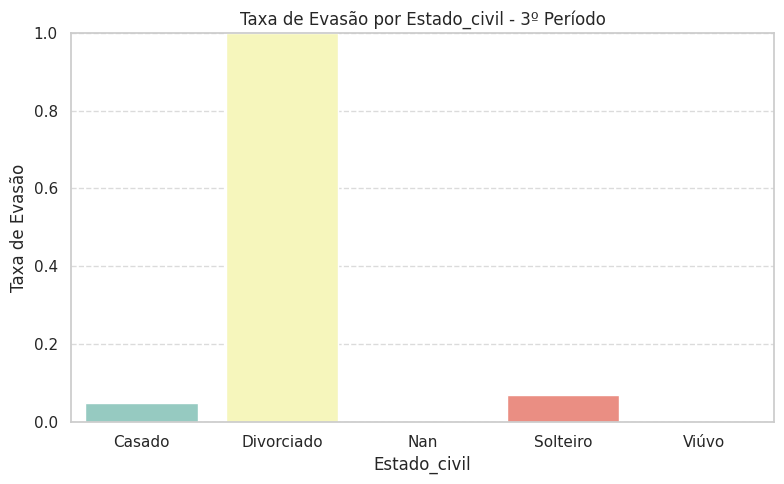


🟨 Tabela - Cor:
          Contagem  Proporção  Taxa de Evasão
cor                                          
Amarela         36   0.028662        0.166667
Branca         688   0.547771        0.065407
Indígena         4   0.003185        0.250000
Nan             24   0.019108        0.166667
Parda          444   0.353503        0.065315
Preta           60   0.047771        0.066667


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


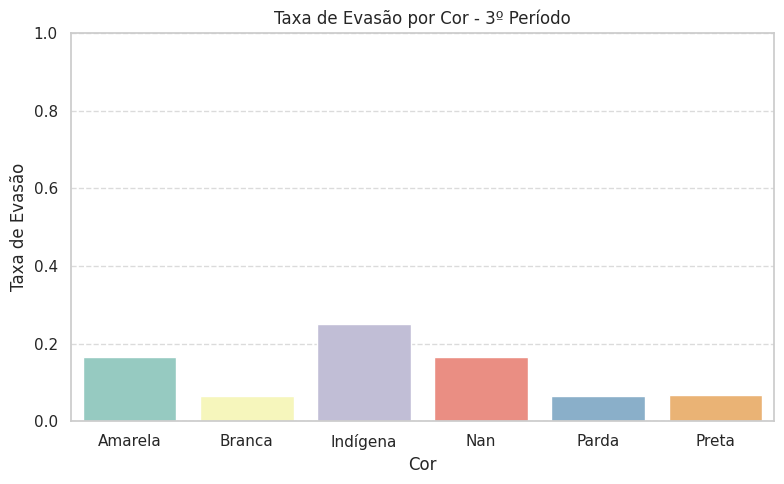


📘 Idade - Média: 30.30, Desvio Padrão: 5.41


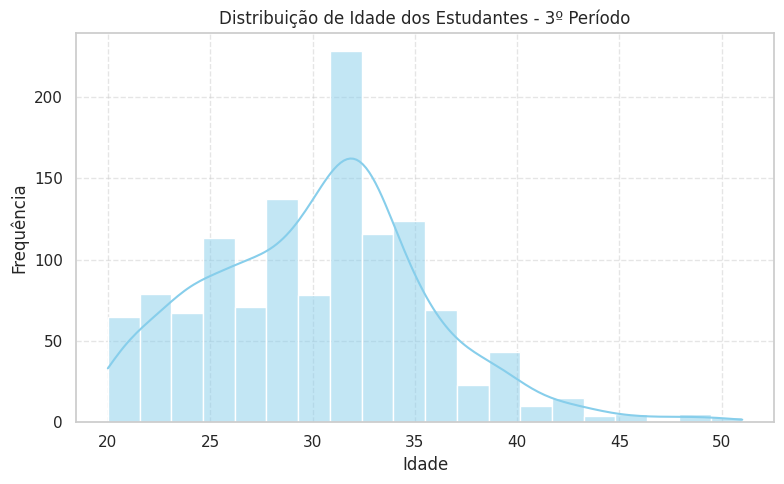

/tmp/ipykernel_400871/1779100587.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=evasao_col, y='idade', data=df, palette='Pastel1')


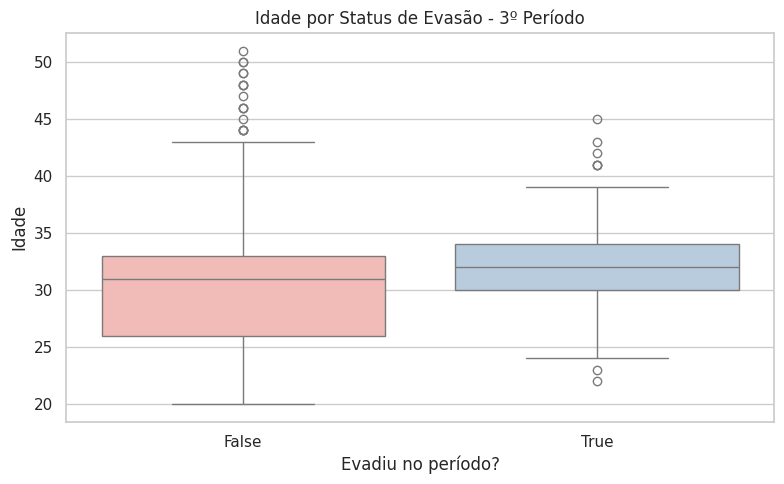

/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')



--- Análise das variáveis no 4º período ---

🟨 Tabela - Sexo:
      Contagem  Proporção  Taxa de Evasão
sexo                                     
F          208   0.165605        0.062500
M         1048   0.834395        0.094466


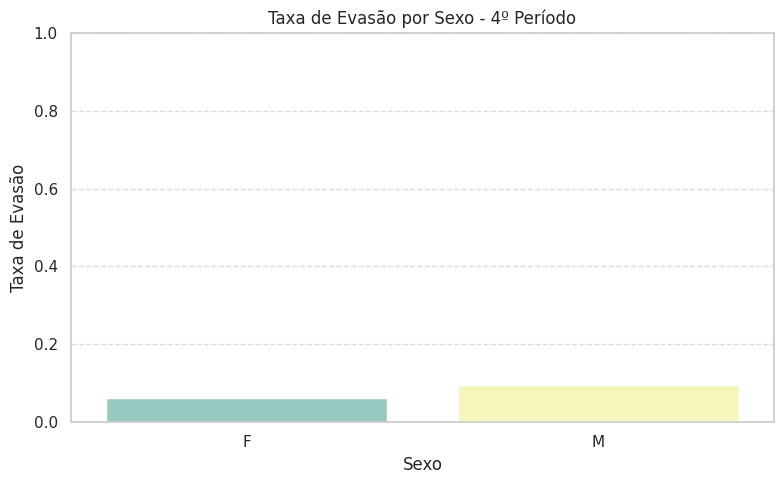

⚠️ Variável cota NÃO encontrada na tabela.

🟨 Tabela - Estado_civil:
              Contagem  Proporção  Taxa de Evasão
estado_civil                                     
Casado              41   0.032643         0.04878
Divorciado           2   0.001592         0.00000
Nan                  4   0.003185         0.00000
Solteiro          1208   0.961783         0.09106
Viúvo                1   0.000796         0.00000


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


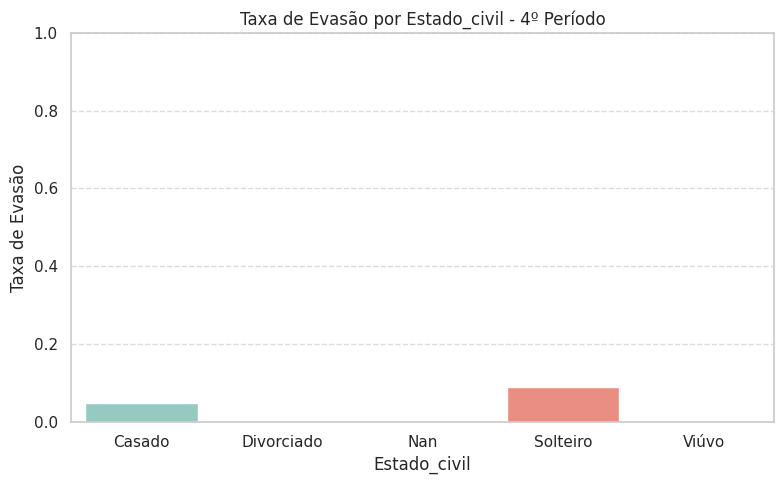


🟨 Tabela - Cor:
          Contagem  Proporção  Taxa de Evasão
cor                                          
Amarela         36   0.028662        0.111111
Branca         688   0.547771        0.091570
Indígena         4   0.003185        0.000000
Nan             24   0.019108        0.166667
Parda          444   0.353503        0.083333
Preta           60   0.047771        0.066667


/tmp/ipykernel_400871/1779100587.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_evasao.index.astype(str), y=taxa_evasao.values, palette='Set3')


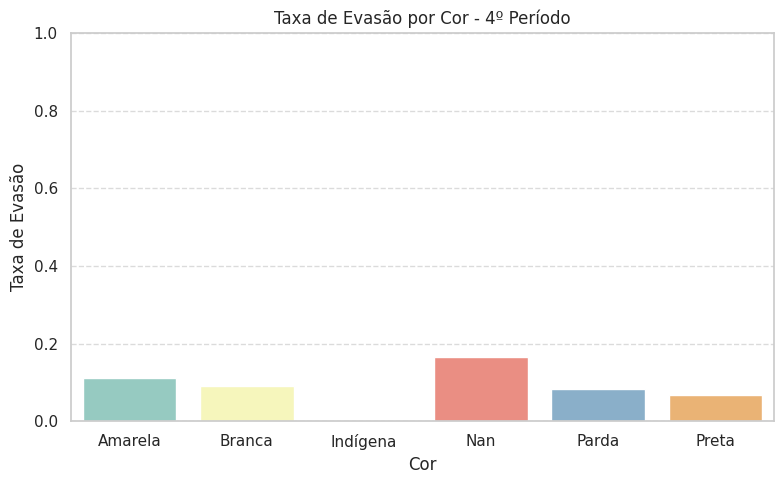


📘 Idade - Média: 30.30, Desvio Padrão: 5.41


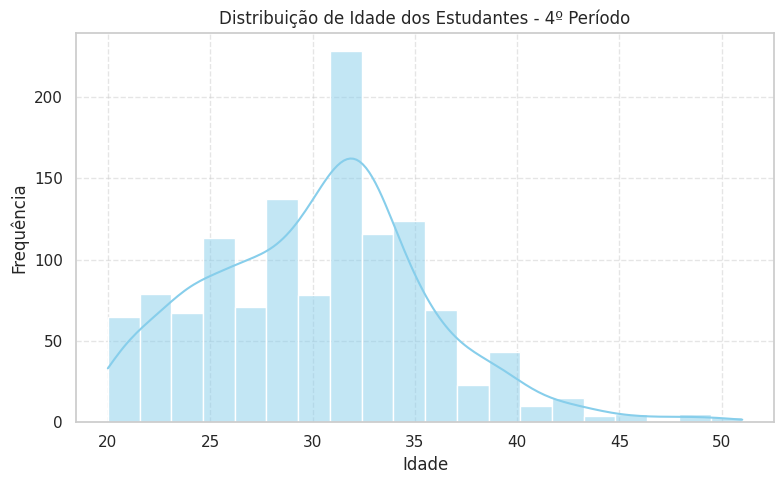

/tmp/ipykernel_400871/1779100587.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=evasao_col, y='idade', data=df, palette='Pastel1')


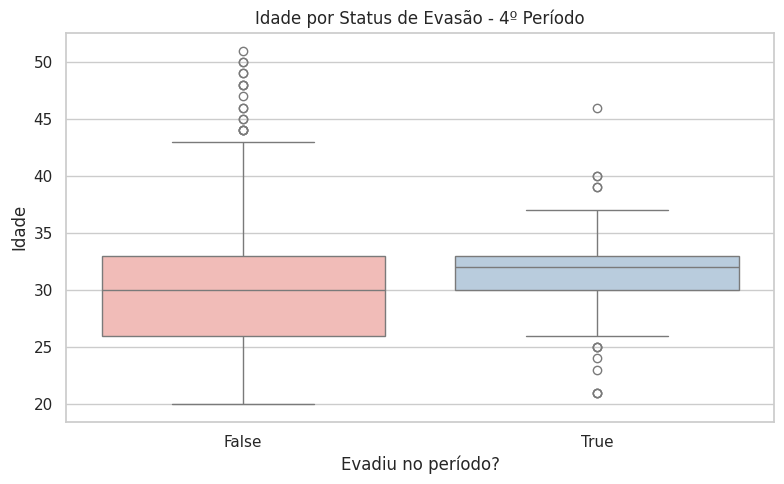

In [43]:
for nome in tabelas_nomes:
    df = tabelas_tratadas_limpo[nome]
    print(f"\n📘📘📘 TABELA: {nome.upper()} 📘📘📘")
    
    # Laço para os 4 primeiros períodos
    for periodo in range(1, 5):
        analisar_variaveis_com_graficos(df, n_periodo=periodo)
